These are my solutions to most of the applied (i. e., programming) exercises in the 2023 version of "An Introduction to Statistical Learning with Applications in Python" by chapter, updated until I finish the book (which has now occurred).  
The first two chapters are more on the side of exploring the data and making plots – for Ch. 3, e. g., I wrote a little function to plot outliers, `make_studentized_resid_plot()`. I don't stick closely to the explicit exercises; for example, there are some cells with not uninvolved code to select all correlations above a threshold from the `College` data which is only tenuously related to the exercise. Ch. 4 going forward is more behaved and has more interesting exercises.

Exercises I found interesting or felt most like actual coding to me:  
Chapter 4, Ex. [13](#4,13), [16](#4,16). Both going through the different classifiers (logistic, NB, LDA, QDA, KNN)  
Chapter 5, Ex. [9](#5,9). Bootstrap  
Chapter 6, Ex. [9](#6,9), [11](#6,9). Ridge, Lasso, PCA  
Chapter 7, Ex. [8](#7,8) (GAM), [9](#7,9) (Splines)  
Chapter 8, Ex. [9](#8,9) (RF classification + CV), [10](#8,10) (comparing boosting, bagging, and OLS), [11](#8,11) (comparing boosting and logistic regression)  
Chapter 10, Ex. [7](#10,7) (comparing logit to deep learning, regression wins), [9](#10,9) and [10](#10,10) (AR model with OLS and with deep learning, regression wins)  
Chapter 12, Ex. [8](#12,8) (Calculating the PVE of principal components by hand. Two different versions; one that looks intuitive to me and one that is about 10x faster)  
Chapter 13, Ex. [8](#13,8) (Hypothesis testing on completely random data with and without cherry-picking)


# Table of Contents<a name="toc"></a>
2. [Chapter 2 "Statistical Learning"](#2)
   * [Exercise 8](#2,8)
   * [Exercise 9](#2,9)
   * [Exercise 10](#2,10)
3. [Chapter 3 "Linear Regression"](#3)
   * [Exercise 8](#3,8)
   * [Exercise 9](#3,9)
   * [Exercise 10](#3,10)
   * [Exercise 11](#3,11)
   * [Exercise 12](#3,12)
   * [Exercise 13](#3,13)
   * [Exercise 14](#3,14)
   * [Exercise 15](#3,15)
4. [Chapter 4 "Classification"](#4)
   * [Chapter 13](#4,13)
   * [Chapter 14](#4,14)
   * [Chapter 15](#4,15)
   * [Chapter 16](#4,16)
5. [Chapter 5 "Resampling Methods"](#5)
   * [Exercise 5](#5,5)
   * [Exercise 6](#5,6)
   * [Exercise 7](#5,7)
   * [Exercise 8](#5,8)
   * [Exercise 9](#5,9)
6. [Chapter 6 "Linear Model Selection and Regularization"](#6)
    * [Exercise 8](#6,8)
    * [Exercise 9](#6,9)
    * [Exercise 11](#6,11)
7. [Chapter 7 "Moving Beyond Linearity"](#7)
    * [Exercise 6](#7,6)
    * [Exercise 7](#7,7)
    * [Exercise 8](#7,8)
    * [Exercise 9](#7,9)
    * [Exercise 11](#7,11)
8. [Chapter 8 "Tree-Based Methods"](#8)
   * [Exercise 7](#8,7)
   * [Exercise 8](#8,8)
   * [Exercise 9](#8,9)
   * [Exercise 10](#8,10)
   * [Exercise 11](#8,11)
9. [Chapter 9 "Support Vector Machines" (skipping most; SVMs just seem inferior to chapter 8 methods to me)](#9)
    * [Exercise 5](#9,5)
10. [Chapter 10 "Deep Learning"](#10)
    * [Exercise 7](#10,7)
    * [Exercise 9](#10,9)
    * [Exercise 10](#10,10)
11. [Chapter 11 "Survival Analysis and Censored Data"](#11)
    * [Exercise 10](#11,10)
12. [Chapter 12 "Unsupervised Learning"](#12)
    * [Exercise 8](#12,8)
    * [Exercise 9](#12,9)
    * [Exercise 13](#12,13)
13. [Chapter 13 "Multiple Testing"](#13)
    * [Exercise 7](#13,7)
    * [Exercise 8](#13,8)

# Chapter 2 "Statistical Learning"<a name="2"></a>
Back to [ToC](#toc)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots

from ISLP import load_data

## Exercise 8<a name="2,8"></a>
Back to [ToC](#toc)

This exercise relates to the College data set, which can be found in the file College.csv on the book website.  
(a) Use the pd.read_csv() function to read the data into Python. Call the loaded data college. Make sure that you have the directory set to the correct location for the data.  
(b) Look at the data used in the notebook by creating and running a new cell with just the code college in it. You should notice that the first column is just the name of each university in a column named something like Unnamed: 0. We don’t really want pandas to treat this as data. However, it may be handy to have these names for later. Try the following commands and similarly look at the resulting data frames:  
```Python
college2 = pd.read_csv('College.csv', index_col=0) 
college3 = college.rename({'Unnamed: 0': 'College'}, axis=1) 
college3 = college3.set_index('College')
```
This has used the first column in the file as an index for the data frame. This means that pandas has given each row a name corresponding to the appropriate university. Now you should see that the first data column is Private. Note that the names of the colleges appear on the left of the table. We also introduced a new python object above: a dictionary, which is specified by (key, value) pairs. Keep your modified version of the data with the following:
```Python
college = college3
```
(c) Use the `describe()` method of to produce a numerical summary of the variables in the data set.  
(d) Use the `pd.plotting.scatter_matrix()` function to produce a scatterplot matrix of the first columns `[Top10perc, Apps, Enroll]`. Recall that you can reference a list C of columns of a data frame
`A` using `A[C]`.  
(e) Use the `boxplot()` method of college to produce side-by-side boxplots of Outstate versus Private.  
(f) Create a new qualitative variable, called `Elite`, by binning the `Top10perc` variable into two groups based on whether or not the proportion of students coming from the top 10% of their high school classes exceeds 50%.
```Python
college['Elite'] = pd.cut(college['Top10perc'], [0,0.5,1],
labels=['No', 'Yes'])
```
Use the `value_counts()` method of `college['Elite']` to see how many elite universities there are. Finally, use the `boxplot()` method again to produce side-by-side boxplots of Outstate versus Elite.  (g) Use the `plot.hist()` method of college to produce some his- tograms with differing numbers of bins for a few of the quanti- tative variables. The command `plt.subplots(2, 2)` may be use- ful: it will divide the plot window into four regions so that four plots can be made simultaneously. By changing the arguments you can divide the screen up in other combinations.  
(h) Continue exploring the data, and provide a brief summary of what you discover.

In [2]:
college = pd.read_csv("College.csv")

In [2]:
college

Unnamed: 0 Private   Apps  Accept  Enroll  Top10perc  \
0      Abilene Christian University     Yes   1660    1232     721         23   
1                Adelphi University     Yes   2186    1924     512         16   
2                    Adrian College     Yes   1428    1097     336         22   
3               Agnes Scott College     Yes    417     349     137         60   
4         Alaska Pacific University     Yes    193     146      55         16   
..                              ...     ...    ...     ...     ...        ...   
772         Worcester State College      No   2197    1515     543          4   
773               Xavier University     Yes   1959    1805     695         24   
774  Xavier University of Louisiana     Yes   2097    1915     695         34   
775                 Yale University     Yes  10705    2453    1317         95   
776    York College of Pennsylvania     Yes   2989    1855     691         28   

     Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
0           52         2885          537      7440        3300    450   
1           29         2683         1227     12280        6450    750   
2           50         1036           99     11250        3750    400   
3           89          510           63     12960        5450    450   
4           44          249          869      7560        4120    800   
..         ...          ...          ...       ...         ...    ...   
772         26         3089         2029      6797        3900    500   
773         47         2849         1107     11520        4960    600   
774         61         2793          166      6900        4200    617   
775         99         5217           83     19840        6510    630   
776         63         2988         1726      4990        3560    500   

     Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        2200   70        78       18.1           12    7041         60  
1        1500   29        30       12.2           16   10527         56  
2        1165   53        66       12.9           30    8735         54  
3         875   92        97        7.7           37   19016         59  
4        1500   76        72       11.9            2   10922         15  
..        ...  ...       ...        ...          ...     ...        ...  
772      1200   60        60       21.0           14    4469         40  
773      1250   73        75       13.3           31    9189         83  
774       781   67        75       14.4           20    8323         49  
775      2115   96        96        5.8           49   40386         99  
776      1250   75        75       18.1           28    4509         99  

[777 rows x 19 columns]

The `rename()` method takes a dictionary as argument; the axis here specifies that the columns rather than rows (axis=0) should be renamed whenever one is called 'Unnamed 0:'

In [3]:
college = college.rename({"Unnamed: 0" : "College"}, axis=1).set_index("College")
college

Private   Apps  Accept  Enroll  Top10perc  \
College                                                                    
Abilene Christian University       Yes   1660    1232     721         23   
Adelphi University                 Yes   2186    1924     512         16   
Adrian College                     Yes   1428    1097     336         22   
Agnes Scott College                Yes    417     349     137         60   
Alaska Pacific University          Yes    193     146      55         16   
...                                ...    ...     ...     ...        ...   
Worcester State College             No   2197    1515     543          4   
Xavier University                  Yes   1959    1805     695         24   
Xavier University of Louisiana     Yes   2097    1915     695         34   
Yale University                    Yes  10705    2453    1317         95   
York College of Pennsylvania       Yes   2989    1855     691         28   

                                Top25perc  F.Undergrad  P.Undergrad  Outstate  \
College                                                                         
Abilene Christian University           52         2885          537      7440   
Adelphi University                     29         2683         1227     12280   
Adrian College                         50         1036           99     11250   
Agnes Scott College                    89          510           63     12960   
Alaska Pacific University              44          249          869      7560   
...                                   ...          ...          ...       ...   
Worcester State College                26         3089         2029      6797   
Xavier University                      47         2849         1107     11520   
Xavier University of Louisiana         61         2793          166      6900   
Yale University                        99         5217           83     19840   
York College of Pennsylvania           63         2988         1726      4990   

                                Room.Board  Books  Personal  PhD  Terminal  \
College                                                                      
Abilene Christian University          3300    450      2200   70        78   
Adelphi University                    6450    750      1500   29        30   
Adrian College                        3750    400      1165   53        66   
Agnes Scott College                   5450    450       875   92        97   
Alaska Pacific University             4120    800      1500   76        72   
...                                    ...    ...       ...  ...       ...   
Worcester State College               3900    500      1200   60        60   
Xavier University                     4960    600      1250   73        75   
Xavier University of Louisiana        4200    617       781   67        75   
Yale University                       6510    630      2115   96        96   
York College of Pennsylvania          3560    500      1250   75        75   

                                S.F.Ratio  perc.alumni  Expend  Grad.Rate  
College                                                                    
Abilene Christian University         18.1           12    7041         60  
Adelphi University                   12.2           16   10527         56  
Adrian College                       12.9           30    8735         54  
Agnes Scott College                   7.7           37   19016         59  
Alaska Pacific University            11.9            2   10922         15  
...                                   ...          ...     ...        ...  
Worcester State College              21.0           14    4469         40  
Xavier University                    13.3           31    9189         83  
Xavier University of Louisiana       14.4           20    8323         49  
Yale University                       5.8           49   40386         99  
York College of Pennsylvania         18.1           28    450

In [4]:
college.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad.Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

In [5]:
college['Private'].describe()

count     777
unique      2
top       Yes
freq      565
Name: Private, dtype: object

In [6]:
college.columns

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

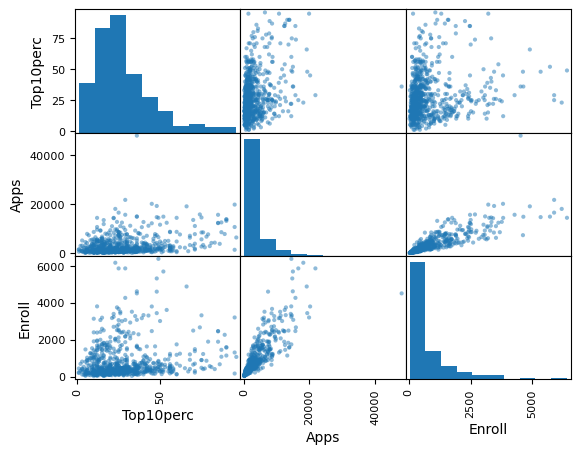

In [7]:
C = ["Top10perc", "Apps", "Enroll"]
pd.plotting.scatter_matrix(college[C]);

Outstate = outstate tuition

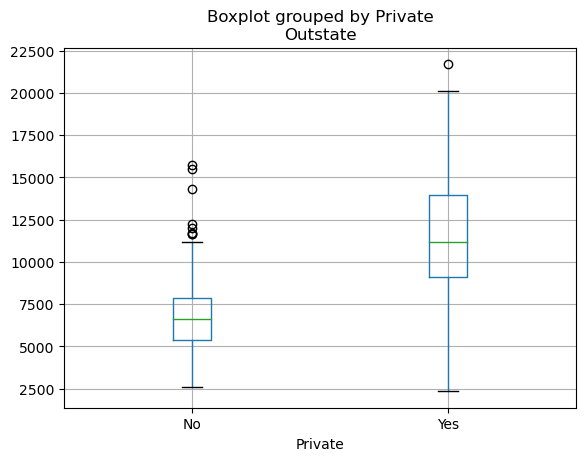

In [8]:
college.boxplot(column='Outstate', by='Private');

The array \[0, 50, 100\] defines the bin edges. This also works: `college[“Elite”] = pd.cut(college[“Top10perc”]/100, [0, 0.5, 1], labels = [“No”, “Yes”])`

In [9]:
pd.cut?

Signature:
pd.cut(
    x,
    bins,
    right: 'bool' = True,
    labels=None,
    retbins: 'bool' = False,
    precision: 'int' = 3,
    include_lowest: 'bool' = False,
    duplicates: 'str' = 'raise',
    ordered: 'bool' = True,
)
Docstring:
Bin values into discrete intervals.

Use `cut` when you need to segment and sort data values into bins. This
function is also useful for going from a continuous variable to a
categorical variable. For example, `cut` could convert ages to groups of
age ranges. Supports binning into an equal number of bins, or a
pre-specified array of bins.

Parameters
----------
x : array-like
    The input array to be binned. Must be 1-dimensional.
bins : int, sequence of scalars, or IntervalIndex
    The criteria to bin by.

    * int : Defines the number of equal-width bins in the range of `x`. The
      range of `x` is extended by .1% on each side to include the minimum
      and maximum values of `x`.
    * sequence of scalars : Defines the bin edges allowing

No     699
Yes     78
Name: Elite, dtype: int64


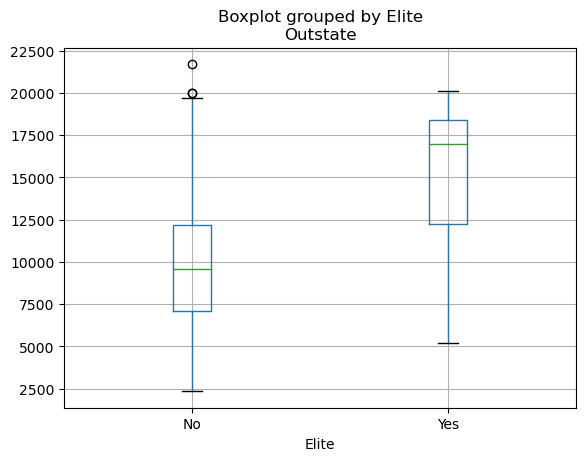

In [10]:
college["Elite"] = pd.cut(college["Top10perc"], [0, 50, 100], labels=["No", "Yes"])
print(college["Elite"].value_counts())
college.boxplot(column="Outstate", by="Elite");

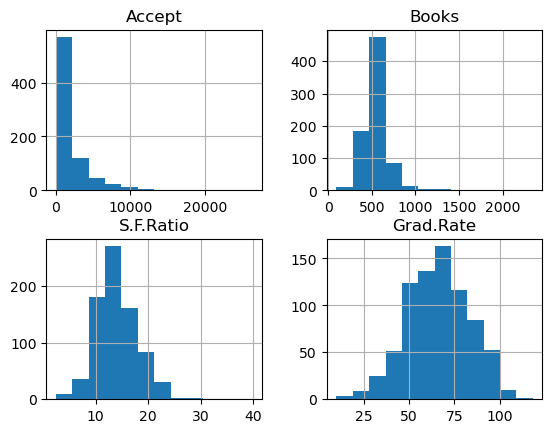

In [4]:
fig, ax = plt.subplots(2, 2)
college.hist("Accept", bins=12, ax=ax[0, 0])
college.hist("Books", bins=12, ax=ax[0, 1])
college.hist("S.F.Ratio", bins=12, ax=ax[1, 0])
college.hist("Grad.Rate", bins=12, ax=ax[1, 1]);

In [12]:
correlation_coefficient = college['Personal'].corr(college['Room.Board'])
print(correlation_coefficient)

-0.19942818085131156


In [13]:
correlation_matrix = college.corr(numeric_only=True)

np.fill_diagonal(correlation_matrix.values, np.nan)

high_correlations = correlation_matrix[(correlation_matrix > 0.7) | (correlation_matrix < -0.7)]

# Iterate through the correlation matrix
for i, col in enumerate(correlation_matrix.columns):
    for j, row in enumerate(correlation_matrix.index):
        if i < j:  # Only consider the upper triangle (excluding diagonal)
            correlation = high_correlations.iloc[j, i]  # Get correlation coefficient
            if not np.isnan(correlation):  # Check if correlation is not NaN
                print(f"{col}, {row}: {correlation:.2f}")

Apps, Accept: 0.94
Apps, Enroll: 0.85
Apps, F.Undergrad: 0.81
Accept, Enroll: 0.91
Accept, F.Undergrad: 0.87
Enroll, F.Undergrad: 0.96
Top10perc, Top25perc: 0.89
PhD, Terminal: 0.85


All of these must conceptually be high: None of them are ratios or proportions, they are just raw numbers. So, of course, when many (in number) apply, many (in number) get accepted, etc.

In [14]:
# same thing

correlation_matrix = college.corr(numeric_only=True)
np.fill_diagonal(correlation_matrix.values, np.nan)

high_correlations = correlation_matrix[(correlation_matrix > 0.4) | (correlation_matrix < -0.4)]

# this produces a Series
stacked_correlations = high_correlations.stack().dropna()

# Convert the index to a list of tuples
index_tuples = stacked_correlations.index.tolist()


processed_pairs = set()

for index in index_tuples:
    correlation = stacked_correlations[index]
    var1, var2 = index
    if (var1, var2) not in processed_pairs and (var2, var1) not in processed_pairs:
        processed_pairs.add((var1, var2))
        print(f"{var1}, {var2}: correlation = {correlation:.2f}")
        


Apps, Accept: correlation = 0.94
Apps, Enroll: correlation = 0.85
Apps, F.Undergrad: correlation = 0.81
Accept, Enroll: correlation = 0.91
Accept, F.Undergrad: correlation = 0.87
Accept, P.Undergrad: correlation = 0.44
Enroll, F.Undergrad: correlation = 0.96
Enroll, P.Undergrad: correlation = 0.51
Top10perc, Top25perc: correlation = 0.89
Top10perc, Outstate: correlation = 0.56
Top10perc, PhD: correlation = 0.53
Top10perc, Terminal: correlation = 0.49
Top10perc, perc.alumni: correlation = 0.46
Top10perc, Expend: correlation = 0.66
Top10perc, Grad.Rate: correlation = 0.49
Top25perc, Outstate: correlation = 0.49
Top25perc, PhD: correlation = 0.55
Top25perc, Terminal: correlation = 0.52
Top25perc, perc.alumni: correlation = 0.42
Top25perc, Expend: correlation = 0.53
Top25perc, Grad.Rate: correlation = 0.48
F.Undergrad, P.Undergrad: correlation = 0.57
Outstate, Room.Board: correlation = 0.65
Outstate, Terminal: correlation = 0.41
Outstate, S.F.Ratio: correlation = -0.55
Outstate, perc.alumn

When there are more smart kids, more grads donate (because they make more money after?), more graduate (of course), and the college spends more on them (explained by higher rate of donations -> more funds?). 

More students per faculty means the college charges less for out of state students, spends less per student, and fewer grads will donate. This may create the image of a bottom-of-the-barrel safety-school for the dummies, but graduation rate is not strongly negatively correlated (could be lower standards, too, though).

## Exercise 9<a name="2,9"></a>
Back to [ToC](#toc)

This exercise involves the Auto data set studied in the lab. Make sure that the missing values have been removed from the data.  
(a) Which of the predictors are quantitative, and which are quali- tative?  
(b) What is the range of each quantitative predictor? You can an- swer this using the min() and max() methods in numpy.  
(c) What is the mean and standard deviation of each quantitative predictor?  
(d) Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?  
(e) Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings.  
(f) Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting mpg? Justify your answer.

In [15]:
Auto = pd.read_csv('Auto.data',
                   na_values=['?'],
                   delim_whitespace=True)
Auto = Auto.dropna()
Auto

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0    18.0          8         307.0       130.0  3504.0          12.0    70   
1    15.0          8         350.0       165.0  3693.0          11.5    70   
2    18.0          8         318.0       150.0  3436.0          11.0    70   
3    16.0          8         304.0       150.0  3433.0          12.0    70   
4    17.0          8         302.0       140.0  3449.0          10.5    70   
..    ...        ...           ...         ...     ...           ...   ...   
392  27.0          4         140.0        86.0  2790.0          15.6    82   
393  44.0          4          97.0        52.0  2130.0          24.6    82   
394  32.0          4         135.0        84.0  2295.0          11.6    82   
395  28.0          4         120.0        79.0  2625.0          18.6    82   
396  31.0          4         119.0        82.0  2720.0          19.4    82   

     origin                       name  
0         1  chevrolet chevelle malibu  
1         1          buick skylark 320  
2         1         plymouth satellite  
3         1              amc rebel sst  
4         1                ford torino  
..      ...                        ...  
392       1            ford mustang gl  
393       2                  vw pickup  
394       1              dodge rampage  
395       1                ford ranger  
396       1                 chevy s-10  

[392 rows x 9 columns]

In [16]:
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

Quantitative: mpg, displacement, horsepower, weight, acceleration, year, cylinders

Qualitative: name, origin (probably dummy-fied?)

In [17]:
predictors = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin']
predictors_name = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name']

In [18]:
quant = ['mpg', 'displacement', 'horsepower', 'weight',
       'acceleration']

for col in quant:
    print(f"{col}: Mean = {Auto[col].describe()['mean']:.2f}, SD = {Auto[col].describe()['std']:.2f}")

mpg: Mean = 23.45, SD = 7.81
displacement: Mean = 194.41, SD = 104.64
horsepower: Mean = 104.47, SD = 38.49
weight: Mean = 2977.58, SD = 849.40
acceleration: Mean = 15.54, SD = 2.76


In [19]:
quant = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']
means = Auto[quant].mean()
stds = Auto[quant].std()

for col in quant:
    print(f"{col}: Mean = {means[col]:.2f}, SD = {stds[col]:.2f}")


mpg: Mean = 23.45, SD = 7.81
displacement: Mean = 194.41, SD = 104.64
horsepower: Mean = 104.47, SD = 38.49
weight: Mean = 2977.58, SD = 849.40
acceleration: Mean = 15.54, SD = 2.76


In [20]:
list1 = list(range(9))
list2 = list(range(84, 392))
idx = list1 + list2

Auto_new = Auto.iloc[idx,:]
Auto_new

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0    18.0          8         307.0       130.0  3504.0          12.0    70   
1    15.0          8         350.0       165.0  3693.0          11.5    70   
2    18.0          8         318.0       150.0  3436.0          11.0    70   
3    16.0          8         304.0       150.0  3433.0          12.0    70   
4    17.0          8         302.0       140.0  3449.0          10.5    70   
..    ...        ...           ...         ...     ...           ...   ...   
392  27.0          4         140.0        86.0  2790.0          15.6    82   
393  44.0          4          97.0        52.0  2130.0          24.6    82   
394  32.0          4         135.0        84.0  2295.0          11.6    82   
395  28.0          4         120.0        79.0  2625.0          18.6    82   
396  31.0          4         119.0        82.0  2720.0          19.4    82   

     origin                       name  
0         1  chevrolet chevelle malibu  
1         1          buick skylark 320  
2         1         plymouth satellite  
3         1              amc rebel sst  
4         1                ford torino  
..      ...                        ...  
392       1            ford mustang gl  
393       2                  vw pickup  
394       1              dodge rampage  
395       1                ford ranger  
396       1                 chevy s-10  

[317 rows x 9 columns]

In [21]:
for col in quant:
    print(f"{col}: Mean = {Auto_new[col].describe()['mean']:.2f}, SD = {Auto_new[col].describe()['std']:.2f}")

mpg: Mean = 24.37, SD = 7.88
displacement: Mean = 187.75, SD = 99.94
horsepower: Mean = 100.96, SD = 35.90
weight: Mean = 2939.64, SD = 812.65
acceleration: Mean = 15.72, SD = 2.69


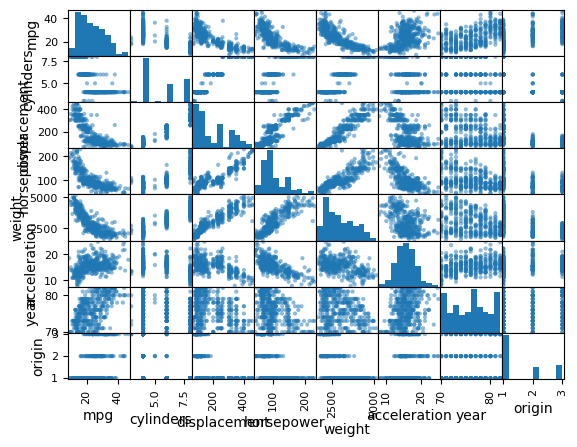

In [22]:
pd.plotting.scatter_matrix(Auto);

In [23]:
for col in predictors:
    print(f"{col}: {Auto['mpg'].corr(Auto[col])}")

mpg: 1.0
cylinders: -0.777617508126022
displacement: -0.805126946710458
horsepower: -0.7784267838977762
weight: -0.8322442148315754
acceleration: 0.42332853690278716
year: 0.5805409660907858
origin: 0.5652087567164611


In [24]:
import statsmodels.api as sm

predictors_ols = ['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin']

X = Auto[predictors_ols]
# Add a constant term to the predictors matrix
X = sm.add_constant(X)

y = Auto['mpg']


# Fit the linear regression model
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 19 Mar 2024   Prob (F-statistic):          2.04e-139
Time:                        13:36:32   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

In [25]:
X[:4]

const  cylinders  displacement  horsepower  weight  acceleration  year  \
0    1.0          8         307.0       130.0  3504.0          12.0    70   
1    1.0          8         350.0       165.0  3693.0          11.5    70   
2    1.0          8         318.0       150.0  3436.0          11.0    70   
3    1.0          8         304.0       150.0  3433.0          12.0    70   

   origin  
0       1  
1       1  
2       1  
3       1

In [26]:
Auto.corr(numeric_only=True)

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration      year    origin  
mpg               0.423329  0.580541  0.565209  
cylinders        -0.504683 -0.345647 -0.568932  
displacement     -0.543800 -0.369855 -0.614535  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.416839 -0.309120 -0.585005  
acceleration      1.000000  0.290316  0.212746  
year              0.290316  1.000000  0.181528  
origin            0.212746  0.181528  1.000000

## Exercise 10<a name="2,10"></a>
Back to [ToC](#toc)

This exercise involves the Boston housing data set.  
(a) To begin, load in the Boston data set, which is part of the ISLP
library.  
(b) How many rows are in this data set? How many columns? What do the rows and columns represent?  
(c) Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings.  
(d) Are any of the predictors associated with per capita crime rate? If so, explain the relationship.  
(e) Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor.  
(f) How many of the suburbs in this data set bound the Charles river?  
(g) What is the median pupil-teacher ratio among the towns in this data set?  
(h) Which suburb of Boston has lowest median value of owner- occupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your findings.  
(i) In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.

In [6]:
Boston = load_data('Boston')
Boston


crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio  lstat  medv  
0       15.3   4.98  24.0  
1       17.8   9.14  21.6  
2       17.8   4.03  34.7  
3       18.7   2.94  33.4  
4       18.7   5.33  36.2  
..       ...    ...   ...  
501     21.0   9.67  22.4  
502     21.0   9.08  20.6  
503     21.0   5.64  23.9  
504     21.0   6.48  22.0  
505     21.0   7.88  11.9  

[506 rows x 13 columns]

In [28]:
Boston.corr(numeric_only=True)

crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
indus    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
chas    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
nox      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
rm      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
age      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
dis     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
rad      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
tax      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
ptratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
lstat    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
medv    -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              dis       rad       tax   ptratio     lstat      medv  
crim    -0.379670  0.625505  0.582764  0.289946  0.455621 -0.388305  
zn       0.664408 -0.311948 -0.314563 -0.391679 -0.412995  0.360445  
indus   -0.708027  0.595129  0.720760  0.383248  0.603800 -0.483725  
chas    -0.099176 -0.007368 -0.035587 -0.121515 -0.053929  0.175260  
nox     -0.769230  0.611441  0.668023  0.188933  0.590879 -0.427321  
rm       0.205246 -0.209847 -0.292048 -0.355501 -0.613808  0.695360  
age     -0.747881  0.456022  0.506456  0.261515  0.602339 -0.376955  
dis      1.000000 -0.494588 -0.534432 -0.232471 -0.496996  0.249929  
rad     -0.494588  1.000000  0.910228  0.464741  0.488676 -0.381626  
tax     -0.534432  0.910228  1.000000  0.460853  0.543993 -0.468536  
ptratio -0.232471  0.464741  0.460853  1.000000  0.374044 -0.507787  
lstat   -0.496996  0.488676  0.543993  0.374044  1.000000 -0.737663  
medv     0.249929 -0.381626 -0.468536 -0.507787 -0.737663  1.000000

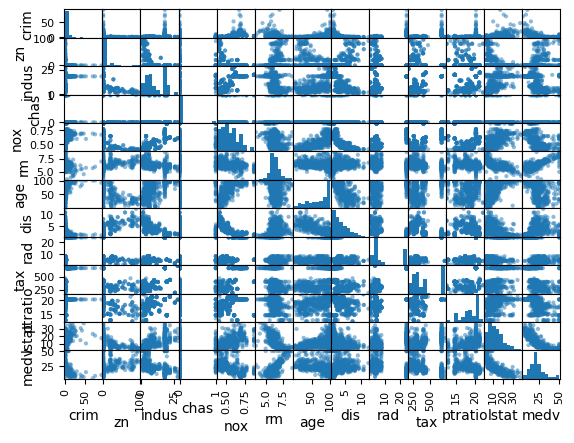

In [29]:
pd.plotting.scatter_matrix(Boston);

In [30]:
Boston.describe()

crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       lstat  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.105710    8.707259  168.537116    2.164946    7.141062   
min      2.900000    1.129600    1.000000  187.000000   12.600000    1.730000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000    6.950000   
50%     77.500000    3.207450    5.000000  330.000000   19.050000   11.360000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000   16.955000   
max    100.000000   12.126500   24.000000  711.000000   22.000000   37.970000   

             medv  
count  506.000000  
mean    22.532806  
std      9.197104  
min      5.000000  
25%     17.025000  
50%     21.200000  
75%     25.000000  
max     50.000000

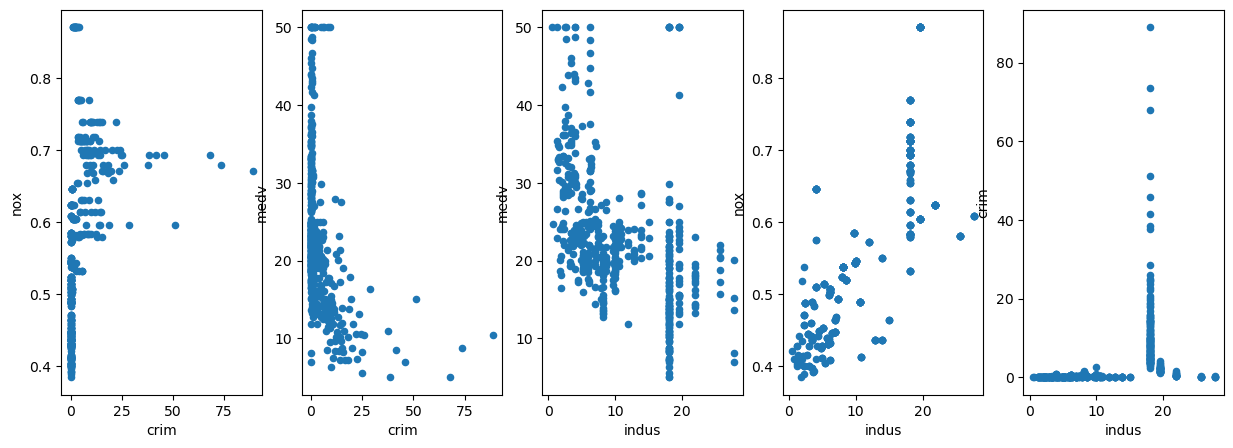

In [31]:
from matplotlib.pyplot import subplots
fig, axes = subplots(ncols=5, figsize=(15, 5))
Boston.plot.scatter('crim', 'nox', ax=axes[0]);
Boston.plot.scatter('crim', 'medv', ax=axes[1]);
Boston.plot.scatter('indus', 'medv', ax=axes[2]);
Boston.plot.scatter('indus', 'nox', ax=axes[3]);
Boston.plot.scatter('indus', 'crim', ax=axes[4]);

Very high nox levels may only obtain in very industrialized areas, which may not be densely populated. Industrialization doesn't seem to do much to crime, even though it increases both nox and decreases median house value (wealth); both potentially causally. Correlation technically 0.4, but looks fake to me.

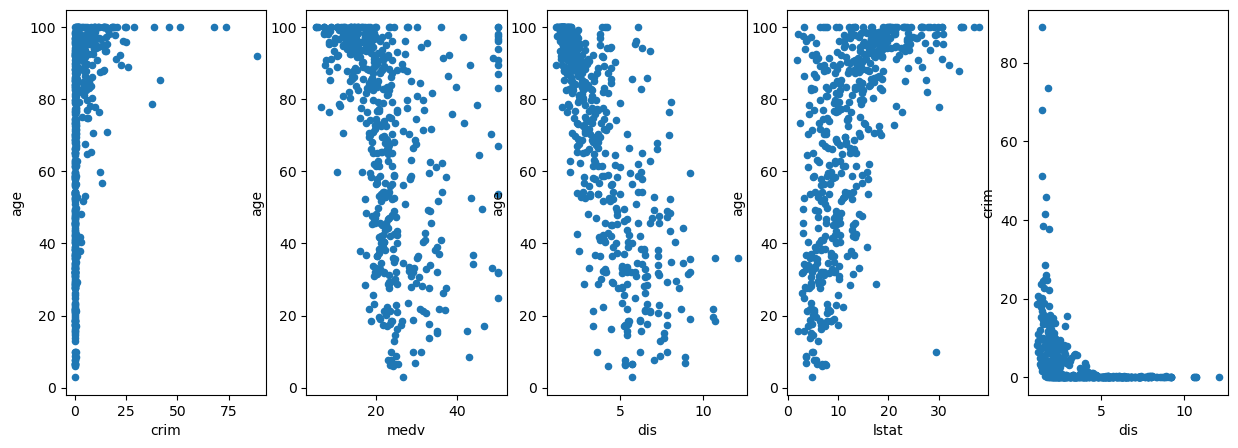

In [8]:
fig2, axes2 = subplots(ncols=5, figsize=(15, 5))
Boston.plot.scatter('crim', 'age', ax=axes2[0]);
Boston.plot.scatter('medv', 'age', ax=axes2[1]);
Boston.plot.scatter('dis', 'age', ax=axes2[2]);
Boston.plot.scatter('lstat', 'age', ax=axes2[3]);
Boston.plot.scatter('dis', 'crim', ax=axes2[4]);

Higher proportion of owner-occupied units built prior to 1940 (age) is associated with lower median value, status, and distance (!) to employment centres. Also you can't have high crime without high 'age'; can't have high crime without low median house value either, but you can have high median value with high age.

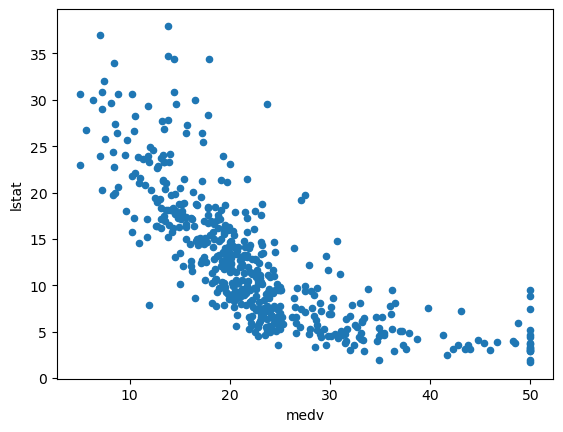

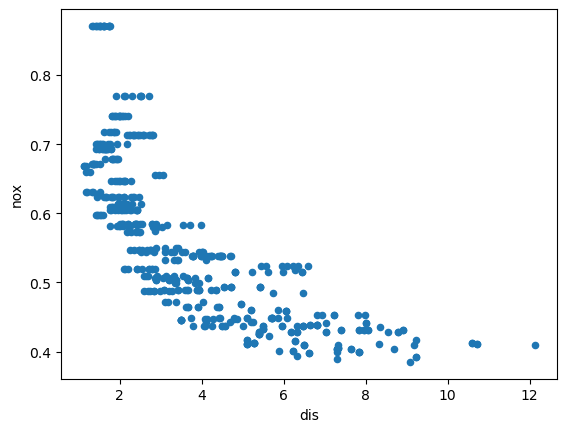

In [33]:
Boston.plot.scatter('medv', 'lstat');
Boston.plot.scatter('dis', 'nox');

In [10]:
print(Boston['crim'].nlargest(3))
print(f"mean:  {Boston['crim'].mean():.3f}")
print(f"SD:  {Boston['crim'].std():.3f}")

380    88.9762
418    73.5341
405    67.9208
Name: crim, dtype: float64
mean:  3.614
SD:  8.602


In [35]:
for col in ['tax', 'ptratio', 'crim']:
    mean = Boston[col].mean()
    std_dev = Boston[col].std()

    # mask = (Boston[col] > mean + 2 * std_dev) | (Boston[col] < mean - 2 * std_dev)
    mask = np.abs(Boston[col] - mean) > 2 * std_dev
    print(f"# of 2 SD for {col}: {Boston.loc[mask, col].count()}")
    print(f"Individual results: {sorted(Boston.loc[mask, 'crim'], reverse=True)}")
    print()


# of 2 SD for tax: 0
Individual results: []

# of 2 SD for ptratio: 16
Individual results: [0.82526, 0.7857, 0.76162, 0.66351, 0.65665, 0.61154, 0.57834, 0.55007, 0.5405, 0.54011, 0.53412, 0.52014, 0.04666, 0.04011, 0.03768, 0.01501]

# of 2 SD for crim: 16
Individual results: [88.9762, 73.5341, 67.9208, 51.1358, 45.7461, 41.5292, 38.3518, 37.6619, 28.6558, 25.9406, 25.0461, 24.8017, 24.3938, 23.6482, 22.5971, 22.0511]



If crime were normally distributed, this would be a little more than expected: 506 observations and 2.5% should be above +2 SDs. That's 12.65.

Biggest jumps in the top 5, then more slowly creeping down.

In [37]:
for col in ['tax', 'ptratio', 'crim']:
    range_col = Boston.describe()[col]['max'] - Boston.describe()[col]['min']
    print(f"{col} range: {range_col}")

tax range: 524.0
ptratio range: 9.4
crim range: 88.96988


In [38]:
for col in ['tax', 'ptratio', 'crim']:
    range_col = Boston[col].max() - Boston[col].min()
    print(f"{col} range: {range_col}")


tax range: 524
ptratio range: 9.4
crim range: 88.96988


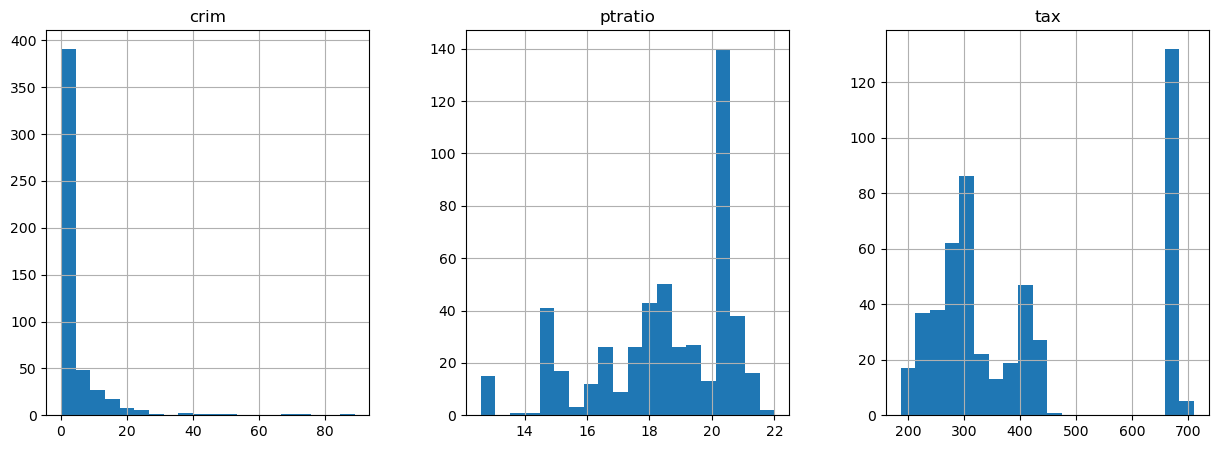

In [11]:
fig3, axes3 = subplots(ncols=3, figsize=(15, 5))
Boston.hist('crim', bins=20, ax=axes3[0])
Boston.hist('ptratio', bins=20, ax=axes3[1])
Boston.hist('tax', bins=20, ax=axes3[2]);

In [40]:
# How many of the suburbs in this data set bound the Charles river?
mask2 = Boston['chas'] != 0
Boston.loc[mask2, 'chas'].count()

35

In [41]:
# What is the median pupil-teacher ratio among the towns in this data set?
num_entries = Boston['ptratio'].count()
median = int((num_entries / 2 + (num_entries/2)+1)/2)
sorted(Boston['ptratio'])[median]

19.1

In [42]:
Boston['ptratio'].median()


19.05

In [43]:
# Which suburb of Boston has lowest median value of owner- occupied homes?
mask3 = Boston['medv'] == Boston['medv'].min()
Boston.loc[mask3, 'medv']

398    5.0
405    5.0
Name: medv, dtype: float64

In [44]:
row_1 = Boston.iloc[398]
row_2 = Boston.iloc[405]
concatenated_rows = pd.concat([row_1, row_2], axis=1)
print(concatenated_rows)

print(Boston.describe())

              398       405
crim      38.3518   67.9208
zn         0.0000    0.0000
indus     18.1000   18.1000
chas       0.0000    0.0000
nox        0.6930    0.6930
rm         5.4530    5.6830
age      100.0000  100.0000
dis        1.4896    1.4254
rad       24.0000   24.0000
tax      666.0000  666.0000
ptratio   20.2000   20.2000
lstat     30.5900   22.9800
medv       5.0000    5.0000
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000

Top 5 for criminality.  
75th percentile or higher for industrialization, nox, tax, ptratio, and lstat.  
At the max for age and rad.  
In general very similar!

In [45]:
# how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling?
mask4 = Boston['rm'] >= 7
mask5 = Boston['rm'] >= 8
print(Boston.loc[mask4, 'rm'].count())
print(Boston.loc[mask5, 'rm'].count())

64
13


In [46]:
Boston.loc[mask5].describe()


crim         zn      indus       chas        nox         rm  \
count  13.000000  13.000000  13.000000  13.000000  13.000000  13.000000   
mean    0.718795  13.615385   7.078462   0.153846   0.539238   8.348538   
std     0.901640  26.298094   5.392767   0.375534   0.092352   0.251261   
min     0.020090   0.000000   2.680000   0.000000   0.416100   8.034000   
25%     0.331470   0.000000   3.970000   0.000000   0.504000   8.247000   
50%     0.520140   0.000000   6.200000   0.000000   0.507000   8.297000   
75%     0.578340  20.000000   6.200000   0.000000   0.605000   8.398000   
max     3.474280  95.000000  19.580000   1.000000   0.718000   8.780000   

             age        dis        rad         tax    ptratio      lstat  \
count  13.000000  13.000000  13.000000   13.000000  13.000000  13.000000   
mean   71.538462   3.430192   7.461538  325.076923  16.361538   4.310000   
std    24.608723   1.883955   5.332532  110.971063   2.410580   1.373566   
min     8.400000   1.801000   2.000000  224.000000  13.000000   2.470000   
25%    70.400000   2.288500   5.000000  264.000000  14.700000   3.320000   
50%    78.300000   2.894400   7.000000  307.000000  17.400000   4.140000   
75%    86.500000   3.651900   8.000000  307.000000  17.400000   5.120000   
max    93.900000   8.906700  24.000000  666.000000  20.200000   7.440000   

            medv  
count  13.000000  
mean   44.200000  
std     8.092383  
min    21.900000  
25%    41.700000  
50%    48.300000  
75%    50.000000  
max    50.000000

In [47]:
print(Boston.describe())

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       lstat  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.1057

Relatively high criminality (mostly between 50th and 75th percentile).  
Lower lstat and much narrower spread.  
Noticeably higher medv; same max, higher min.

# Chapter 3 "Linear Regression"<a name="3"></a>  
Back to [ToC](#toc)

In [30]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from matplotlib.pyplot import subplots
from statsmodels.stats.anova import anova_lm
import statsmodels.formula.api as smf
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)


In [16]:
def make_resid_plot(model):
    ax = subplots(figsize=(4, 4))[1]
    ax.scatter(model.fittedvalues, model.resid, s=5)
    ax.set_xlabel('Fitted value')
    ax.set_ylabel('Residual')
    ax.axhline(0, c='k', ls= '--');

In [17]:
def make_studentized_resid_plot(model):

    studentized_residuals = model.get_influence().resid_studentized_internal
    
    ax = subplots(figsize=(4, 4))[1]
    ax.scatter(model.fittedvalues, studentized_residuals, s=5)
    
    ax.scatter(model.fittedvalues[abs(studentized_residuals) > 3],
               studentized_residuals[abs(studentized_residuals) > 3],
               color='red', s=20, label='|Studentized Residual| > 3')
    
    ax.set_xlabel('Fitted value')
    ax.set_ylabel('Studentized Residual')
    ax.axhline(0, c='k', ls='--')
    ax.axhline(3, c='r')
    ax.axhline(-3, c='r')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))


## Exercise 8<a name="3,8"></a>
Back to [ToC](#toc)

This question involves the use of simple linear regression on the Auto data set.  
(a) Use the `sm.OLS()` function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the `summarize()` function to print the results. Comment on the output. For example:  
i. Is there a relationship between the predictor and the re- sponse?  
ii. How strong is the relationship between the predictor and the response?  
iii. Is the relationship between the predictor and the response positive or negative?  
iv. What is the predicted `mpg` associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?  
(b) Plot the response and the predictor in a new set of axes ax. Use the `ax.axline()` method or the `abline()` function defined in the lab to display the least squares regression line.  
(c) Produce some of diagnostic plots of the least squares regression fit as described in the lab. Comment on any problems you see with the fit.

In [18]:
Auto = pd.read_csv('Auto.data',
                   na_values=['?'],
                   delim_whitespace=True)
Auto = Auto.dropna()

In [19]:
predictor = MS(['horsepower'])

X = predictor.fit_transform(Auto)

y = Auto['mpg']

model = sm.OLS(y, X).fit()
summarize(model)

coef  std err       t  P>|t|
intercept   39.9359    0.717  55.660    0.0
horsepower  -0.1578    0.006 -24.489    0.0

In [53]:
prediction_hp = 253

new_df = pd.DataFrame({'horsepower':[prediction_hp]})
newX = predictor.transform(new_df)
newX

predictions = model.get_prediction(newX)
print(f"Expected mpg for horsepower of {prediction_hp}: {predictions.predicted_mean[0]:.2f}")
print(f"95% CI: [{predictions.conf_int(alpha=0.05)[0][0]:.2f}, {predictions.conf_int(alpha=0.05)[0][1]:.2f}]")
print(f"95% prediction interval: [{predictions.conf_int(obs=True, alpha=0.05)[0][0]:.2f}, {predictions.conf_int(obs=True, alpha=0.05)[0][1]:.2f}]")

Expected mpg for horsepower of 253: 0.00
95% CI: [-1.94, 1.95]
95% prediction interval: [-9.84, 9.84]


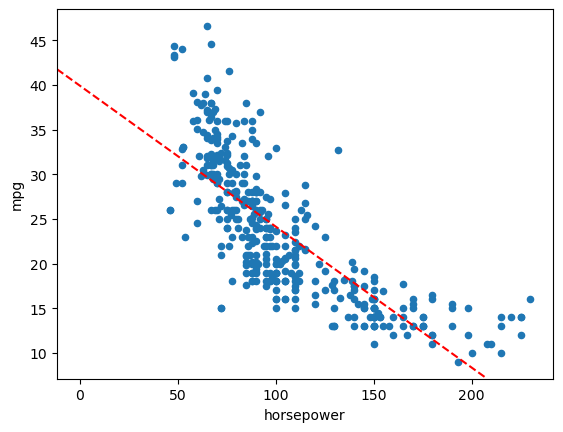

In [54]:
ax = Auto.plot.scatter('horsepower', 'mpg')
ax.axline((0, model.params[0]), slope=model.params[1], linestyle='--', color='red');

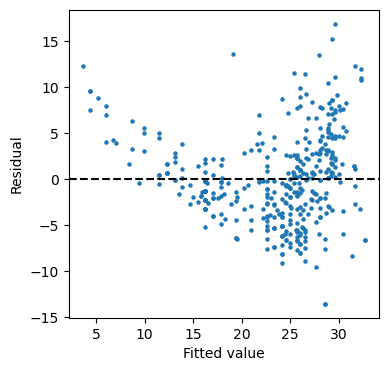

In [21]:
make_resid_plot(model)

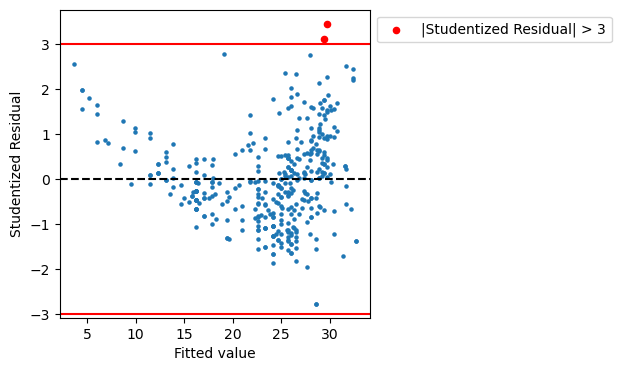

In [56]:
make_studentized_resid_plot(model)

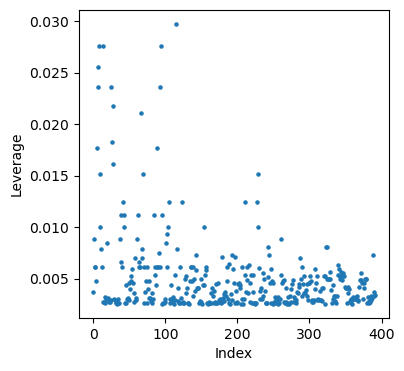

In [57]:
infl = model.get_influence()
ax = subplots(figsize=(4,4))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag, s=5)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage');


In [58]:
n = Auto['horsepower'].count()
2/n

0.00510204081632653

## Exercise 9<a name="3,9"></a>
Back to [ToC](#toc)

This question involves the use of multiple linear regression on the Auto data set.  
(a) Produce a scatterplot matrix which includes all of the variables in the data set.  
(b) Compute the matrix of correlations between the variables using the `DataFrame.corr()` method.  
(c) Use the `sm.OLS()` function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the `summarize()` function to print the results. Comment on the output. For instance:  
i. Is there a relationship between the predictors and the re- sponse? Use the `anova_lm()` function from statsmodels to answer this question.  
ii. Which predictors appear to have a statistically significant relationship to the response?  
iii. What does the coefficient for the year variable suggest?  
(d) Produce some of diagnostic plots of the linear regression fit as described in the lab. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?  
(e) Fit some models with interactions as described in the lab. Do any interactions appear to be statistically significant?  
(f) Try a few different transformations of the variables, such as $\log(X)$, $\sqrt{X}$, $X^2$. Comment on your findings.

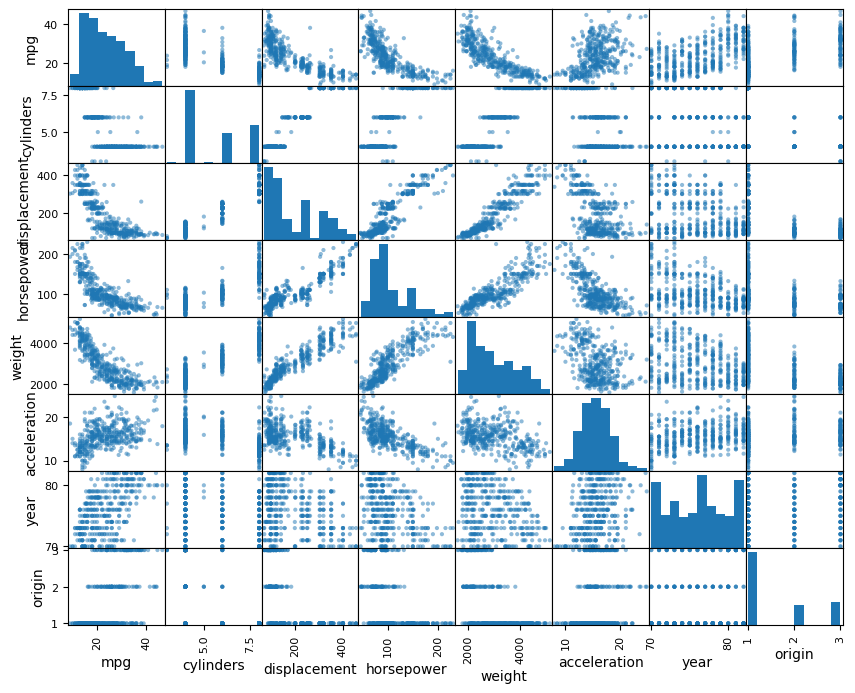

In [24]:
pd.plotting.scatter_matrix(Auto, figsize=(10, 8));


In [60]:
Auto.corr(numeric_only=True)

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration      year    origin  
mpg               0.423329  0.580541  0.565209  
cylinders        -0.504683 -0.345647 -0.568932  
displacement     -0.543800 -0.369855 -0.614535  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.416839 -0.309120 -0.585005  
acceleration      1.000000  0.290316  0.212746  
year              0.290316  1.000000  0.181528  
origin            0.212746  0.181528  1.000000

(c)

In [25]:
predictors = Auto.columns.drop(['name', 'mpg'])
design = MS(predictors)
X = design.fit_transform(Auto)
y = Auto['mpg']
model_auto = sm.OLS(y, X).fit()
summarize(model_auto)
#model_auto.summary()

coef  std err       t  P>|t|
intercept    -17.2184    4.644  -3.707  0.000
cylinders     -0.4934    0.323  -1.526  0.128
displacement   0.0199    0.008   2.647  0.008
horsepower    -0.0170    0.014  -1.230  0.220
weight        -0.0065    0.001  -9.929  0.000
acceleration   0.0806    0.099   0.815  0.415
year           0.7508    0.051  14.729  0.000
origin         1.4261    0.278   5.127  0.000

Alright, so: The cell immediately below is from https://islp.readthedocs.io/en/latest/models/anova.html  
But it is not very transparent and the build_sequence() method comes from the ISLP library for ModelSpec.  

The cell below that is essentially from stackexchange + ChatGPT. The official documentation for anova_lm says "Models must have been fit using the formula api," the code is clearer, it's more concise, and does not rely on the ISLP library

In [26]:
anova = anova_lm(*[sm.OLS(y, D).fit() for D in design.build_sequence(Auto, anova_type='sequential')])
anova.index = design.names
anova

df_resid           ssr  df_diff       ss_diff            F  \
intercept        391.0  23818.993469      0.0           NaN          NaN   
cylinders        390.0   9415.910391      1.0  14403.083079  1300.683788   
displacement     389.0   8342.566366      1.0   1073.344025    96.929329   
horsepower       388.0   7939.158297      1.0    403.408069    36.430140   
weight           387.0   6963.433344      1.0    975.724953    88.113748   
acceleration     386.0   6962.467273      1.0      0.966071     0.087242   
year             385.0   4543.347025      1.0   2419.120249   218.460900   
origin           384.0   4252.212530      1.0    291.134494    26.291171   

                     Pr(>F)  
intercept               NaN  
cylinders     2.806569e-126  
displacement   1.442524e-20  
horsepower     3.700154e-09  
weight         5.378297e-19  
acceleration   7.678720e-01  
year           1.794078e-39  
origin         4.665681e-07

In [27]:
formula = ' + '.join(predictors)
model_auto2 = smf.ols(f'mpg ~ {formula}', data=Auto).fit()

anova_lm(model_auto2)

df        sum_sq       mean_sq            F         PR(>F)
cylinders       1.0  14403.083079  14403.083079  1300.683788  2.319511e-125
displacement    1.0   1073.344025   1073.344025    96.929329   1.530906e-20
horsepower      1.0    403.408069    403.408069    36.430140   3.731128e-09
weight          1.0    975.724953    975.724953    88.113748   5.544461e-19
acceleration    1.0      0.966071      0.966071     0.087242   7.678728e-01
year            1.0   2419.120249   2419.120249   218.460900   1.875281e-39
origin          1.0    291.134494    291.134494    26.291171   4.665681e-07
Residual      384.0   4252.212530     11.073470          NaN            NaN

(d)

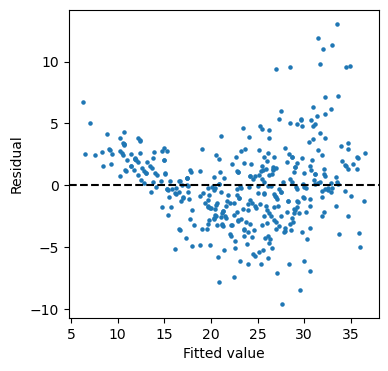

In [146]:
make_resid_plot(model_auto)

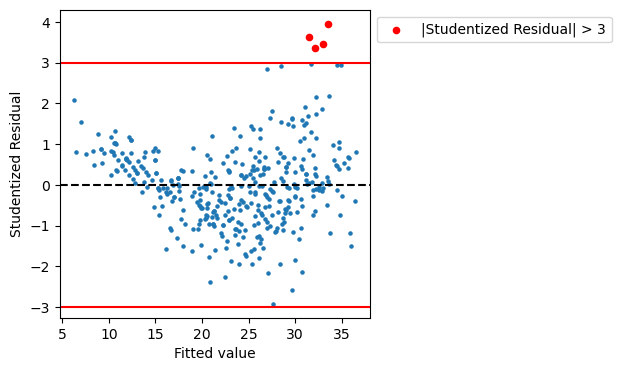

In [147]:
make_studentized_resid_plot(model_auto)

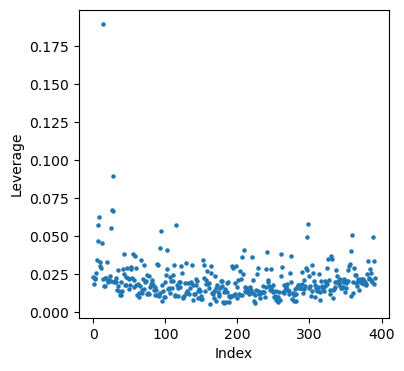

In [10]:
infl = model_auto.get_influence()
ax = subplots(figsize=(4,4))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag, s=5)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage');


(e)

Originally also included this as interaction terms. But what removes the nonlinearity in the residual plot is only the one left, even though it becomes statistically insignificant if the below are also included.  
('weight', 'acceleration'), ('horsepower', 'acceleration'),

In [32]:
predictor_list = [predictor for predictor in predictors] + [
                                                            ('horsepower', 'cylinders')]

X_interaction = MS(predictor_list).fit_transform(Auto)
model_interaction = sm.OLS(y, X_interaction).fit()
summarize(model_interaction)

coef  std err       t  P>|t|
intercept             11.7025    4.912   2.383  0.018
cylinders             -4.3061    0.458  -9.400  0.000
displacement          -0.0014    0.007  -0.201  0.840
horsepower            -0.3157    0.031 -10.304  0.000
weight                -0.0039    0.001  -6.250  0.000
acceleration          -0.1703    0.090  -1.889  0.060
year                   0.7393    0.045  16.476  0.000
origin                 0.9032    0.250   3.617  0.000
horsepower:cylinders   0.0402    0.004  10.619  0.000

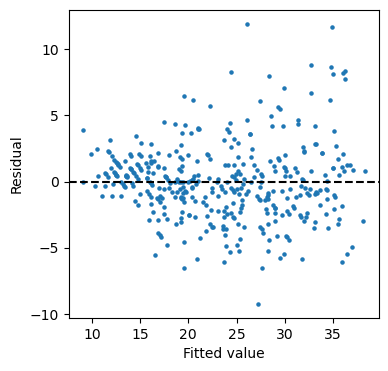

In [59]:
make_resid_plot(model_interaction)

(f)

In [52]:
predictor_list_nonlin = [predictor for predictor in predictors] + [poly('horsepower', degree=2),
                                                                  poly('weight', degree=2),
                                                                  poly('acceleration', degree=2)]

X_nonlin = MS(predictor_list_nonlin).fit_transform(Auto)
model_nonlin = sm.OLS(y, X_nonlin).fit()
summarize(model_nonlin)

coef  std err       t  P>|t|
intercept                       -13.0951    3.604  -3.633  0.000
cylinders                         0.1624    0.293   0.555  0.579
displacement                     -0.0050    0.007  -0.688  0.492
horsepower                       -0.0603    0.013  -4.651  0.000
weight                           -0.0042    0.001  -6.058  0.000
acceleration                     -0.3294    0.093  -3.524  0.000
year                              0.7827    0.044  17.598  0.000
origin                            0.6629    0.249   2.660  0.008
poly(horsepower, degree=2)[0]     1.7973    0.495   3.633  0.000
poly(horsepower, degree=2)[1]    15.6374    4.833   3.235  0.001
poly(weight, degree=2)[0]         2.3215    0.639   3.633  0.000
poly(weight, degree=2)[1]        22.6672    3.891   5.826  0.000
poly(acceleration, degree=2)[0]   3.7246    1.027   3.626  0.000
poly(acceleration, degree=2)[1]  13.9940    3.580   3.909  0.000

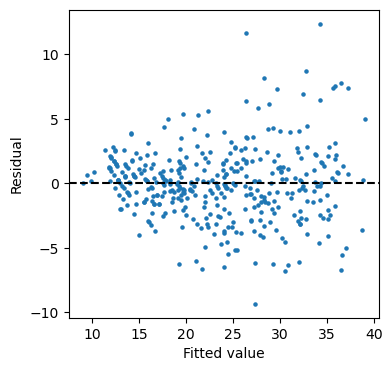

In [60]:
make_resid_plot(model_nonlin)

In [29]:
import statsmodels.formula.api as smf

formula = 'mpg ~ ' + ' + '.join(predictors) + (' + np.sqrt(horsepower)' 
                                               + ' + np.sqrt(weight)' 
                                               + ' + np.sqrt(acceleration)')
model_root = smf.ols(formula, data=Auto).fit()
summarize(model_root)


coef  std err       t  P>|t|
Intercept              119.1031   18.767   6.346  0.000
cylinders               -0.0631    0.287  -0.220  0.826
displacement            -0.0045    0.007  -0.623  0.534
horsepower               0.1676    0.067   2.508  0.013
weight                   0.0150    0.004   3.922  0.000
acceleration             3.0586    1.021   2.995  0.003
year                     0.7818    0.045  17.452  0.000
origin                   0.6398    0.251   2.544  0.011
np.sqrt(horsepower)     -4.7877    1.508  -3.175  0.002
np.sqrt(weight)         -2.0999    0.438  -4.795  0.000
np.sqrt(acceleration)  -26.2293    8.150  -3.218  0.001

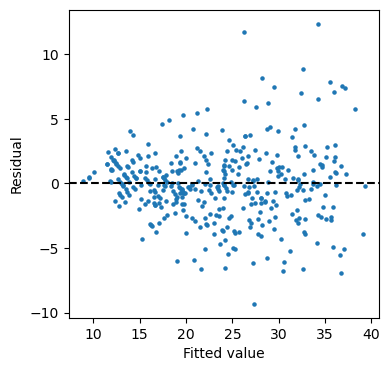

In [81]:
make_resid_plot(model_root)

## Exercise 10<a name="3,10"></a>
Back to [ToC](#toc)

This question should be answered using the Carseats data set.  
(a) Fit a multiple regression model to predict Sales using Price,
Urban, and US.  
(b) Provide an interpretation of each coefficient in the model. Be
careful—some of the variables in the model are qualitative!  
(c) Write out the model in equation form, being careful to handle the qualitative variables properly.  
(d) For which of the predictors can you reject the null hypothesis $H_0 :β_j =0$?  
(e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.  
(f) How well do the models in (a) and (e) fit the data?  
(g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).  
(h) Is there evidence of outliers or high leverage observations in the model from (e)?  

In [81]:
Carseats = load_data('Carseats')
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [82]:
Carseats.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

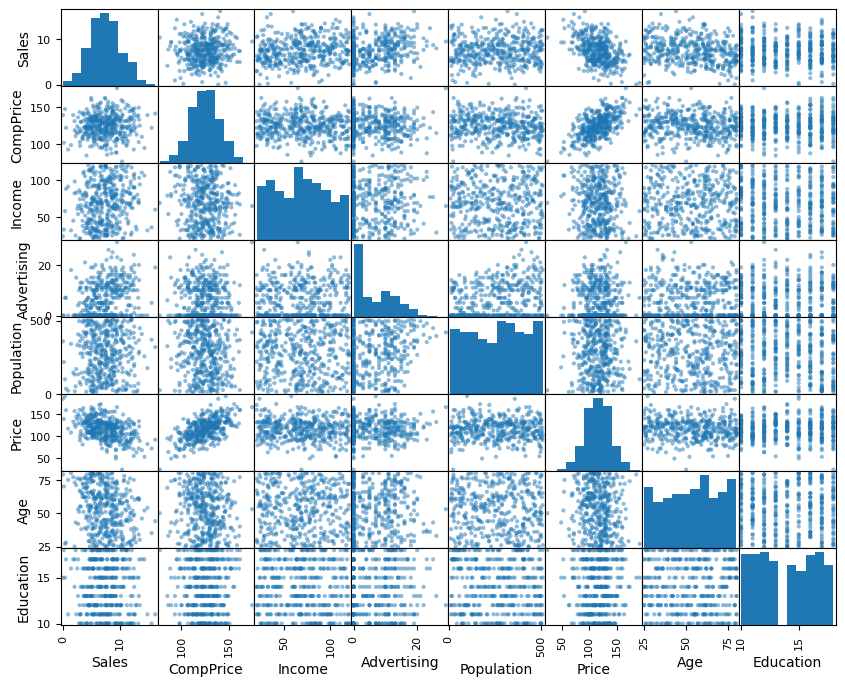

In [83]:
pd.plotting.scatter_matrix(Carseats, figsize=(10, 8));

In [84]:
carseats_corr = Carseats.corr(numeric_only=True)
carseats_corr

Sales  CompPrice    Income  Advertising  Population     Price  \
Sales        1.000000   0.064079  0.151951     0.269507    0.050471 -0.444951   
CompPrice    0.064079   1.000000 -0.080653    -0.024199   -0.094707  0.584848   
Income       0.151951  -0.080653  1.000000     0.058995   -0.007877 -0.056698   
Advertising  0.269507  -0.024199  0.058995     1.000000    0.265652  0.044537   
Population   0.050471  -0.094707 -0.007877     0.265652    1.000000 -0.012144   
Price       -0.444951   0.584848 -0.056698     0.044537   -0.012144  1.000000   
Age         -0.231815  -0.100239 -0.004670    -0.004557   -0.042663 -0.102177   
Education   -0.051955   0.025197 -0.056855    -0.033594   -0.106378  0.011747   

                  Age  Education  
Sales       -0.231815  -0.051955  
CompPrice   -0.100239   0.025197  
Income      -0.004670  -0.056855  
Advertising -0.004557  -0.033594  
Population  -0.042663  -0.106378  
Price       -0.102177   0.011747  
Age          1.000000   0.006488  
Education    0.006488   1.000000

In [85]:
np.fill_diagonal(carseats_corr.values, np.nan)

high_correlations = carseats_corr[(carseats_corr > 0.21) | (carseats_corr < -0.21)]

# Iterate through the correlation matrix
for i, col in enumerate(carseats_corr.columns):
    for j, row in enumerate(carseats_corr.index):
        if i < j:  # Only consider the upper triangle (excluding diagonal)
            correlation = high_correlations.iloc[j, i]  # Get correlation coefficient
            if not np.isnan(correlation):  # Check if correlation is not NaN
                print(f"{col}, {row}: {correlation:.2f}")

Sales, Advertising: 0.27
Sales, Price: -0.44
Sales, Age: -0.23
CompPrice, Price: 0.58
Advertising, Population: 0.27


*Advertising*: Local advertising budget for company at each location  
*Age*: Average age of the local population  
*CompPrice*: Price charged by competitor at each location  
*Population*: Population size in region

Does someone have market power? Correlation between Price and CompPrice should be 1.

(a)–(c)

In [87]:
y = Carseats['Sales']
X = MS(['Price', 'Urban', 'US']).fit_transform(Carseats)
model_seats1 = sm.OLS(y, X).fit()
summarize(model_seats1)

coef  std err       t  P>|t|
intercept   13.0435    0.651  20.036  0.000
Price       -0.0545    0.005 -10.389  0.000
Urban[Yes]  -0.0219    0.272  -0.081  0.936
US[Yes]      1.2006    0.259   4.635  0.000

If price is 0, and we are not in an urban area and not in the US, there would be ca. 13k sales (economists in shambles).  
Ceteris paribus, 1200 more sales in the US than outside the US and ca. 20 more in urban areas.  
A unit price increase lowers sales by ca. 55.

$ Sales = \begin{cases} 13.04 - 0.05 \times \text{Price} - 0.02 & \text{if Urban = Yes} \\ 13.04 - 0 & \text{if Urban = No} \end{cases} + \begin{cases} 1.20 & \text{if US = Yes} \\ 0 & \text{if US = No} \end{cases} 
 $

(d)–(g)

In [114]:
y = Carseats['Sales']
X = MS(['Price', 'US']).fit_transform(Carseats)
model_seats2 = sm.OLS(y, X).fit()
summarize(model_seats)

coef  std err       t  P>|t|
intercept  13.0308    0.631  20.652    0.0
Price      -0.0545    0.005 -10.416    0.0
US[Yes]     1.1996    0.258   4.641    0.0

In [115]:
print(f"R^2 model 1: {model_seats1.rsquared}")
print(f"R^2 model 2: {model_seats2.rsquared}")
print(f"RSE model 1: {np.sqrt(model_seats1.scale)}")
print(f"RSE model 2: {np.sqrt(model_seats2.scale)}")

R^2 model 1: 0.23927539218405525
R^2 model 2: 0.23926288842678545
RSE model 1: 2.4724924402701642
RSE model 2: 2.4693968005744447


In [118]:
confidence_intervals = model_seats2.conf_int(alpha=0.05)
print(confidence_intervals)

                  0          1
intercept  11.79032  14.271265
Price      -0.06476  -0.044195
US[Yes]     0.69152   1.707766


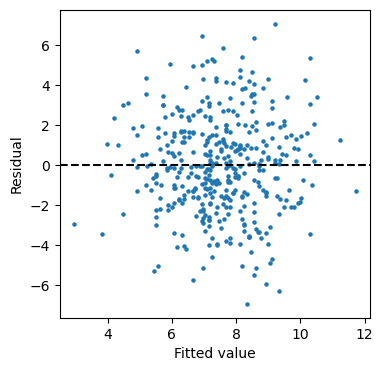

In [119]:
make_resid_plot(model_seats2)

(h)

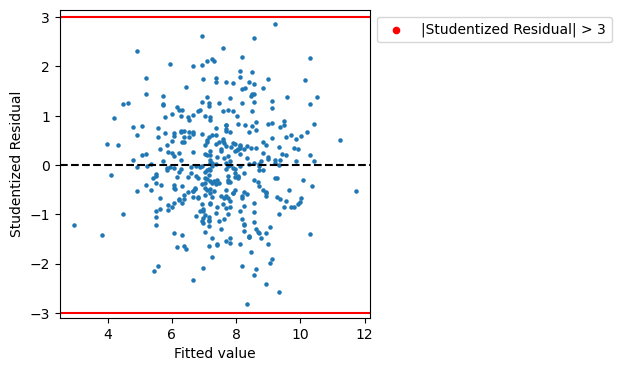

In [135]:
make_studentized_resid_plot(model_seats2)

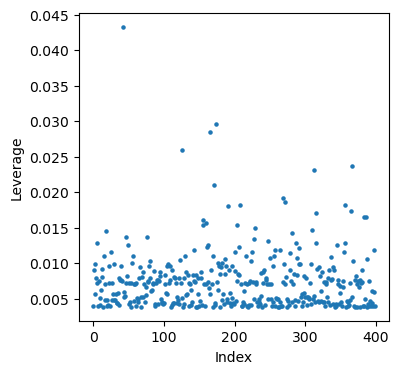

In [136]:
infl = model_seats2.get_influence()
ax = subplots(figsize=(4,4))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag, s=5)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage');


## Exercise 11<a name="3,11"></a>
Back to [ToC](#toc)

In this problem we will investigate the t-statistic for the null hypoth- esis H0 : β = 0 in simple linear regression without an intercept. To begin, we generate a predictor x and a response y as follows.
```Python
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)
```
(a) Perform a simple linear regression of y onto x, without an in- tercept. Report the coefficient estimate $\hat{β}$, the standard error of this coefficient estimate, and the t-statistic and p-value associ- ated with the null hypothesis $H_0 : β = 0$. Comment on these results. (You can perform regression without an intercept using the keywords argument `intercept=False` to `ModelSpec()`.)  
(b) Now perform a simple linear regression of x onto y without an intercept, and report the coefficient estimate, its standard error, and the corresponding t-statistic and p-values associated with the null hypothesis $H_0 : β = 0$. Comment on these results.  
(c) What is the relationship between the results obtained in (a) and (b)?

In [220]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)

Perform a simple linear regression of y onto x, without an intercept. Report the coefficient estimate $\hat{\beta}$, the standard error of this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis $H_0 : \beta = 0$. Comment on these results.

In [180]:
model_nointcp = sm.OLS(y, x).fit()
print(model_nointcp.rsquared)
summarize(model_nointcp)


0.7425605855144495


coef  std err       t  P>|t|
x1  1.9762    0.117  16.898    0.0

In [181]:
model_nointcp2 = sm.OLS(x, y).fit()
print(model_nointcp2.rsquared)
summarize(model_nointcp2)


0.7425605855144494


coef  std err       t  P>|t|
x1  0.3757    0.022  16.898    0.0

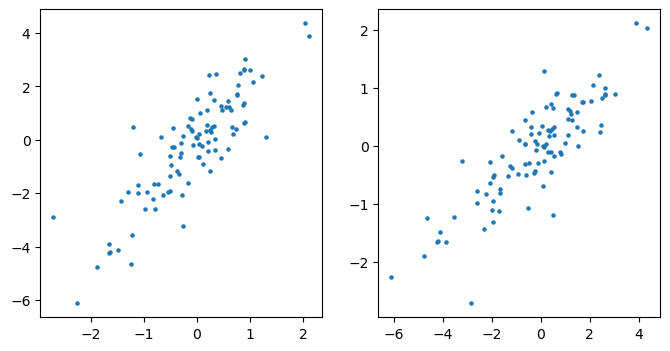

In [189]:
ax = subplots(ncols=2, figsize=(8, 4))[1]
ax[0].scatter(x, y, s=5);
ax[1].scatter(y, x, s=5);

## Exercise 12<a name="3,12"></a>
Back to [ToC](#toc)

Generate an example in Python with n = 100 observations in which the coefficient estimate for the regression of X onto Y is the same as the coefficient estimate for the regression of Y onto X.

In [213]:
np.random.seed(42)

n = 100
x = np.random.normal(size=n)
y = np.copy(x)
np.random.shuffle(y)

model_xy = sm.OLS(x, sm.add_constant(y)).fit()
model_yx = sm.OLS(y, sm.add_constant(x)).fit()

print(f"Coefficient estimate for X onto Y: {model_xy.params[1]}")
print(f"Coefficient estimate for Y onto X: {model_yx.params[1]}")


Coefficient estimate for X onto Y: 0.06134131407849562
Coefficient estimate for Y onto X: 0.061341314078495524


## Exercise 13<a name="3,13"></a>
Back to [ToC](#toc)

In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use the default random number generator with seed set to 1 prior to starting part (a) to ensure consistent results.  
(a) Using the normal() method of your random number generator, create a vector, x, containing 100 observations drawn from a N(0,1) distribution. This represents a feature, X.  
(b) Using the normal() method, create a vector, eps, containing 100 observations drawn from a $N(0,0.25)$ distribution—a normal distribution with mean zero and variance 0.25.  
(c) Using x and eps, generate a vector y according to the model  
$Y =−1+0.5X+\epsilon$. (3.39)  
What is the length of the vector y? What are the values of $β_0$ and $β_1$ in this linear model?  
(d) Create a scatterplot displaying the relationship between x and y. Comment on what you observe.  
(e) Fit a least squares linear model to predict y using x. Comment on the model obtained. How do $\hat{β}_0$ and $\hat{β}_1$ compare to $β_0$ and $β_1$?  
(f) Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the `legend()` method of the axes to create an appro- priate legend.  
(g) (Skip)   
(h) Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model (3.39) should remain the same. You can do this by decreasing the vari- ance of the normal distribution used to generate the error term ε in (b). Describe your results.  
(i) Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model (3.39) should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term ε in (b). Describe your results.  
(j) What are the confidence intervals for $β_0$ and $β_1$ based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.

In [57]:
rng = np.random.default_rng(1)

x = rng.normal(size=100)
eps = rng.normal(loc=0, scale=1.50, size=100)

y = -1 + 0.5*x + eps


In [58]:
model_test = sm.OLS(y, sm.add_constant(x)).fit()
summarize(model_test)

coef  std err      t  P>|t|
const -1.1140    0.151 -7.386  0.000
x1     0.4529    0.176  2.566  0.012

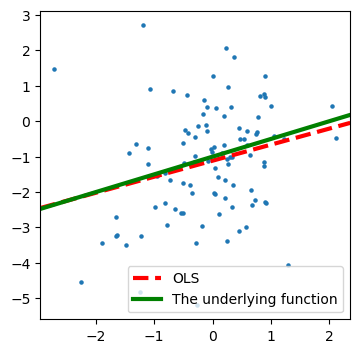

In [59]:
ax = subplots(figsize=(4, 4))[1]
ax.scatter(x, y, s=5);
ax.axline((0, model_test.params[0]), slope=model_test.params[1], color='red', linestyle='--', linewidth=3, label='OLS');
ax.axline((0, -1), slope=0.5, color='green', linestyle='-', linewidth=3, label='The underlying function');
ax.legend();

Almost exactly right. But look at that t-statistic! We physicists now.  
On the other hand, a quadratic term produces a P-value of almost 1. Entirely useless, as expected.

In [60]:
X = pd.DataFrame({'x':x})
design_square = MS(['x']).fit_transform(X)
model_square = sm.OLS(y, design_square).fit()
summarize(model_square)

coef  std err      t  P>|t|
intercept -1.1140    0.151 -7.386  0.000
x          0.4529    0.176  2.566  0.012

(h)–(j)  
Originally: 
```python
eps = rng.normal(loc=0, scale=0.25, size=100)
```

Unsurprisingly, the model gets more accurate. The spread of the data points zips down to almost a line when $\epsilon = 0.05$, the t-statistics blow up to almost 200.
  
| Model      | $\beta_0$ | $\beta_1$ |
| ----------- | ----------- | -------|
| Less Noise (0.05)   | \[-1.014, -0.994\] | \[0.487, 0.510\] |
| Original (0.25)      | \[-1.069, -0.969\]        | \[0.434, 0.551\] |
| More Noise (0.75)   | \[-1.207, -0.907\]        | \[0.301, 0.652\] |
| Even More Noise (1.50)   | \[-1.413, -0.815\] | \[0.103, 0.803\] |

Not that much of a difference? The edges of all CIs move as expected, but going from pretty good (0.25) to very good (0.05) barely increases accuracy.

In [61]:
confidence_intervals = model_square.conf_int(alpha=0.05)
print(confidence_intervals)

                  0         1
intercept -1.413346 -0.814731
x          0.102696  0.803050


## Exercise 14<a name="3,14"></a>
Back to [ToC](#toc)

This problem focuses on the collinearity problem.  
(a) Perform the following commands in Python:  
```Python
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)
```
The last line corresponds to creating a linear model in which y is a function of x1 and x2. Write out the form of the linear model. What are the regression coefficients?  
(b) What is the correlation between x1 and x2? Create a scatterplot displaying the relationship between the variables.  
(c) Using this data, fit a least squares regression to predict y using x1 and x2. Describe the results obtained. What are $\hat{β}_0$, $\hat{β}_1$, and $\hat{β}_2$? How do these relate to the true $β_0$, $β_1$, and $β_2$? Can you reject the null hypothesis $H_0 : β_1 = 0$? How about the null hypothesis $H_0 : β_2 = 0$?  
(d) Now fit a least squares regression to predict y using only x1. Comment on your results. Can you reject the null hypothesis $H_0 :β_1 =0$?  
(e) Now fit a least squares regression to predict y using only x2. Comment on your results. Can you reject the null hypothesis $H_0 :β_1 =0$?  
(f) Do the results obtained in (c)–(e) contradict each other? Explain your answer.  
(g) Suppose we obtain one additional observation, which was unfor- tunately mismeasured. We use the function np.concatenate() to add this additional observation to each of x1, x2 and y.  
```Python
x1 = np.concatenate([x1, [0.1]]) 
x2 = np.concatenate([x2, [0.8]]) 
y = np.concatenate([y, [6]])
```
Re-fit the linear models from (c) to (e) using this new data. What effect does this new observation have on the each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.

Parameter 0: 1.96, P = 0.000
Parameter 1: 1.62, P = 0.003
Parameter 2: 0.94, P = 0.259
Correlation between x1 and x2: 0.77


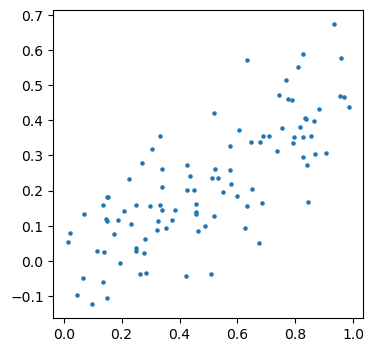

In [86]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

# OLS model
X = pd.DataFrame({'x1':x1, 'x2':x2})
X = sm.add_constant(X)
helper_mdl = sm.OLS(y, X).fit()

for param in range(3):
    print(f"Parameter {param}: {helper_mdl.params[param]:.2f}, P = {helper_mdl.pvalues[param]:.3f}")

# plotting
ax = subplots(figsize=(4,4))[1]
ax.scatter(x1, x2, s=5);

print(f"Correlation between x1 and x2: {np.corrcoef(x1, x2)[1][0]:.2f}")

In [95]:
for col in ['x2', 'x1']:
    X_1 = X.drop(col, axis=1)
    X_1 = sm.add_constant(X_1)
    helper_single = sm.OLS(y, X_1).fit()
    print(summarize(helper_single))

         coef  std err       t  P>|t|
const  1.9371    0.189  10.242    0.0
x1     2.0771    0.335   6.196    0.0
         coef  std err       t  P>|t|
const  2.3239    0.154  15.124    0.0
x2     2.9103    0.550   5.291    0.0


(g)

Parameter 0: 2.06, P = 0.000
Parameter 1: 0.86, P = 0.069
Parameter 2: 2.27, P = 0.002
Correlation between x1 and x2: 0.68


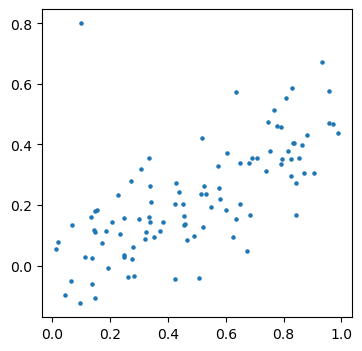

In [97]:
x1_ = np.concatenate([x1, [0.1]]) 
x2_ = np.concatenate([x2, [0.8]]) 
y_ = np.concatenate([y, [6]])

# OLS
X_ = pd.DataFrame({'x1_':x1_, 'x2_':x2_})
X_ = sm.add_constant(X_)
helper_mdl_ = sm.OLS(y_, X_).fit()

for param in range(3):
    print(f"Parameter {param}: {helper_mdl_.params[param]:.2f}, P = {helper_mdl_.pvalues[param]:.3f}")

# plotting
ax = subplots(figsize=(4,4))[1]
ax.scatter(x1_, x2_, s=5);

print(f"Correlation between x1 and x2: {np.corrcoef(x1_, x2_)[1][0]:.2f}")

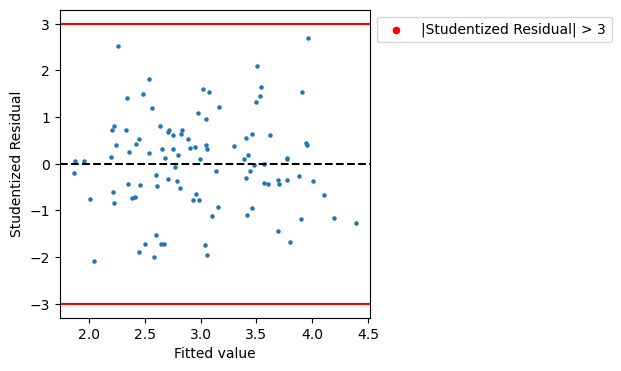

In [98]:
make_studentized_resid_plot(helper_mdl_)

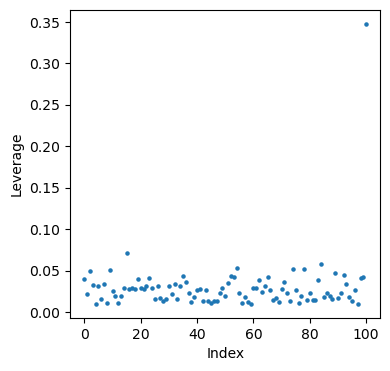

In [100]:
infl = helper_mdl_.get_influence()
ax = subplots(figsize=(4,4))[1]
ax.scatter(np.arange(X_.shape[0]), infl.hat_matrix_diag, s=5)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage');


         coef  std err       t  P>|t|
const  2.0739    0.201  10.310    0.0
x1_    1.8760    0.358   5.236    0.0
         coef  std err       t  P>|t|
const  2.2840    0.151  15.088    0.0
x2_    3.1458    0.524   6.008    0.0


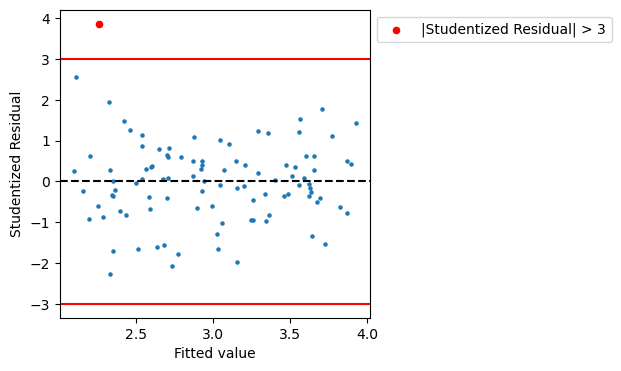

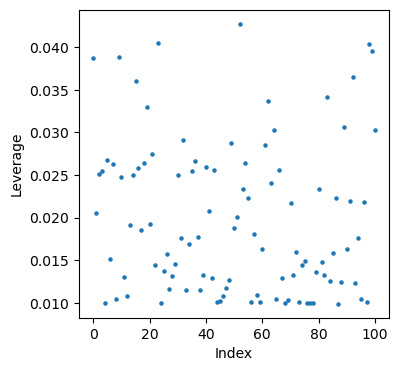

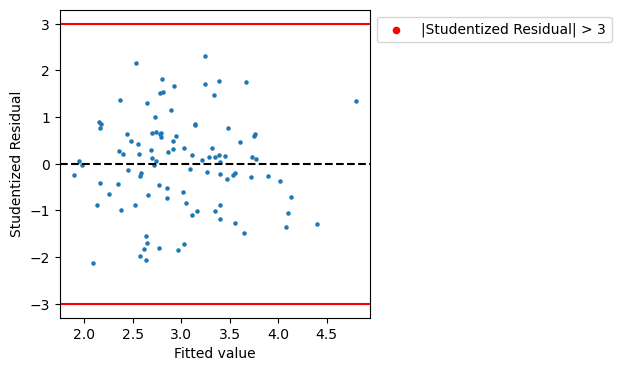

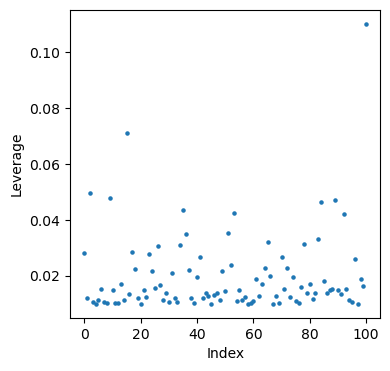

In [102]:
for col in ['x2_', 'x1_']:
    X_1_ = X_.drop(col, axis=1)
    X_1_ = sm.add_constant(X_1_)
    helper_single_ = sm.OLS(y_, X_1_).fit()
    print(summarize(helper_single_))
    make_studentized_resid_plot(helper_single_)

    infl = helper_single_.get_influence()
    ax = subplots(figsize=(4,4))[1]
    ax.scatter(np.arange(X_1_.shape[0]), infl.hat_matrix_diag, s=5)
    ax.set_xlabel('Index')
    ax.set_ylabel('Leverage');


The added value is slightly unusual only from the perspective of the range of x2. So it is a high leverage point when we drop x1, but an outlier when we drop x2 from our regression. And vice versa, it isn't high leverage when dropping x2, since the x1 value of the new point is in maybe the lower 10% of all x1 values; and when dropping x1 (and OLSing with x2) it isn't an outlier for the same reason.

## Exercise 15<a name="3,15"></a>
Back to [ToC](#toc)

This problem involves the Boston data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.  
(a) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.  
(b) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis $H_0 : β_j = 0$?  
(c) How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regres- sion model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.  
(d) Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form  
$Y =β_0 +β_1X+β_2X^2 +β_3X^3 +ε$.

zn: 0.0000055
indus: 0.0000000
Not significant: chas: 0.21
nox: 0.0000000
rm: 0.0000006
age: 0.0000000
dis: 0.0000000
rad: 0.0000000
tax: 0.0000000
ptratio: 0.0000000
lstat: 0.0000000
medv: 0.0000000


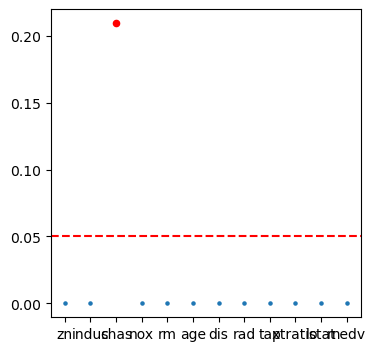

In [150]:
Boston = load_data('Boston')

terms = Boston.columns.drop('crim')
y = Boston['crim']

coef_slr = []
p_values = []
p_values_nonsig = []
terms_nonsig = []
for term in terms:
    X = MS([term]).fit_transform(Boston)
    model_variable = sm.OLS(y, X).fit()
    p_values.append(model_variable.pvalues[1])
    coef_slr.append(model_variable.params[1])
    if model_variable.pvalues[1] < 0.05:
        print(f"{term}: {model_variable.pvalues[1]:.7f}")
    else:
        terms_nonsig.append(term)
        p_values_nonsig.append(model_variable.pvalues[1])
        print(f"Not significant: {term}: {model_variable.pvalues[1]:.2f}")

ax = subplots(figsize=(4, 4))[1]
ax.scatter(terms, p_values, s=5)
ax.scatter(terms_nonsig, p_values_nonsig, color='red', s=20)
ax.axhline(y=0.05, c='r', ls='--');

In [147]:
X_mlr = MS(terms).fit_transform(Boston)
model_mlr = sm.OLS(y, X_mlr).fit()
for col in terms:
    if model_mlr.pvalues[col] < 0.05:
        print(f"{col}: {model_mlr.pvalues[col]:.5f}")
summarize(model_mlr)

zn: 0.01534
dis: 0.00037
rad: 0.00000
medv: 0.00026


coef  std err      t  P>|t|
intercept  13.7784    7.082  1.946  0.052
zn          0.0457    0.019  2.433  0.015
indus      -0.0584    0.084 -0.698  0.486
chas       -0.8254    1.183 -0.697  0.486
nox        -9.9576    5.290 -1.882  0.060
rm          0.6289    0.607  1.036  0.301
age        -0.0008    0.018 -0.047  0.962
dis        -1.0122    0.282 -3.584  0.000
rad         0.6125    0.088  6.997  0.000
tax        -0.0038    0.005 -0.730  0.466
ptratio    -0.3041    0.186 -1.632  0.103
lstat       0.1388    0.076  1.833  0.067
medv       -0.2201    0.060 -3.678  0.000

Yes, this is correct!

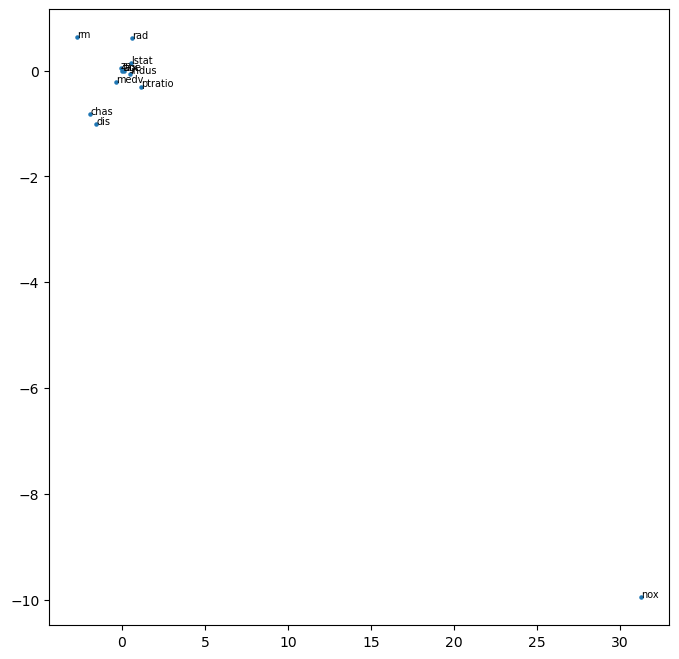

In [165]:
coef_mlr = [coef for coef in model_mlr.params[1:]]

ax = subplots(figsize=(8, 8))[1]
ax.scatter(coef_slr, coef_mlr, s=5);

for i, name in enumerate(terms):
    ax.annotate(name, (coef_slr[i], coef_mlr[i]), size=7)

(d)

In [178]:
for term in terms:
    X_nonlin = MS([poly(term, degree=3)]).fit_transform(Boston)
    model_nonlin = sm.OLS(y, X_nonlin).fit()
    print(summarize(model_nonlin))

                          coef  std err      t  P>|t|
intercept               3.6135    0.372  9.709  0.000
poly(zn, degree=3)[0] -38.7498    8.372 -4.628  0.000
poly(zn, degree=3)[1]  23.9398    8.372  2.859  0.004
poly(zn, degree=3)[2] -10.0719    8.372 -1.203  0.230
                             coef  std err       t  P>|t|
intercept                  3.6135    0.330  10.950  0.000
poly(indus, degree=3)[0]  78.5908    7.423  10.587  0.000
poly(indus, degree=3)[1] -24.3948    7.423  -3.286  0.001
poly(indus, degree=3)[2] -54.1298    7.423  -7.292  0.000
                           coef  std err      t  P>|t|
intercept                3.7414    0.396  9.454  0.000
poly(chas, degree=3)[0] -0.0569    0.012 -4.939  0.000
poly(chas, degree=3)[1] -0.0988    0.014 -6.891  0.000
poly(chas, degree=3)[2] -0.3508    0.282 -1.242  0.215
                           coef  std err       t  P>|t|
intercept                3.6135    0.322  11.237    0.0
poly(nox, degree=3)[0]  81.3720    7.234  11.249    0

# Chapter 4 "Classification"<a name="4"></a>
Back to [ToC](#toc)

In [11]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from matplotlib.pyplot import subplots

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
from ISLP import confusion_table

from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


## Exercise 13<a name="4,13"></a>
Back to [ToC](#toc)

This question should be answered using the Weekly data set, which is part of the ISLP package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.  
(a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?  
(b) Use the full data set to perform a logistic regression with
Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?  
(c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.  
(d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).  
(e) Repeat (d) using LDA.  
(f) Repeat (d) using QDA.  
(g) Repeat (d) using KNN with K = 1.  
(h) Repeat (d) using naive Bayes.  
(i) Which of these methods appears to provide the best results on this data?  
(j) Experiment with different combinations of predictors, includ- ing possible transformations and interactions, for each of the methods. Report the variables, method, and associated confu- sion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifier.

In [12]:
Weekly = load_data('Weekly')
print(Weekly[:5])
Weekly.describe()

   Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
0  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down
1  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down
2  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up
3  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up
4  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178        Up


Year         Lag1         Lag2         Lag3         Lag4  \
count  1089.000000  1089.000000  1089.000000  1089.000000  1089.000000   
mean   2000.048669     0.150585     0.151079     0.147205     0.145818   
std       6.033182     2.357013     2.357254     2.360502     2.360279   
min    1990.000000   -18.195000   -18.195000   -18.195000   -18.195000   
25%    1995.000000    -1.154000    -1.154000    -1.158000    -1.158000   
50%    2000.000000     0.241000     0.241000     0.241000     0.238000   
75%    2005.000000     1.405000     1.409000     1.409000     1.409000   
max    2010.000000    12.026000    12.026000    12.026000    12.026000   

              Lag5       Volume        Today  
count  1089.000000  1089.000000  1089.000000  
mean      0.139893     1.574618     0.149899  
std       2.361285     1.686636     2.356927  
min     -18.195000     0.087465   -18.195000  
25%      -1.166000     0.332022    -1.154000  
50%       0.234000     1.002680     0.241000  
75%       1.405000     2.053727     1.405000  
max      12.026000     9.328214    12.026000

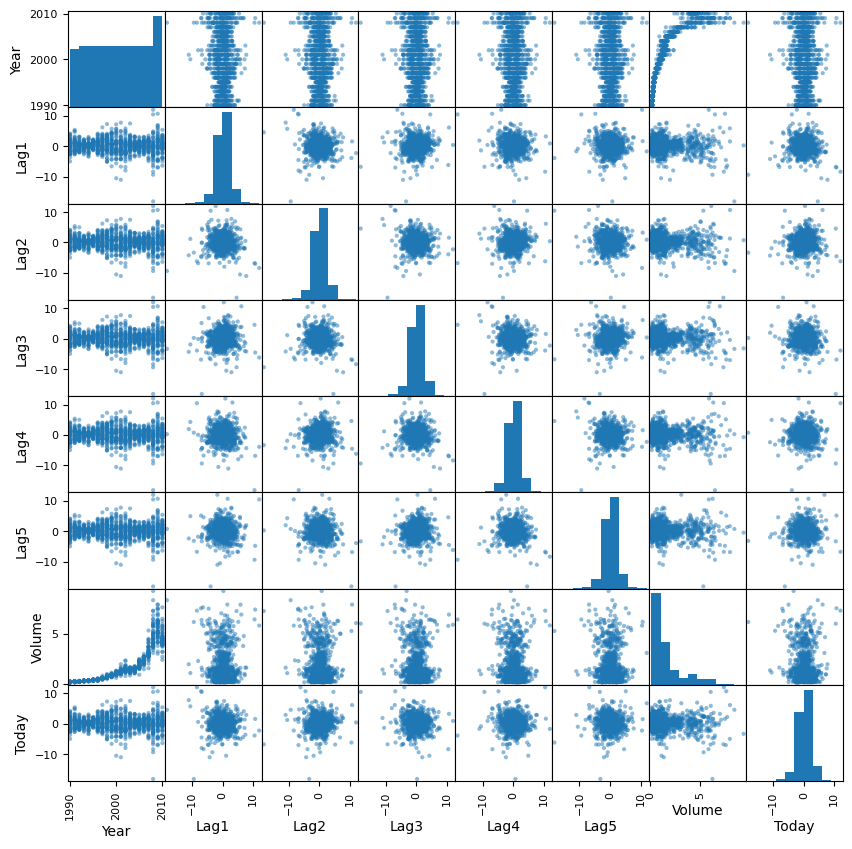

In [95]:
pd.plotting.scatter_matrix(Weekly, figsize=(10, 10));

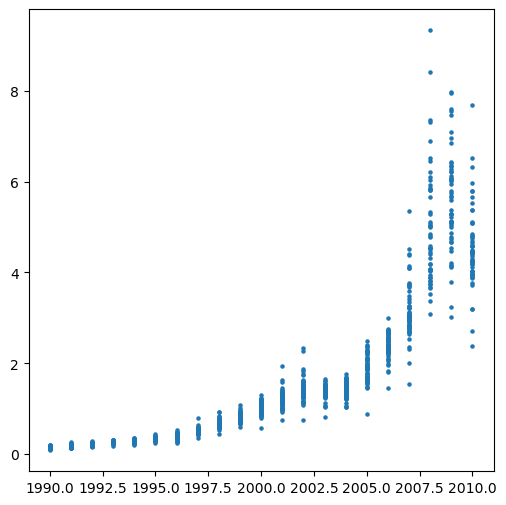

In [96]:
ax = subplots(figsize=(6, 6))[1]
ax.scatter(Weekly['Year'], Weekly['Volume'], s=5);

In [97]:
Weekly.corr(numeric_only=True)

Year      Lag1      Lag2      Lag3      Lag4      Lag5    Volume  \
Year    1.000000 -0.032289 -0.033390 -0.030006 -0.031128 -0.030519  0.841942   
Lag1   -0.032289  1.000000 -0.074853  0.058636 -0.071274 -0.008183 -0.064951   
Lag2   -0.033390 -0.074853  1.000000 -0.075721  0.058382 -0.072499 -0.085513   
Lag3   -0.030006  0.058636 -0.075721  1.000000 -0.075396  0.060657 -0.069288   
Lag4   -0.031128 -0.071274  0.058382 -0.075396  1.000000 -0.075675 -0.061075   
Lag5   -0.030519 -0.008183 -0.072499  0.060657 -0.075675  1.000000 -0.058517   
Volume  0.841942 -0.064951 -0.085513 -0.069288 -0.061075 -0.058517  1.000000   
Today  -0.032460 -0.075032  0.059167 -0.071244 -0.007826  0.011013 -0.033078   

           Today  
Year   -0.032460  
Lag1   -0.075032  
Lag2    0.059167  
Lag3   -0.071244  
Lag4   -0.007826  
Lag5    0.011013  
Volume -0.033078  
Today   1.000000

In [13]:
logit_predictors = Weekly.columns.drop(['Today', 'Direction', 'Year'])
X_long_logit = MS(logit_predictors).fit_transform(Weekly)
y_long_logit = Weekly.Direction == "Up" # It's either this or using sklearn's LabelEncoder.

glm_long_logit = sm.GLM(y_long_logit, X_long_logit, family=sm.families.Binomial())
results_long_logit = glm_long_logit.fit()

summarize(results_long_logit)

coef  std err      z  P>|z|
intercept  0.2669    0.086  3.106  0.002
Lag1      -0.0413    0.026 -1.563  0.118
Lag2       0.0584    0.027  2.175  0.030
Lag3      -0.0161    0.027 -0.602  0.547
Lag4      -0.0278    0.026 -1.050  0.294
Lag5      -0.0145    0.026 -0.549  0.583
Volume    -0.0227    0.037 -0.616  0.538

In [118]:
probs_long_logit = results_long_logit.predict()
labels_long_logit = np.array(['Down']*len(Weekly['Direction'])) # Eliding the square brackets for 'Down' produces one long string
labels_long_logit[probs_long_logit > 0.5] = 'Up'
C_long_logit = confusion_table(labels_long_logit, Weekly.Direction)
C_long_logit

Truth      Down   Up
Predicted           
Down         54   48
Up          430  557

In [100]:
td = C_long_logit.loc['Down', 'Down']
tu = C_long_logit.loc['Up', 'Up']
fd = C_long_logit.loc['Down', 'Up']
fu = C_long_logit.loc['Up', 'Down']

print(f"Total correct: {(td + tu)/(td+tu+fd+fu):.3f}")
print(f"Up prediction accuracy: {(tu)/(tu+fu):.3f}. Guessing Up every time: {(fd+tu)/(td+tu+fd+fu):.3f}")
print(f"Down prediction accuracy: {(td)/(td+fd):.3f}. Guessing Down every time: {(fu+td)/(td+tu+fd+fu):.3f}")

Total correct: 0.561
Up prediction accuracy: 0.564. Guessing Up every time: 0.556
Down prediction accuracy: 0.529. Guessing Down every time: 0.444


(d)–(h)

In [101]:
train = (Weekly.Year < 2009)

X_logit = MS(['Lag2']).fit_transform(Weekly)
y_logit = Weekly.Direction == "Up"

X_logit_train, X_logit_test = X_logit.loc[train], X_logit.loc[~train]
y_train, y_test = y_logit.loc[train], y_logit.loc[~train]
label_train, label_test = Weekly.Direction[train], Weekly.Direction[~train]

probs_logit = sm.GLM(y_train, X_logit_train, family=sm.families.Binomial()).fit().predict(exog=X_logit_test)
label_predict = np.where(probs_logit > 0.5, 'Up', 'Down')

confusion_table(label_predict, label_test)


Truth      Down  Up
Predicted          
Down          9   5
Up           34  56

In [102]:
print(f"fraction correct: {np.mean(label_predict == label_test)}")
print(f"test-set error rate: {np.mean(label_predict != label_test)}")

fraction correct: 0.625
test-set error rate: 0.375


In [103]:
lda = LDA(store_covariance=True)
qda = QDA(store_covariance=True)
NB = GaussianNB()
knn1 = KNeighborsClassifier(n_neighbors=1)

X_train, X_test = [M.drop(columns=['intercept']) for M in [X_logit_train, X_logit_test]]
X_train_knn, X_test_knn = [np.asarray(X) for X in [X_train, X_test]]

for model in [lda, qda, NB, knn1]:
    if model == knn1:
        model.fit(X_train_knn, label_train)
        pred = model.predict(X_test_knn)
    else:
        model.fit(X_train, label_train)
        pred = model.predict(X_test)
    print(model.__class__.__name__)
    print(confusion_table(pred, label_test))
    print(round(np.mean(pred == label_test), 3))
    print()
    

LinearDiscriminantAnalysis
Truth      Down  Up
Predicted          
Down          9   5
Up           34  56
0.625

QuadraticDiscriminantAnalysis
Truth      Down  Up
Predicted          
Down          0   0
Up           43  61
0.587

GaussianNB
Truth      Down  Up
Predicted          
Down          0   0
Up           43  61
0.587

KNeighborsClassifier
Truth      Down  Up
Predicted          
Down         21  30
Up           22  31
0.5



## Exercise 14<a name="4,14"></a>
Back to [ToC](#toc)

In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set.  
(a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() method of the data frame. Note you may find it helpful to add a column mpg01 to the data frame by assignment. Assuming you have stored the data frame as Auto, this can be done as follows:  
`Auto['mpg01'] = mpg01`  
(b) Explore the data graphically in order to investigate the associ- ation between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scat- terplots and boxplots may be useful tools to answer this ques- tion. Describe your findings.  
(c) Split the data into a training set and a test set.  
(d) Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?  
(e) Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?  
(f) Perform logistic regression on the training data in order to pre- dict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?  
(g) Perform naive Bayes on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?  
(h) Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that seemed most associated with mpg01 in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?

In [104]:
Auto = load_data('Auto')
median_mpg = Auto.mpg.median()
mpg01 = np.where(Auto['mpg'] > median_mpg, 1, 0)
Auto['mpg01'] = mpg01

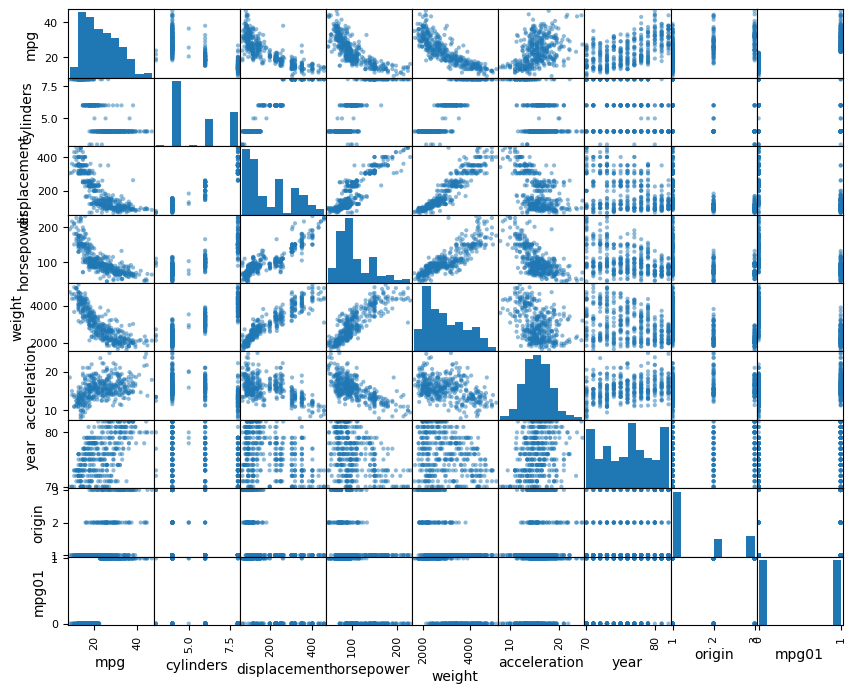

In [105]:
pd.plotting.scatter_matrix(Auto, figsize=(10,8));

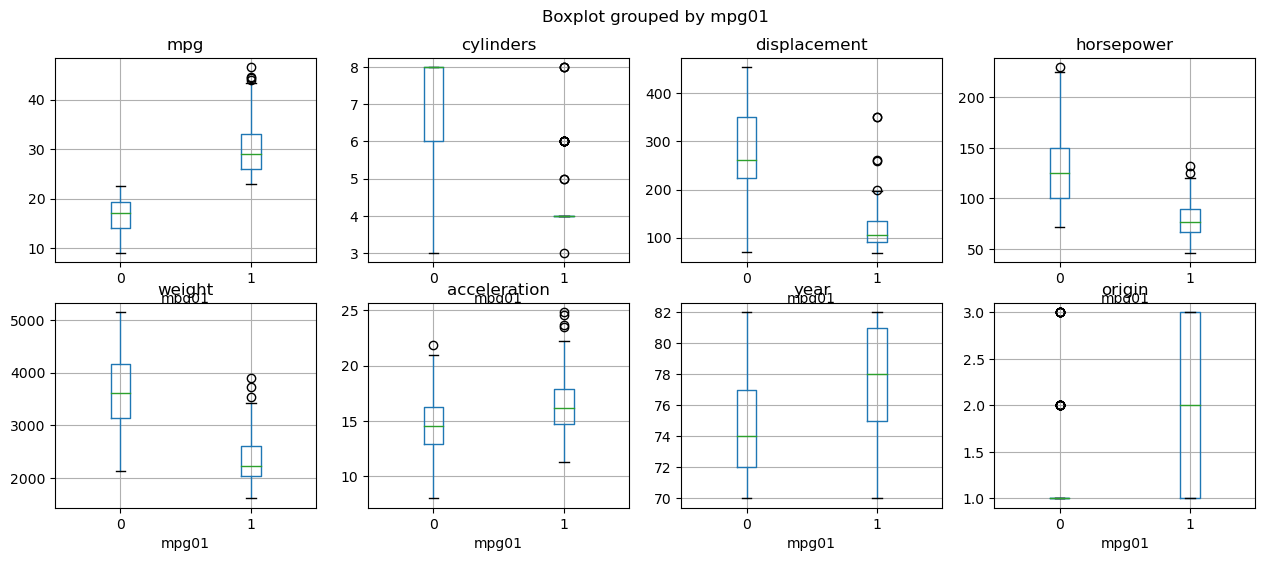

In [106]:
fig, ax = subplots(nrows=2, ncols=4, figsize=(15, 6))

for i, column in enumerate(Auto.columns.drop(['mpg01', 'name'])):
    j = 1 if i > 3 else 0
    k = i if i <= 3 else i - 4  # Adjusting the column index for the second row
    Auto.boxplot(column, by='mpg01', ax=ax[j][k])


In [121]:
# np.asarray not actually necessary

(X_train, X_test, y_train, y_test) = train_test_split(np.asarray(Auto[['mpg', 'year']]), 
                                                      Auto.mpg01, 
                                                      test_size=(round(len(Auto.mpg01)/3)), 
                                                      random_state=0)
for model in [lda, qda, NB]:
    pred = model.fit(X_train, y_train).predict(X_test)
    print(f"Test error rate for {model.__class__.__name__}: {np.mean(y_test != pred):.3%}")


Test error rate for LinearDiscriminantAnalysis: 1.527%
Test error rate for QuadraticDiscriminantAnalysis: 3.053%
Test error rate for GaussianNB: 2.290%


In [108]:
min_error = float('inf')
best_K = 0

for K in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn_pred = knn.fit(X_train, y_train).predict(X_test)
    test_error = np.mean(knn_pred != y_test)
    
    if test_error < min_error:
        min_error = test_error
        best_K = K

print(f"Best K: {best_K}, Test Error: {min_error}")


Best K: 5, Test Error: 0.0


In [109]:
glm_train = sm.GLM(y_train,
                   X_train,
                   family=sm.families.Binomial())
probs = glm_train.fit().predict(exog=X_test)
predictions = (probs > 0.5).astype(int)
print(f"{np.mean(predictions != y_test):.3%}")

3.053%


In [123]:
len(predictions)

131

In [124]:
len(y_test)

131

## Exercise 15<a name="4,15"></a>
Back to [ToC](#toc)

This problem involves writing functions.  
(a) Write a function, `Power()`, that prints out the result of raising 2 to the 3rd power. In other words, your function should compute $2^3$ and print out the results.  
Hint: Recall that `x**a` raises x to the power a. Use the `print()` function to display the result.  
(b) Create a new function, `Power2()`, that allows you to pass any two numbers, x and a, and prints out the value of $x^a$. You can do this by beginning your function with the line  
`def Power2(x, a):`  
You should be able to call your function by entering, for instance,  
`Power2(3, 8)`  
on the command line. This should output the value of 38, namely, 6, 561.  
(c) Using the Power2() function that you just wrote, compute $10^3$, $8^{17}$, and $131^3$.  
(d) Now create a new function, Power3(), that actually returns the
result $x^a$ as a Python object, rather than simply printing it
to the screen. That is, if you store the value $x^a$ in an object
called result within your function, then you can simply return return this result, using the following line:
`return result` 
Note that the line above should be the last line in your function, and it should be indented 4 spaces.  
(e) Now using the Power3() function, create a plot of $f(x) = x^2$. The x-axis should display a range of integers from 1 to 10, and the y-axis should display $x^2$. Label the axes appropriately, and use an appropriate title for the figure. Consider displaying either the x-axis, the y-axis, or both on the log-scale. You can do this by using the `ax.set_xscale()` and `ax.set_yscale()` methods of the axes you are plotting to.  
(f) Create a function, PlotPower(), that allows you to create a plot of x against x**a for a fixed a and a sequence of values of x. For instance, if you call  
`PlotPower(np.arange(1, 11), 3)`  
then a plot should be created with an x-axis taking on values 1,2,...,10, and a y-axis taking on values $1^3$,$2^3$,...,$10^3$.

In [110]:
def Power():
    print(2**3)
Power()

8


In [111]:
def Power2(x, a):
    print(x**a)

Power2(3, 8)
Power2(10, 3)
Power2(8, 17)
Power2(131, 3)

def Power3(x, a):
    return x**a
print(Power3(3, 8))

6561
1000
2251799813685248
2248091
6561


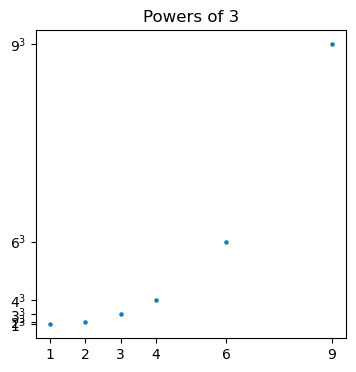

In [112]:
def PlotPower(x, a):
    y_values = [x_value**a for x_value in x]
    
    fig, ax = subplots(figsize=(4,4))
    ax.scatter(x, y_values, s=5)
    ax.set_title(f"Powers of {a}")
    
    # Set x-axis tick values and labels
    ax.set_xticks(x)
    ax.set_xticklabels(x)
    if max(y_values) > 1000:
        ax.set_yscale('log')
    ax.set_yticks([x_value**a for x_value in x])
    ax.set_yticklabels([f"${x_value}^{a}$" for x_value in x])

    
    return fig, ax


test_x = [1, 2, 3, 4, 6, 9]
#test_x = [2, 3, 6, 9, 15]
PlotPower(test_x, 3);

## Exercise 16<a name="4,16"></a>
Back to [ToC](#toc)

Using the Boston data set, fit classification models in order to predict whether a given suburb has a crime rate above or below the median. Explore logistic regression, LDA, naive Bayes, and KNN models using various subsets of the predictors. Describe your findings.  
Hint: You will have to create the response variable yourself, using the variables that are contained in the Boston data set.

In [34]:
lda = LDA(store_covariance=True)
qda = QDA(store_covariance=True)
NB = GaussianNB()

In [35]:
Boston = load_data('Boston')
median_crim = Boston.crim.median()
crim_categorical = np.where(Boston['crim'] > median_crim, 1, 0)
Boston['crim_categorical'] = crim_categorical

list1 = ['nox', 'dis', 'rad', 'lstat', 'medv']
list2 = ['indus', 'age', 'dis', 'rad', 'tax']
list3 = Boston.columns.drop(['crim', 'crim_categorical']).tolist()

(X_train, X_test, y_train, y_test) = train_test_split(Boston[list3], 
                                                      Boston.crim_categorical, 
                                                      test_size=(round(len(Boston.crim_categorical)/3)), 
                                                      random_state=0)
# checking significance
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
results_glm = sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()
print(summarize(results_glm))

# accuracy of models
# logit
probs = results_glm.predict(exog=X_test)
pred_glm = (probs > 0.5).astype(int)
print(f"Test error rate for logistic regression: {np.mean(pred_glm != y_test):.3%}")

# LDA, QDA, NB
X_train = X_train.drop(columns=['const'])
X_test = X_test.drop(columns=['const'])
for model in [lda, qda, NB]:
    pred = model.fit(X_train, y_train).predict(X_test)
    print(f"Test error rate for {model.__class__.__name__}: {np.mean(y_test != pred):.3%}")

# KNN
min_error = float('inf')
best_K = 0

for K in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn_pred = knn.fit(X_train, y_train).predict(X_test)
    test_error = np.mean(knn_pred != y_test)
    
    if test_error < min_error:
        min_error = test_error
        best_K = K

print(f"Best K: {best_K}, Test Error: {min_error:.3%}")

            coef  std err      z  P>|z|
const   -41.9576    8.095 -5.183  0.000
zn       -0.0764    0.045 -1.712  0.087
indus    -0.0975    0.056 -1.735  0.083
chas      1.1288    0.863  1.308  0.191
nox      51.6518    9.852  5.243  0.000
rm       -0.1632    0.838 -0.195  0.846
age       0.0293    0.016  1.858  0.063
dis       0.6815    0.292  2.330  0.020
rad       0.5432    0.191  2.849  0.004
tax      -0.0058    0.003 -1.808  0.071
ptratio   0.2836    0.157  1.810  0.070
lstat     0.1307    0.060  2.177  0.029
medv      0.1690    0.085  1.997  0.046
Test error rate for logistic regression: 10.059%
Test error rate for LinearDiscriminantAnalysis: 15.385%
Test error rate for QuadraticDiscriminantAnalysis: 12.426%
Test error rate for GaussianNB: 18.343%
Best K: 1, Test Error: 6.509%


# Chapter 5 "Resampling Methods"<a name="5"></a>
Back to [ToC](#toc)

In [36]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

from ISLP import load_data
from ISLP.models import summarize

from matplotlib.pyplot import subplots

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import (cross_validate, KFold)
from sklearn.utils import resample


## Exercise 5<a name="5,5"></a>
Back to [ToC](#toc)

In Chapter 4, we used logistic regression to predict the probability of default using income and balance on the Default data set. We will now estimate the test error of this logistic regression model using the validation set approach. Do not forget to set a random seed before beginning your analysis.  
(a) Fit a logistic regression model that uses income and balance to predict default.  
(b) Using the validation set approach, estimate the test error of this model. In order to do this, you must perform the following steps:  
i. Split the sample set into a training set and a validation set.  
ii. Fit a multiple logistic regression model using only the train-
ing observations.  
iii. Obtain a prediction of default status for each individual in
the validation set by computing the posterior probability of default for that individual, and classifying the individual to the default category if the posterior probability is greater than 0.5.  
iv. Compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.  
(c) Repeat the process in (b) three times, using three different splits of the observations into a training set and a validation set. Com- ment on the results obtained.  
(d) Now consider a logistic regression model that predicts the prob- ability of default using income, balance, and a dummy variable for student. Estimate the test error for this model using the val- idation set approach. Comment on whether or not including a dummy variable for student leads to a reduction in the test error rate.

In [46]:
Default = load_data('Default') 
y = Default['default'] == "Yes"
X = Default[['balance', 'income']]

X = sm.add_constant(X)

results = sm.GLM(y, X, family=sm.families.Binomial()).fit()
summarize(results)


coef   std err       z  P>|z|
const   -11.540500  0.435000 -26.544    0.0
balance   0.005600  0.000000  24.835    0.0
income    0.000021  0.000005   4.174    0.0

In [47]:
for random in [0, 17, 137, 1773, 8645]:
    (X_train, X_test, y_train, y_test) = train_test_split(Default[['balance', 'income']], 
                                                          y, # from the cell above !!!
                                                          test_size=(round(len(Default.default)/2)), 
                                                          random_state=random)
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)
    results_validation = sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()
    
    probs_validation = results_validation.predict(exog=X_test)
    pred_validation = (probs_validation > 0.5).astype(int)
    print(f"Test error rate logit, seed = {random}: {np.mean(pred_validation != y_test):.3%}")

Test error rate logit, seed = 0: 2.900%
Test error rate logit, seed = 17: 2.480%
Test error rate logit, seed = 137: 2.600%
Test error rate logit, seed = 1773: 2.380%
Test error rate logit, seed = 8645: 2.660%


In [48]:

student_dummies = pd.get_dummies(Default['student'], drop_first=True)
X_dummy = pd.concat([Default[['balance', 'income']], student_dummies], axis=1)

X_dummy = X.rename(columns={'Yes': 'student_dummy'})


In [49]:
for random in [0, 17, 137, 1773, 8645]:
    (X_train, X_test, y_train, y_test) = train_test_split(X_dummy, 
                                                          y,
                                                          test_size=(round(len(Default.default)/2)), 
                                                          random_state=random)
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)
    results_validation_dummy = sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()
    
    probs_validation_dummy = results_validation_dummy.predict(exog=X_test)
    pred_validation_dummy = (probs_validation_dummy > 0.5).astype(int)
    print(f"Test error rate logit, seed = {random}: {np.mean(pred_validation_dummy != y_test):.3%}")

Test error rate logit, seed = 0: 2.900%
Test error rate logit, seed = 17: 2.480%
Test error rate logit, seed = 137: 2.600%
Test error rate logit, seed = 1773: 2.380%
Test error rate logit, seed = 8645: 2.660%


## Exercise 6<a name="5,6"></a>
Back to [ToC](#toc)

We continue to consider the use of a logistic regression model to predict the probability of default using income and balance on the Default data set. In particular, we will now compute estimates for the standard errors of the income and balance logistic regression coeffi- cients in two different ways: (1) using the bootstrap, and (2) using the standard formula for computing the standard errors in the sm.GLM() function. Do not forget to set a random seed before beginning your analysis.  
(a) Using the summarize() and sm.GLM() functions, determine the estimated standard errors for the coefficients associated with income and balance in a multiple logistic regression model that uses both predictors.  
(b) Write a function, boot_fn(), that takes as input the Default data set as well as an index of the observations, and that outputs the coefficient estimates for income and balance in the multiple logistic regression model.  
(c) Following the bootstrap example in the lab, use your boot_fn() function to estimate the standard errors of the logistic regression coefficients for income and balance.  
(d) Comment on the estimated standard errors obtained using the sm.GLM() function and using the bootstrap.

In [50]:
summarize(results)['std err']


const      0.435000
balance    0.000000
income     0.000005
Name: std err, dtype: float64

In [51]:
# takes maybe 20 seconds to run

def boot_fn(default, idx):
    default_ = default.loc[idx]
    y_ = default_['default'] == "Yes"
    X_ = sm.add_constant(default_[['balance', 'income']])
    return sm.GLM(y_, X_, family=sm.families.Binomial()).fit().params

def boot_SE(func, D, n=None, B=1000, seed=0):
    rng = np.random.default_rng(seed)
    first_, second_ = 0, 0
    n = n or D.shape[0]
    for _ in range(B):
        idx = rng.choice(D.index, n, replace=True)
        value = func(D, idx)
        first_ += value
        second_ += value**2
    return np.sqrt(second_ / B - (first_ / B)**2)

default_se = boot_SE(boot_fn, Default, B=1000, seed=10)
default_se

const      0.425280
balance    0.000227
income     0.000005
dtype: float64

## Exercise 7<a name="5,7"></a>
Back to [ToC](#toc)

In Sections 5.1.2 and 5.1.3, we saw that the cross_validate() function can be used in order to compute the LOOCV test error estimate. Alternatively, one could compute those quantities using just sm.GLM() and the predict() method of the fitted model within a for loop. You will now take this approach in order to compute the LOOCV error for a simple logistic regression model on the Weekly data set. Recall that in the context of classification problems, the LOOCV error is given in (5.4).  
(a) Fit a logistic regression model that predicts Direction using Lag1 and Lag2.  
(b) Fit a logistic regression model that predicts Direction using Lag1 and Lag2 using all but the first observation.  
(c) Use the model from (b) to predict the direction of the first obser- vation. You can do this by predicting that the first observation will go up if P (Direction = "Up"|Lag1, Lag2) > 0.5. Was this observation correctly classified?  
(d) Write a for loop from i=1 to i=n, where n is the number of observations in the data set, that performs each of the following steps:  
i. Fit a logistic regression model using all but the ith obser- vation to predict Direction using Lag1 and Lag2.  
ii. Compute the posterior probability of the market moving up for the ith observation.  
iii. Use the posterior probability for the ith observation in order to predict whether or not the market moves up.  
iv. Determine whether or not an error was made in predicting the direction for the ith observation. If an error was made, then indicate this as a 1, and otherwise indicate it as a 0.  
(e) Take the average of the n numbers obtained in (d)iv in order to obtain the LOOCV estimate for the test error. Comment on the results.

In [52]:
Weekly = load_data('Weekly')
Weekly[:3]

Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
0  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down
1  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down
2  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up

In [53]:
y = Weekly['Direction'] == "Up"
X = Weekly[['Lag1', 'Lag2']]
results = sm.GLM(y[1:], X[1:], family=sm.families.Binomial()).fit()

lag1 = Weekly.loc[0, 'Lag1']
lag2 = Weekly.loc[0, 'Lag2']

prediction = results.predict([lag1, lag2])
print(prediction)
print(y[0])

if (prediction > 0.5) != y[0]:
    print('yes')

[0.51982198]
False
yes


We'd predict it goes up, but actually it goes down (False here means != "Up").

In [54]:
num_err = 0
for i in range(len(Weekly)):
    results = sm.GLM(y.drop(index=[i]), X.drop(index=[i]), family=sm.families.Binomial()).fit()
    lag1 = Weekly.loc[i, 'Lag1']
    lag2 = Weekly.loc[i, 'Lag2']
    
    prediction = results.predict([[lag1, lag2]])

    if (prediction > 0.5) != y[i]:
        num_err += 1

print(num_err / len(Weekly))

0.46464646464646464


A little better than chance. But for financial data probably enormous.

## Exercise 8<a name="5,8"></a>
Back to [ToC](#toc)

We will now perform cross-validation on a simulated data set.  
(a) Generate a simulated data set as below.
In this data set, what is n and what is p? Write out the model used to generate the data in equation form.  
(b) Create a scatterplot of X against Y . Comment on what you find.  
(c) Set a random seed, and then compute the LOOCV errors that
result from fitting the following four models using least squares:  
i. $Y = β_0 + β_1X + ε$  
ii. $Y =β_0 +β_1X+β_2X^2 +ε$  
iii. $Y =β_0 +β_1X+β_2X^2 +β_3X^3 +ε$  
iv. $Y =β_0 +β_1X+β_2X^2 +β_3X^3 +β_4X^4 +ε$.  
Note you may find it helpful to use the data.frame() function to create a single data set containing both X and Y .  
(d) Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?  
(e) Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.  
(f) Comment on the statistical significance of the coefficient esti- mates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

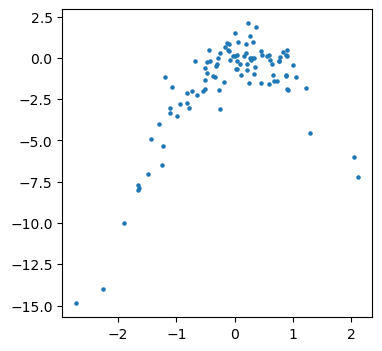

In [55]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

fig, ax = subplots(figsize=(4, 4))
ax.scatter(x, y, s=5);

In [56]:
cv_error = np.zeros(4)
model = LinearRegression()

cv = KFold(n_splits=100, random_state=137, shuffle=True)

for i, d in enumerate(range(1,5)):
    X = np.power.outer(x, np.arange(1, d+1))
    M_CV = cross_validate(model, X, y, cv=cv, scoring='neg_mean_squared_error', return_estimator=True)
    print(f"Degree {d}, error: {-np.mean(M_CV['test_score']):.3f}")

Degree 1, error: 6.633
Degree 2, error: 1.123
Degree 3, error: 1.302
Degree 4, error: 1.332


Exactly the same since there is no indeterminacy in LOOCV. The Quadratic model has the smallest error rate; makes sense since the real data only have a quadratic term as their highest exponent.

In [57]:
results_list = []

for d in range(1, 5):
    X_poly = np.power.outer(x, np.arange(1, d+1))
    results = sm.OLS(y, X_poly).fit()
    results_list.append(results)

for result in results_list:
    print(summarize(result))

     coef  std err      t  P>|t|
x1  2.097    0.334  6.284    0.0
      coef  std err       t  P>|t|
x1  0.9571    0.125   7.653    0.0
x2 -2.0341    0.077 -26.484    0.0
      coef  std err       t  P>|t|
x1  1.1155    0.187   5.975  0.000
x2 -2.0721    0.084 -24.779  0.000
x3 -0.0678    0.059  -1.141  0.257
      coef  std err       t  P>|t|
x1  0.9377    0.199   4.704  0.000
x2 -2.3986    0.167 -14.371  0.000
x3  0.0224    0.071   0.317  0.752
x4  0.0873    0.039   2.245  0.027


## Exercise 9<a name="5,9"></a>
Back to [ToC](#toc)

We will now consider the Boston housing data set, from the ISLP library.  
(a) Based on this data set, provide an estimate for the population mean of medv. Call this estimate $\hat{\mu}$.  
(b) Provide an estimate of the standard error of $\hat{\mu}$. Interpret this result.  
*Hint: We can compute the standard error of the sample mean by dividing the sample standard deviation by the square root of the number of observations.*  


(c) Now estimate the standard error of $\hat{\mu}$ using the bootstrap. How does this compare to your answer from (b)?  
(d) Based on your bootstrap estimate from (c), provide a 95 % con- fidence interval for the mean of medv. Compare it to the results obtained by using `Boston['medv'].std()` and the two standard error rule (3.9).  
*Hint: You can approximate a 95 % confidence interval using the formula \[$\hat{\mu}$ − 2SE($\hat{\mu}$), $\hat{\mu}$ + 2SE($\hat{\mu}$)].*  

(e) Based on this data set, provide an estimate, $\hat{\mu}_{med}$, for the *median* value of medv in the population.  
(f) We now would like to estimate the standard error of $\hat{\mu}_{med}$. Unfor- tunately, there is no simple formula for computing the standard error of the median. Instead, estimate the standard error of the median using the bootstrap. Comment on your findings.  

(g) Based on this data set, provide an estimate for the tenth per- centile of medv in Boston census tracts. Call this quantity $\hat{\mu}_{0.1}$. (You can use the `np.percentile()` function.)  
(h) Use the bootstrap to estimate the standard error of $\hat{\mu}_{0.1}$. Comment on your findings.

In [58]:
Boston = load_data('Boston')

mu_hat = Boston['medv'].mean()
SE_mu_hat = Boston['medv'].std() / np.sqrt(len(Boston))
median_hat = Boston['medv'].median()
tenthpct_hat = np.percentile(Boston['medv'], 10)

print(f"est. population mean: {mu_hat:.3f}")
print(f"est. SE for population mean: {SE_mu_hat:.3f}")
print(f"est. population median: {median_hat:.3f}")
print(f"est. 10th percentile in pop.: {tenthpct_hat:.3f}")

est. population mean: 22.533
est. SE for population mean: 0.409
est. population median: 21.200
est. 10th percentile in pop.: 12.750


In [59]:
num_bootstraps = 1000
bootstrap_means = np.zeros(num_bootstraps)

for i in range(num_bootstraps):
    bootstrap_sample_mean = resample(Boston['medv'], replace=True, random_state=i+1)
    bootstrap_means[i] = np.mean(bootstrap_sample_mean)

bootstrap_SE = np.std(bootstrap_means)

print(f"SE of the mean: {bootstrap_SE:.3f}")
print(f"CI: [{mu_hat - 2*bootstrap_SE:.3f}, {mu_hat + 2*bootstrap_SE:.3f}]")


SE of the mean: 0.426
CI: [21.680, 23.385]


In [60]:
bootstrap_medians = np.zeros(num_bootstraps)

for j in range(num_bootstraps):
    bootstrap_sample_median = resample(Boston['medv'], replace=True, random_state=j+13)
    bootstrap_medians[j] = np.median(bootstrap_sample_median)

bootstrap_SE = np.std(bootstrap_medians)

print(f"SE of the median: {bootstrap_SE:.3f}")

SE of the median: 0.390


In [61]:
bootstrap_percentile = np.zeros(num_bootstraps)

for k in range(num_bootstraps):
    bootstrap_sample_percentile = resample(Boston['medv'], replace=True, random_state=k+137)
    bootstrap_percentile[k] = np.percentile(bootstrap_sample_percentile, 10)

bootstrap_SE = np.std(bootstrap_percentile)

print(f"SE of the 10th percentile: {bootstrap_SE:.3f}")

SE of the 10th percentile: 0.498


# Chapter 6 "Linear Model Selection and Regularization"<a name="6"></a>
Back to [ToC](#toc)

In [37]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm

from ISLP import load_data
from ISLP.models import ModelSpec as MS

import sklearn.linear_model as skl
import sklearn.model_selection as skm
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


## Exercise 8<a name="6,8"></a>
Back to [ToC](#toc)

(Forward/Backward selection is apparently bad practice!! Skipping directly to (e))

In this exercise, we will generate simulated data, and will then use this data to perform forward and backward stepwise selection.  
(a) Create a random number generator and use its `normal()` method to generate a predictor $X$ of length $n = 100$, as well as a noise vector $ε$ of length $n = 100$.  
(b) Generate a response vector Y of length n = 100 according to the model  
$Y =β_0 +β_1X+β_2X^2 +β_3X^3 +ε$, where β0, β1, β2, and β3 are constants of your choice.  
(c) Use forward stepwise selection in order to select a model contain- ing the predictors $X, X^2, . . . , X^{10}$. What is the model obtained according to $C_p$? Report the coefficients of the model obtained.  
(d) Repeat (c), using backwards stepwise selection. How does your answer compare to the results in (c)?   

(e) Now fit a lasso model to the simulated data, again using $X,X^2, . . . , X^{10}$ as predictors. Use cross-validation to select the optimal value of $λ$. Create plots of the cross-validation error as a function of $λ$. Report the resulting coefficient estimates, and discuss the results obtained.  
(f) Now generate a response vector $Y$ according to the model $Y = β_0 + β_7X^7 + ε$,
and perform forward stepwise selection and the lasso. Discuss the results obtained.

In [32]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
eps = rng.normal(size=100)
Y = 2 * x + 3 * x**2 + 4 * x**3 + eps
X = np.column_stack([x**i for i in range(1, 11)])

lassoCV = skl.ElasticNetCV(n_alphas=100, 
                           l1_ratio=1,
                           cv=5)
pipeCV = Pipeline(steps=[('scaler', StandardScaler()),
                         ('lasso', lassoCV)])
pipeCV.fit(X, Y)
tuned_lasso = pipeCV.named_steps['lasso']
tuned_lasso.alpha_, tuned_lasso.coef_


(0.015574009844667851,
 array([ 1.5359572 ,  3.25751241, 11.80707954,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.        ,  0.52937358]))

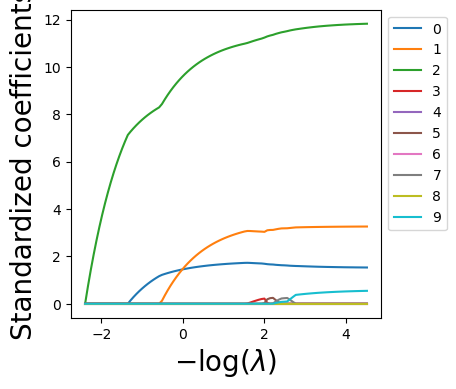

In [33]:
Xs = StandardScaler().fit_transform(X)

lambdas, soln_array = skl.ElasticNet.path(Xs, 
                                    Y,
                                    l1_ratio=1,
                                    n_alphas=100)[:2]
soln_path = pd.DataFrame(soln_array.T,
                         index=-np.log(lambdas))

path_fig, ax = subplots(figsize=(4,4))
soln_path.plot(ax=ax, legend=False)
ax.legend(loc='upper left')
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficients', fontsize=20);
ax.legend(loc='upper left', bbox_to_anchor=(1, 1));


Unsurprisingly, the coefficient before the highest polynomial term is the largest, the one before the second highest is the second largest, and the one before the lowest is the smallest (detects the $X^{10}$ too for some reason?). Also the MSE goes to essentially 0 once a cubic term is included, since that is what is happening in reality.

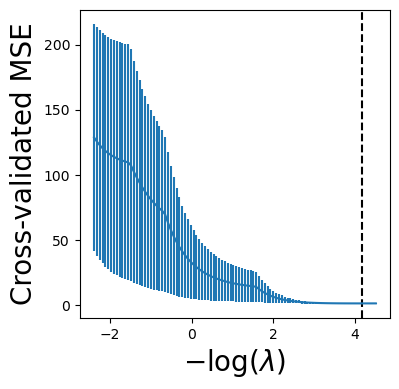

In [34]:
lassoCV_fig, ax = subplots(figsize=(4,4))
ax.errorbar(-np.log(tuned_lasso.alphas_),
            tuned_lasso.mse_path_.mean(1),
            yerr=tuned_lasso.mse_path_.std(1) / np.sqrt(5))
ax.axvline(-np.log(tuned_lasso.alpha_), c='k', ls='--')
#ax.set_ylim([50000,250000])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

In [35]:
K = 5
kfold = skm.KFold(K,
                  random_state=0,
                  shuffle=True)

Y_f = 5 + 7 * x**7 + eps
lassoCV_f = skl.ElasticNetCV(n_alphas=100, 
                           l1_ratio=1,
                            cv=kfold)
pipeCV_f = Pipeline(steps=[('scaler', StandardScaler()),
                         ('lasso', lassoCV_f)])
pipeCV_f.fit(Xs, Y_f)
tuned_lasso_f = pipeCV_f.named_steps['lasso']
tuned_lasso_f.alpha_, tuned_lasso_f.coef_

(0.7975887733191966,
 array([ -3.43534111,   0.        ,   0.        ,  -0.        ,
        124.54300865,  -0.        , 497.48222352,  -0.        ,
        180.20903429,  -0.        ]))

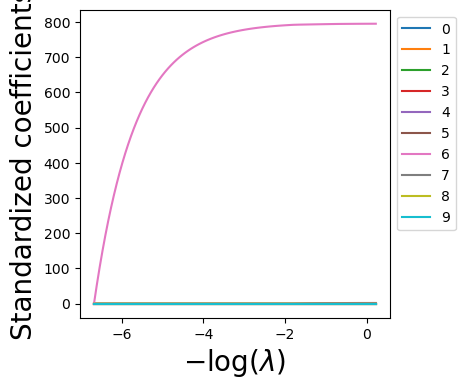

In [36]:
lambdas, soln_array = skl.ElasticNet.path(Xs, 
                                    Y_f,
                                    l1_ratio=1,
                                    n_alphas=100)[:2]
soln_path = pd.DataFrame(soln_array.T,
                         index=-np.log(lambdas))

path_fig, ax = subplots(figsize=(4,4))
soln_path.plot(ax=ax, legend=False)
ax.legend(loc='upper left')
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficients', fontsize=20);
ax.legend(loc='upper left', bbox_to_anchor=(1, 1));


In [37]:
soln_path

0    1    2    3         4         5           6    7         8  \
-6.681593  0.0 -0.0  0.0 -0.0  0.000000 -0.000000    0.000000 -0.0  0.000000   
-6.611818  0.0 -0.0  0.0 -0.0  0.000000 -0.000000   53.754814 -0.0  0.000000   
-6.542043  0.0 -0.0  0.0 -0.0  0.000000 -0.000000  103.886733 -0.0  0.000000   
-6.472267  0.0 -0.0  0.0 -0.0  0.000000 -0.000000  150.639929 -0.0  0.000000   
-6.402492  0.0 -0.0  0.0 -0.0  0.000000 -0.000000  194.242116 -0.0  0.000000   
...        ...  ...  ...  ...       ...       ...         ...  ...       ...   
-0.052939  0.0 -0.0  0.0 -0.0  1.961207 -0.036967  794.547107 -0.0  0.040727   
 0.016836  0.0 -0.0  0.0 -0.0  1.971827 -0.057575  794.581280 -0.0  0.049044   
 0.086612  0.0 -0.0  0.0 -0.0  1.979842 -0.079462  794.612070 -0.0  0.057234   
 0.156387  0.0 -0.0  0.0 -0.0  1.985780 -0.101694  794.640251 -0.0  0.065202   
 0.226162  0.0 -0.0  0.0 -0.0  1.990037 -0.123647  794.666381 -0.0  0.072888   

             9  
-6.681593 -0.0  
-6.611818 -0.0  
-6.542043 -0.0  
-6.472267 -0.0  
-6.402492 -0.0  
...        ...  
-0.052939 -0.0  
 0.016836 -0.0  
 0.086612 -0.0  
 0.156387 -0.0  
 0.226162 -0.0  

[100 rows x 10 columns]

Can't explain thsi discrepancy??

## Exercise 9<a name="6,9"></a>
Back to [ToC](#toc)

In this exercise, we will predict the number of applications received using the other variables in the College data set.  
(a) Split the data set into a training set and a test set.  
(b) Fit a linear model using least squares on the training set, and report the test error obtained.  
(c) Fit a ridge regression model on the training set, with $λ$ chosen by cross-validation. Report the test error obtained.  
(d) Fit a lasso model on the training set, with $λ$ chosen by cross- validation. Report the test error obtained, along with the num- ber of non-zero coefficient estimates.  
(e) Fit a PCR model on the training set, with $M$ chosen by cross- validation. Report the test error obtained, along with the value of $M$ selected by cross-validation.  
(f) Fit a PLS model on the training set, with $M$ chosen by cross- validation. Report the test error obtained, along with the value of $M$ selected by cross-validation.  
(g) Comment on the results obtained. How accurately can we pre- dict the number of college applications received? Is there much difference among the test errors resulting from these five ap- proaches?

In [90]:
College = load_data('College')
Y = College['Apps']
X = MS(College.drop(columns=['Apps'])).fit_transform(College)
X = pd.get_dummies(X, columns=['Private'], drop_first=True).rename(columns={'Private_Yes':'Private'})

X_train, X_test, Y_train, Y_test = skm.train_test_split(X, Y, test_size=0.5, random_state=42)


In [91]:
model = sm.OLS(Y_train, X_train).fit()
predictions = model.predict(exog=X_test)

np.mean((Y_test - predictions)**2)

1654196.5091456852

In [92]:
alphas = 10**np.linspace(8, -2, num=100) / Y.std()

scaler = StandardScaler()
ridgeCV = skl.ElasticNetCV(l1_ratio=0.02, cv=5, alphas=alphas)
#ridgeCV = skl.RidgeCV(alphas=alphas, cv=5, scoring='neg_mean_squared_error')
pipe_ridge = Pipeline(steps=[('scaler', scaler), ('ridge', ridgeCV)])
pipe_ridge.fit(X_train, Y_train)
predictions_ridge = pipe_ridge.predict(X_test)

mean_squared_error(Y_test, predictions_ridge)

1663321.3912054996

1663512.031... when l1_ratio = 0  
1662216.464... when using `skl.RidgeCV()`

In [93]:
(1663512.031-1662216.464)/1662216.464

0.0007794213497815764

In [67]:
#lassoCV = skl.ElasticNetCV(l1_ratio=1, cv=5)
lassoCV = skl.LassoCV()
pipe_lasso = Pipeline(steps=[('scaler', scaler), ('lasso', lassoCV)])
pipe_lasso.fit(X_train, Y_train)
predictions_lasso = pipe_lasso.predict(X_test)

mean_squared_error(Y_test, predictions_lasso)


1681274.0812902139

Same result for both

In [68]:
num_nonzero = 0
for coef in pipe_lasso.named_steps['lasso'].coef_:
    if coef != 0:
        num_nonzero += 1
print(f"Number of non-zero coefficients: {num_nonzero} (out of {len(pipe_lasso.named_steps['lasso'].coef_)})")

Number of non-zero coefficients: 14 (out of 18)


In [69]:
pca = PCA()
linreg = skl.LinearRegression()
pipe_pca = Pipeline([('scaler', scaler), ('pca', pca), ('linreg', linreg)])
param_grid = {'pca__n_components': range(1, 19)}

grid = skm.GridSearchCV(pipe_pca, param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, Y_train)

predictions_pca = grid.predict(X_test)
print("Optimal number of principal components:", grid.best_params_['pca__n_components'])
mean_squared_error(Y_test, predictions_pca)

Optimal number of principal components: 17


1654196.5091456757

OLS is best. Doing PCR just spits out the OLS results again and OLS has the smallest MSE.

Skip

## Exercise 11<a name="6,11"></a>
Back to [ToC](#toc)

We will now try to predict per capita crime rate in the Boston data set.  
(a) Try out some of the regression methods explored in this chapter, such as best subset selection, the lasso, ridge regression, and PCR. Present and discuss results for the approaches that you consider.  
(b) Propose a model (or set of models) that seem to perform well on this data set, and justify your answer. Make sure that you are evaluating model performance using validation set error, cross- validation, or some other reasonable alternative, as opposed to using training error.  
(c) Does your chosen model involve all of the features in the data set? Why or why not?

In [85]:
Boston = load_data('Boston')
Boston.head()
Y = Boston['crim']
X = sm.add_constant(Boston.drop(columns=['crim']))


In [86]:
cv_OLS = skm.cross_validate(skl.LinearRegression(), X, Y, cv=5, scoring='neg_mean_squared_error')
cv_err_OLS = -np.mean(cv_OLS['test_score'])
cv_err_OLS

47.27480731016546

In [87]:
X_train, X_test, Y_train, Y_test = skm.train_test_split(X, Y, test_size=0.5, random_state=42)

pipe_linreg = Pipeline([('scaler', scaler), ('OLS', skl.LinearRegression())])
param_grid_ = {'pca__n_components': range(1, len(X.columns))}
grid_ = skm.GridSearchCV(pipe_pca, param_grid_, cv=5, scoring='neg_mean_squared_error')

pipe_ridge.fit(X_train, Y_train)
pipe_lasso.fit(X_train, Y_train)
grid_.fit(X_train, Y_train)
pipe_linreg.fit(X_train, Y_train)

for model, name in zip([pipe_ridge, pipe_lasso, grid, pipe_linreg], ['ridge','lasso', 'PCA','OLS']):
    predictions_model = model.predict(X_test)
    print(f"{name} MSE: {mean_squared_error(Y_test, predictions_model)}")
print("Optimal number of principal components:", grid.best_params_['pca__n_components'])


ridge MSE: 45.77921560085537
lasso MSE: 47.483331829190256
PCA MSE: 45.41579026375407
OLS MSE: 45.415790263754054
Optimal number of principal components: 12


Ridge:  
45.869 if l1_ratio = 0 exactly  
45.858 l1_ratio=0.02  
45.779 RidgeCV  

OLS is still best.

In [89]:
(45.869-45.779)/45.779

0.001965966928067374

In [79]:
# This is actually the training error!

np.max(grid_.cv_results_['mean_test_score'])

-42.05126017292012

# Chapter 7 "Moving Beyond Linearity"<a name="7"></a>
Back to [ToC](#toc)

In [87]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import summarize
from ISLP.pygam import plot as plot_gam

from pygam import LinearGAM, s, f, l

from sklearn.preprocessing import PolynomialFeatures
import sklearn.model_selection as skm
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from scipy.interpolate import LSQUnivariateSpline

## Exercise 6<a name="7,6"></a>
Back to [ToC](#toc)

In this exercise, you will further analyze the `Wage` data set considered throughout this chapter.  
(a) Perform *polynomial regression* to predict `wage` using `age`. Use cross-validation to select the optimal degree $d$ for the polynomial. What degree was chosen, and how does this compare to the results of hypothesis testing using ANOVA? Make a plot of the resulting polynomial fit to the data.  
(b) Fit a *step function* to predict `wage` using `age`, and perform cross-validation to choose the optimal number of cuts. Make a plot of the fit obtained.  

In [88]:
Wage = load_data('Wage')
wage = Wage['wage']
age = Wage['age']


In [89]:
age_array = np.asarray(age).reshape(-1, 1)
models_test = [PolynomialFeatures(d).fit_transform(age_array) for d in range(1, 7)]
anova_lm(*[sm.OLS(wage, X_).fit() for X_ in models_test])


df_resid           ssr  df_diff        ss_diff           F        Pr(>F)
0    2998.0  5.022216e+06      0.0            NaN         NaN           NaN
1    2997.0  4.793430e+06      1.0  228786.010128  143.663571  2.285169e-32
2    2996.0  4.777674e+06      1.0   15755.693664    9.893609  1.674794e-03
3    2995.0  4.771604e+06      1.0    6070.152124    3.811683  5.098933e-02
4    2994.0  4.770322e+06      1.0    1282.563017    0.805371  3.695646e-01
5    2993.0  4.766389e+06      1.0    3932.257499    2.469216  1.162015e-01

In [90]:
poly = PolynomialFeatures()
pipe_poly = Pipeline([('poly', poly), ('linreg', LinearRegression())])
param_grid = {'poly__degree': range(1, 7)}

grid_poly = skm.GridSearchCV(pipe_poly, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_poly.fit(age_array, wage)
grid_poly.best_params_['poly__degree']


4

That's line '3' in the ANOVA, so they basically pick the same model. Plot already exists in the Lab, since they used a degree 4 polynomial. But just for completeness' sake:

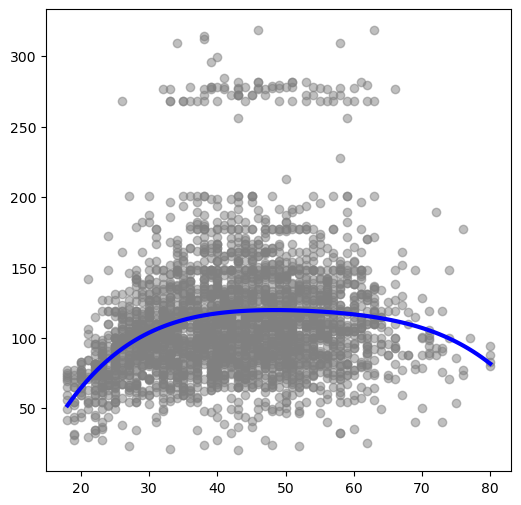

In [172]:
poly_four = PolynomialFeatures(4)
poly_dmatrix = poly_four.fit_transform(age_array)

prediction_ages = pd.DataFrame(np.linspace(age.min(), age.max(), 100))
prediction_dmatrix = poly_four.transform(prediction_ages)

preds = sm.OLS(wage, poly_dmatrix).fit().get_prediction(prediction_dmatrix)

fig, ax = subplots(figsize=(6,6))
ax.scatter(age, wage, facecolor='gray', alpha=0.5)
for val in [preds.predicted_mean]: # list absolutely necessary
    ax.plot(prediction_ages.values, val, 'b' ,linewidth=3)

For-loop, keeping track of MSE and number of best MSE model (so far; if cv_err < cv_err_best ...).  
The number will correspond to number of cuts

qcut() produces the X for cross_validate

In [192]:
num_cuts_best = 0
cv_err_best = np.inf
for num_cuts in range(1, 60):
    cut_age = pd.qcut(age, num_cuts, duplicates='drop')
    X = pd.get_dummies(cut_age)
    cv_results = skm.cross_validate(LinearRegression(), X, wage, cv=5, scoring='neg_mean_squared_error')
    cv_err = -np.mean(cv_results['test_score'])
    if cv_err < cv_err_best:
        cv_err_best = cv_err
        num_cuts_best = num_cuts
print(f"{cv_err_best:.3f}")
print(f"Best number of cuts: {num_cuts_best}")

1604.997
Best number of cuts: 24


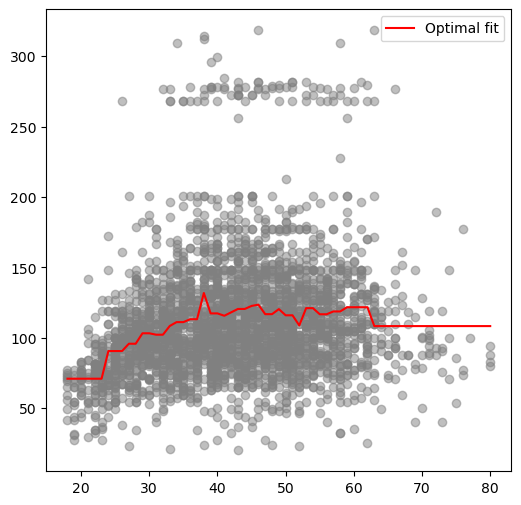

In [205]:
cut_age = pd.qcut(age, q=24)
X = pd.get_dummies(pd.qcut(age, q=24, duplicates='drop'))

# Fit linear regression model
predictions = LinearRegression().fit(X, wage).predict(X)

fig, ax = subplots(figsize=(6,6))
ax.scatter(age, wage, color='gray', alpha=0.5)
ax.plot(age[np.argsort(age)], predictions[np.argsort(age)], color='red', label='Optimal fit')
ax.legend();

## Exercise 7<a name="7,7"></a>
Back to [ToC](#toc)

The Wage data set contains a number of other features not explored in this chapter, such as  
marital status (maritl), job class (jobclass), and others.  
(a) Explore the relationships between some of these other predictors and wage, and use non-linear fitting techniques in order to fit flexible models to the data.  
(b) Create plots of the results obtained, and write a summary of your findings.

In [214]:
Wage.columns

Index(['year', 'age', 'maritl', 'race', 'education', 'region', 'jobclass',
       'health', 'health_ins', 'logwage', 'wage'],
      dtype='object')

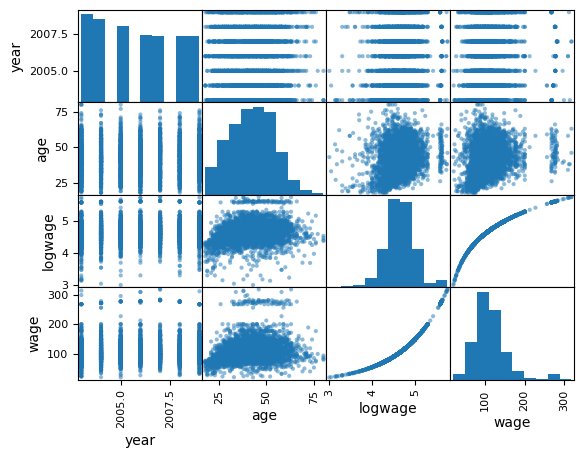

In [218]:
pd.plotting.scatter_matrix(Wage);

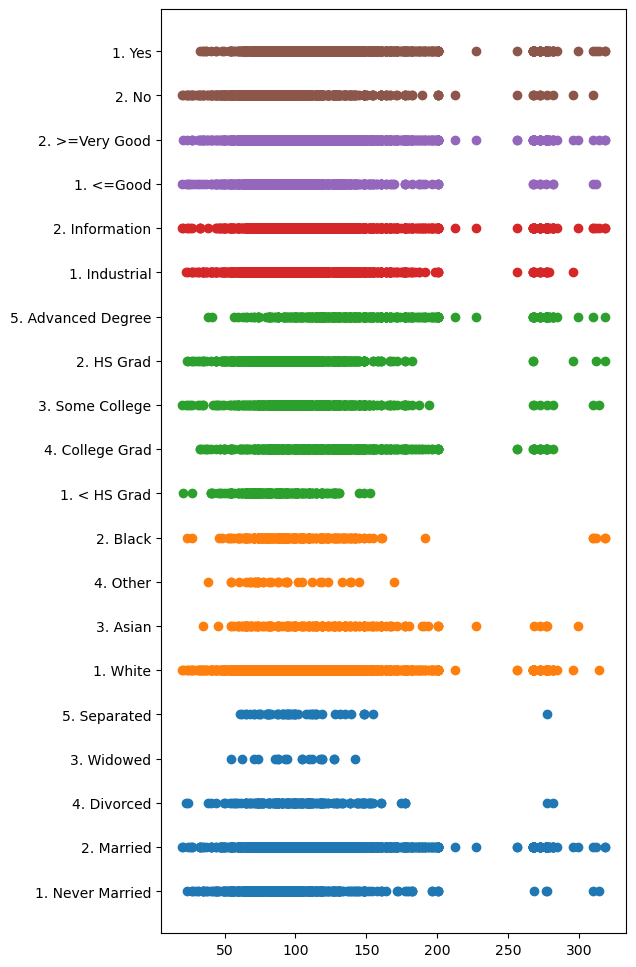

In [235]:
fig, ax = subplots(figsize=(6,12))
for feature in ['maritl', 'race', 'education', 'jobclass', 'health', 'health_ins']:
    ax.scatter(wage, Wage[feature])

In [282]:
Wage['race'] = Wage['race'].astype('category')
Wage['maritl'] = Wage['maritl'].astype('category')

Xgam = np.column_stack([age, Wage['year'], Wage['education'].cat.codes, Wage['race'].cat.codes, Wage['maritl'].cat.codes])
gam_full = LinearGAM(s(0) + s(1) + f(2) + f(3) + f(4))

gam_full = gam_full.gridsearch(Xgam, wage)

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


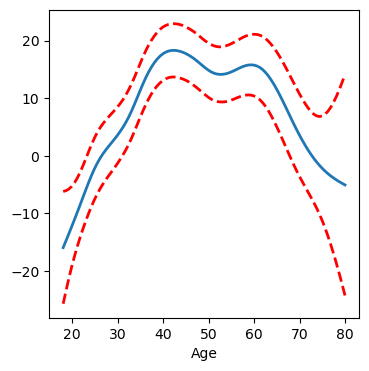

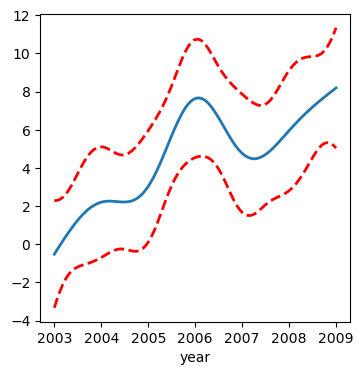

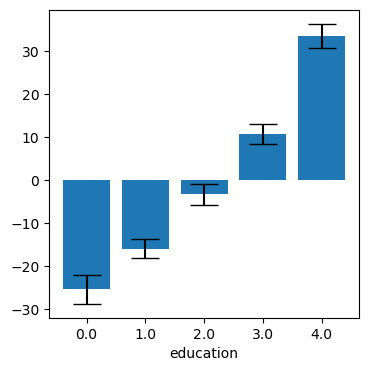

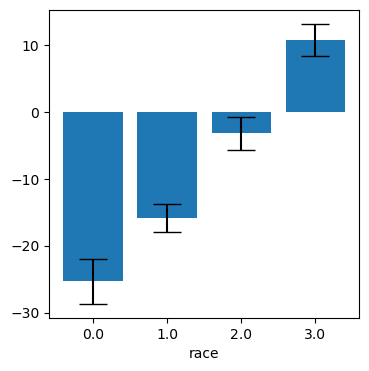

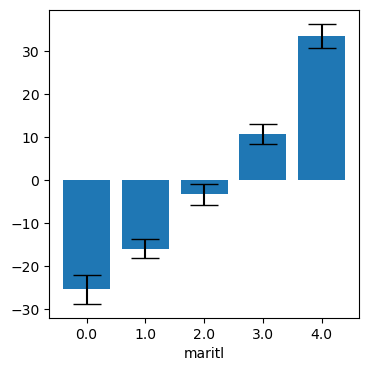

In [293]:
for i, feature in enumerate(['Age', 'year', 'education', 'race', 'maritl']):
    fig, ax = subplots(figsize=(4,4))
    plot_gam(gam_full, i, ax=ax, partial_kwargs={'linewidth': 2}, err_kwargs={'c': 'r', 'linewidth': 2, 'ls': '--'})
    ax.set_xlabel(feature)

## Exercise 8<a name="7,8"></a>
Back to [ToC](#toc)

Fit some of the non-linear models investigated in this chapter to the Auto data set. Is there evidence for non-linear relationships in this data set? Create some informative plots to justify your answer.

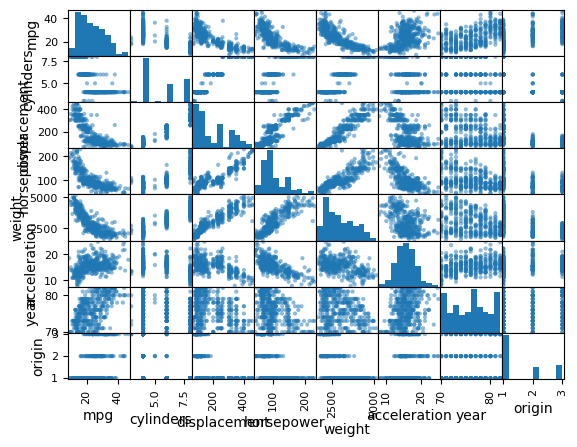

In [296]:
Auto = load_data('Auto')
pd.plotting.scatter_matrix(Auto);

In [303]:
Auto = Auto.dropna()

In [313]:
Xgam_auto = np.column_stack([Auto['year'], Auto['acceleration'], Auto['weight'], Auto['horsepower'], Auto['displacement']])
gam_full = LinearGAM(l(0) + s(1) + s(2) + s(3) + s(4))

gam_full_auto = gam_full.gridsearch(Xgam_auto, Auto['mpg'])

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


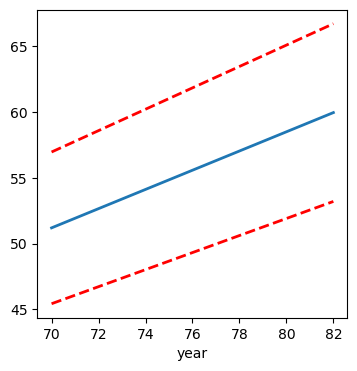

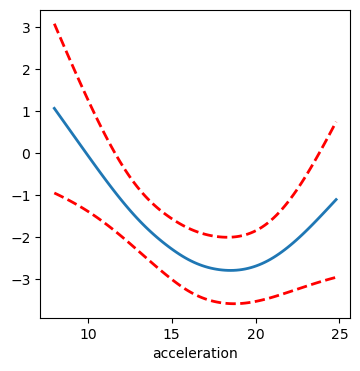

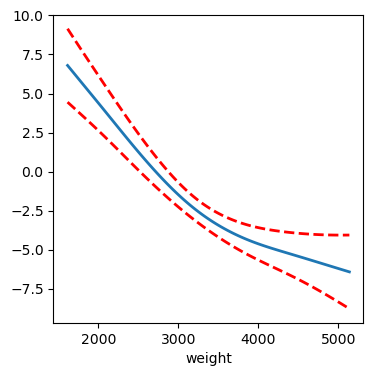

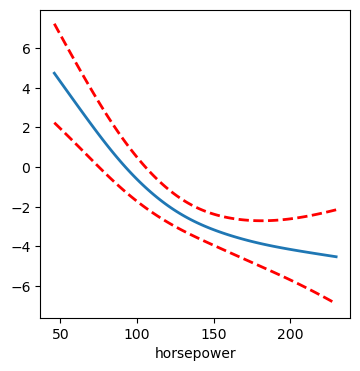

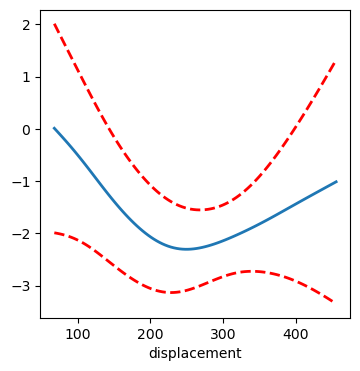

In [314]:
for i, feature in enumerate(['year', 'acceleration', 'weight', 'horsepower', 'displacement']):
    fig, ax = subplots(figsize=(4,4))
    plot_gam(gam_full, i, ax=ax, partial_kwargs={'linewidth': 2}, err_kwargs={'c': 'r', 'linewidth': 2, 'ls': '--'})
    ax.set_xlabel(feature)

## Exercise 9<a name="7,9"></a>
Back to [ToC](#toc)

This question uses the variables `dis` (the weighted mean of distances to five Boston employment centers) and `nox` (nitrogen oxides concen- tration in parts per 10 million) from the `Boston` data. We will treat `dis` as the predictor and `nox` as the response.  
(a) Use the `poly()` function from the `ISLP.models` module to fit a cubic polynomial regression to predict `nox` using `dis`. Report the regression output, and plot the resulting data and polynomial fits.  
(b) Plot the polynomial fits for a range of different polynomial degrees (say, from 1 to 10), and report the associated residual sum of squares.  
(c) Perform cross-validation or another approach to select the opti- mal degree for the polynomial, and explain your results.  

(d) Use the `bs()` function from the `ISLP.models` module to fit a re- gression spline to predict `nox` using `dis`. Report the output for the fit using four degrees of freedom. How did you choose the knots? Plot the resulting fit.  
(e) Now fit a regression spline for a range of degrees of freedom, and plot the resulting fits and report the resulting RSS. Describe the results obtained.  
(f) Perform cross-validation or another approach in order to select the best degrees of freedom for a regression spline on this data. Describe your results.  

In [91]:
Boston = load_data('Boston')
X = np.asarray(Boston['dis']).reshape(-1, 1)
y = Boston['nox']

dmatrix_poly = PolynomialFeatures(3).fit_transform(X)
summarize(sm.OLS(y, dmatrix_poly).fit())

coef  std err       t  P>|t|
const  0.9341    0.021  45.110    0.0
x1    -0.1821    0.015 -12.389    0.0
x2     0.0219    0.003   7.476    0.0
x3    -0.0009    0.000  -5.124    0.0

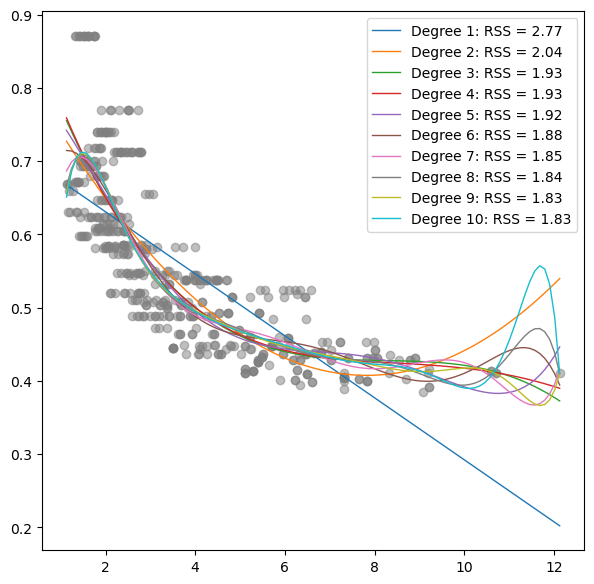

In [96]:
dis_grid = np.linspace(X.min(), X.max(), 100)
dis_df = pd.DataFrame(dis_grid)

fig, ax = subplots(figsize=(7,7))
ax.scatter(X, y, facecolor='gray', alpha=0.5);

for degree in range(1, 11):
    prediction_points = PolynomialFeatures(degree).fit_transform(dis_df)
    dmatrix_poly = PolynomialFeatures(degree).fit_transform(X)
    model = sm.OLS(y, dmatrix_poly).fit()
    RSS = np.sum(np.square(model.resid))
    predictions_dis_poly = model.get_prediction(prediction_points) 
    
    for val in [predictions_dis_poly.predicted_mean]:
        ax.plot(dis_df.values, val,linewidth=1, label=f'Degree {degree}: RSS = {RSS:.2f}')
ax.legend(loc='upper right');

In [95]:
param_grid_Boston = {'poly__degree': range(1, 11)}
grid_poly_Boston = skm.GridSearchCV(pipe_poly, param_grid_Boston, cv=5, scoring='neg_mean_squared_error')
grid_poly_Boston.fit(X, y)
grid_poly_Boston.best_params_['poly__degree']

2

Very counterintuitive from just looking at the data; 3 or 4 degrees look much better to me! But the underlying function is probably quadratic.

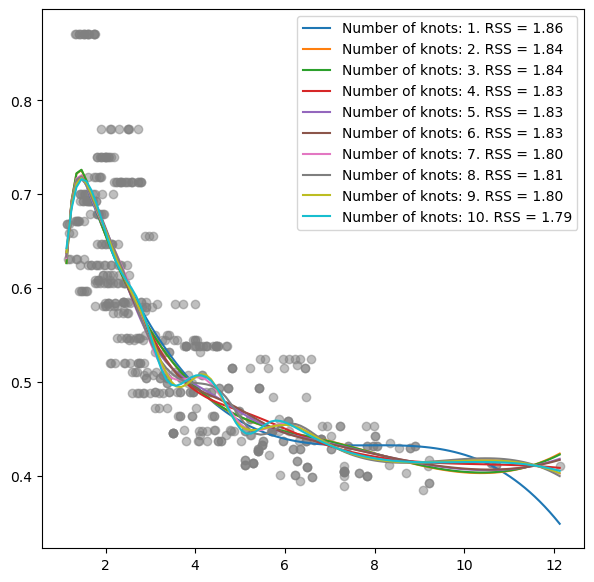

In [360]:
sorted_indices = np.argsort(np.asarray(Boston['dis']))
sorted_X = np.asarray(Boston['dis'])[sorted_indices]
sorted_y = y[sorted_indices]

fig, ax = subplots(figsize=(7,7))
ax.scatter(X, y, facecolor='gray', alpha=0.5);

X_new = np.linspace(sorted_X.min(), sorted_X.max(), 100)
splines = []
for num_knots in range(1, 11):
    knots = np.linspace(np.percentile(sorted_X, 10), np.percentile(sorted_X, 90), num_knots)
    
    spline_Boston = LSQUnivariateSpline(sorted_X, sorted_y, knots)
    splines.append(spline_Boston)

for i, spline in enumerate(splines):
    y_new = spline(X_new)
    residuals = sorted_y - spline(sorted_X)
    rss = np.sum(residuals ** 2)
    ax.plot(X_new, y_new, label=f"Number of knots: {i+1}. RSS = {rss:.2f}")
ax.legend(loc='upper right');


In [505]:
X_train, X_test, y_train, y_test = skm.train_test_split(np.asarray(Boston['dis']), np.asarray(y), test_size=0.5, random_state=42)
sorted_train_indices, sorted_test_indices = np.argsort(X_train), np.argsort(X_test)
sorted_X_train, sorted_y_train = X_train[sorted_train_indices], y_train[sorted_train_indices]
sorted_X_test, sorted_y_test = X_test[sorted_test_indices], y_test[sorted_test_indices]

best_spline = None
best_mse = np.inf

for i, spline in enumerate(splines):
    y_pred = spline(sorted_X_train)
    mse = mean_squared_error(sorted_y_test, y_pred)
    if mse < best_mse:
        best_mse = mse
        best_spline = i
print(best_spline)
print(best_mse)

4
0.003518602031141112


## Exercise 11<a name="7,11"></a>
Back to [ToC](#toc)

In Section 7.7, it was mentioned that GAMs are generally fit using a backfitting approach. The idea behind backfitting is actually quite simple. We will now explore backfitting in the context of multiple linear regression.  
Suppose that we would like to perform multiple linear regression, but we do not have software to do so. Instead, we only have software to perform *simple* linear regression. Therefore, we take the following iterative approach:   
we (1) repeatedly hold all but one coefficient estimate fixed at its current value, and (2) update only that coefficient estimate using a simple linear regression. The process is continued until convergence—that is, until the coefficient estimates stop changing.  
We now try this out on a toy example.  

(a) Generate a response Y and two predictors X1 and X2, with $n = 100$.  
(b) Write a function `simple_reg()` that takes two arguments, `outcome` and `feature`, fits a simple linear regression model with this outcome and feature, and returns the estimated intercept and slope.  
(c) Initialize `beta1` to take on a value of your choice. It does not matter what value you choose.  
(d) Keeping `beta1` fixed, use your function `simple_reg()` to fit the model:  
$Y −beta1·X_1 =β_0 +β_2X_2 +ε$.  
Store the resulting values as `beta0` and `beta2`.  
(e) Keeping beta2 fixed, fit the model  
$Y −beta2·X_2 =β_0 +β_1X_1 +ε$.  
Store the result as `beta0` and `beta1` (overwriting their previous values).  
(f) Write a for loop to repeat (c) and (d) 1,000 times. Report the estimates of `beta0`, `beta1`, and `beta2` at each iteration of the for loop. Create a plot in which each of these values is displayed, with `beta0`, `beta1`, and `beta2`.  
(g) Compare your answer in (e) to the results of simply perform- ing multiple linear regression to predict $Y$ using $X_1$ and $X_2$. Use `axline()` method to overlay those multiple linear regression coefficient estimates on the plot obtained in (e).  
(h) On this data set, how many backfitting iterations were required in order to obtain a “good” approximation to the multiple re- gression coefficient estimates?  

In [480]:
np.random.seed(13)
n = 100
X1 = np.random.normal(loc=0, scale=5, size=n)
X2 = np.random.normal(loc=0, scale=10, size=n)
Y = 7.034 + 2.546*X1 + 3.339*X2 + np.random.normal(loc=0, scale=1, size=n)


In [481]:
def simple_reg(outcome, feature):
    feature = sm.add_constant(feature)
    model = sm.OLS(outcome, feature).fit()
    return model.params


In [482]:
beta1 = 13

beta_list = []
for _ in range(1000):
    betas1 = simple_reg(Y - beta1*X1, X2)
    beta0 = betas1[0]
    beta2 = betas1[1]
    
    betas2 = simple_reg(Y - beta2*X2, X1)
    beta0 = betas2[0]
    beta1 = betas2[1]
    beta_list.append([beta0, beta1, beta2])
beta_list[:15]

[[6.966173202354863, 2.5350826421177928, 3.326356624218695],
 [6.993389233718704, 2.5349820989004352, 3.3450396159008533],
 [6.993389495200686, 2.534982097934452, 3.345039795400416],
 [6.9933894952032, 2.5349820979344426, 3.345039795402141],
 [6.993389495203202, 2.534982097934443, 3.3450397954021414],
 [6.993389495203202, 2.534982097934443, 3.3450397954021414],
 [6.993389495203202, 2.534982097934443, 3.3450397954021414],
 [6.993389495203202, 2.534982097934443, 3.3450397954021414],
 [6.993389495203202, 2.534982097934443, 3.3450397954021414],
 [6.993389495203202, 2.534982097934443, 3.3450397954021414],
 [6.993389495203202, 2.534982097934443, 3.3450397954021414],
 [6.993389495203202, 2.534982097934443, 3.3450397954021414],
 [6.993389495203202, 2.534982097934443, 3.3450397954021414],
 [6.993389495203202, 2.534982097934443, 3.3450397954021414],
 [6.993389495203202, 2.534982097934443, 3.3450397954021414]]

In [503]:
X = sm.add_constant(np.column_stack([X1, X2]))

print(*[round(entry, 3) for entry in beta_list[-1]])
print(*[round(param, 3) for param in sm.OLS(Y, X).fit().params])


6.993 2.535 3.345
6.993 2.535 3.345


# Chapter 8 "Tree-Based Methods"<a name="8"></a>
Back to [ToC](#toc)

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

from ISLP import load_data

from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import sklearn.model_selection as skm

import statsmodels.api as sm

## Exercise 7<a name="8,7"></a>
Back to [ToC](#toc)

In Section 8.3.3, we applied random forests to the Boston data using `max_features = 6` and using `n_estimators = 100` and `n_estimators = 500`. Create a plot displaying the test error resulting from random forests on this data set for a more comprehensive range of values for max_features and n_estimators.

In [108]:
Boston = load_data('Boston')
X = Boston[Boston.columns.drop('medv')]
y = Boston['medv']

X_train, X_test, y_train, y_test = skm.train_test_split(X, y, test_size=0.3, random_state=7)

Cell below takes around 2 minutes to run on my computer.

In [122]:
test_error_paths = []

for num_features in range(1, X_train.shape[1]+1):
    test_error_features = []
    for num_trees in range(1, 1001, 50):
        y_hat = RF(max_features=num_features, n_estimators=num_trees, random_state=0).fit(X_train, y_train).predict(X_test)
        test_error_features.append(np.mean((y_test - y_hat)**2))
    test_error_paths.append(test_error_features)


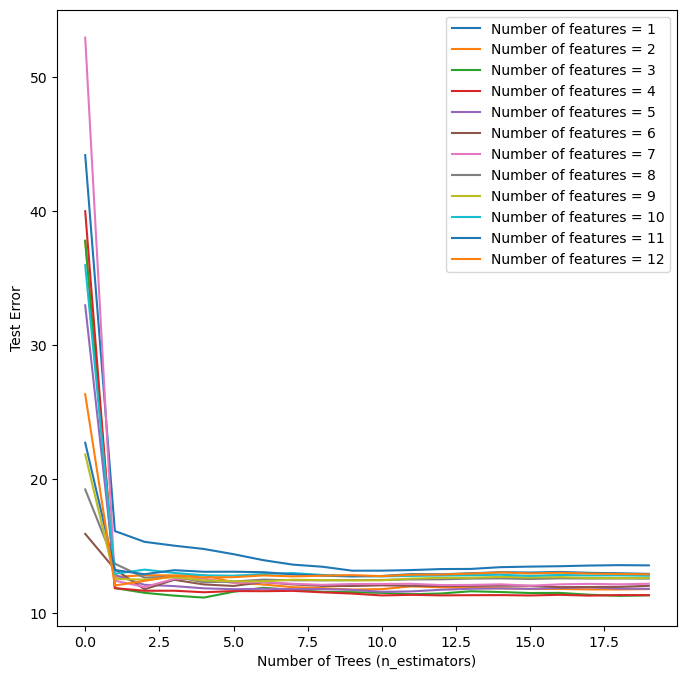

In [123]:
x_axis = np.arange(20)
fig, ax = subplots(figsize=(8,8))
for idx, error in enumerate(test_error_paths):
    ax.plot(x_axis, error, label=f"Number of features = {idx+1}")
ax.set_xlabel('Number of Trees (n_estimators)')
ax.set_ylabel('Test Error')
ax.legend();

## Exercise 8<a name="8,8"></a>
Back to [ToC](#toc)

In the lab, a classification tree was applied to the `Carseats` data set af- ter converting `Sales` into a qualitative response variable. Now we will seek to predict `Sales` using regression trees and related approaches, treating the response as a quantitative variable.  

(a) Split the data set into a training set and a test set.  
(b) Fit a regression tree to the training set. Plot the tree, and inter- pret the results. What test MSE do you obtain?  
(c) Use cross-validation in order to determine the optimal level of tree complexity. Does pruning the tree improve the test MSE? 

(d) Use the bagging approach in order to analyze this data. What test MSE do you obtain? Use the `feature_importance_` values to determine which variables are most important.  
(e) Use random forests to analyze this data. What test MSE do you obtain? Use the `feature_importance_` values to determine which variables are most important. Describe the effect of m, the number of variables considered at each split, on the error rate obtained.

In [131]:
Carseats = load_data('Carseats')
X = Carseats[Carseats.columns.drop('Sales')]
y = Carseats['Sales']

X = pd.get_dummies(X, columns=['ShelveLoc', 'Urban', 'US'], drop_first=True)

X_train, X_test, y_train, y_test = skm.train_test_split(X, y, test_size=0.3, random_state=7)

In [142]:
bag_seats = RF(max_features=X_train.shape[1], random_state=0)
RF_seats_3 = RF(max_features=3, random_state=0)
RF_seats_4 = RF(max_features=4, random_state=0)
RF_seats_6 = RF(max_features=6, random_state=0)

y_hat_bag_seats = bag_seats.fit(X_train, y_train).predict(X_test)
y_hat_RF_seats_3 = RF_seats_3.fit(X_train, y_train).predict(X_test)
y_hat_RF_seats_4 = RF_seats_4.fit(X_train, y_train).predict(X_test)
y_hat_RF_seats_6 = RF_seats_6.fit(X_train, y_train).predict(X_test)

print(f"Bagging MSE: {np.mean((y_hat_bag_seats - y_test)**2):.3f}")
print(f"RF MSE, m = 3: {np.mean((y_hat_RF_seats_3 - y_test)**2):.3f}")
print(f"RF MSE, m = 4: {np.mean((y_hat_RF_seats_4 - y_test)**2):.3f}")
print(f"RF MSE, m = 6: {np.mean((y_hat_RF_seats_6 - y_test)**2):.3f}")

Bagging MSE: 3.093
RF MSE, m = 3: 3.631
RF MSE, m = 4: 3.143
RF MSE, m = 6: 3.105


In [138]:
feature_imp_bag = pd.DataFrame({'importance':bag_seats.feature_importances_}, index=list(X.columns))
feature_imp_bag.sort_values(by='importance', ascending=False)

importance
Price               0.309101
ShelveLoc_Good      0.269023
Advertising         0.100817
CompPrice           0.097215
Age                 0.078465
Income              0.045418
Education           0.033135
Population          0.031295
ShelveLoc_Medium    0.026068
Urban_Yes           0.005012
US_Yes              0.004451

In [139]:
feature_imp_RF = pd.DataFrame({'importance':RF_seats.feature_importances_}, index=list(X.columns))
feature_imp_RF.sort_values(by='importance', ascending=False)

importance
Price               0.253168
ShelveLoc_Good      0.191613
Advertising         0.104084
CompPrice           0.101997
Age                 0.098497
Population          0.069170
Income              0.065543
Education           0.050615
ShelveLoc_Medium    0.028494
US_Yes              0.025900
Urban_Yes           0.010920

## Exercise 9<a name="8,9"></a>
Back to [ToC](#toc)

This problem involves the `OJ` data set which is part of the ISLP package.  
(a) Create a training set containing a random sample of 800 obser- vations, and a test set containing the remaining observations.  

***Ignore most of the below. I'm not fitting a simple tree. Instead, we're doing random forests again. But here it's about classification rather than regression.***

(b) Fit a tree to the training data, with `Purchase` as the response and the other variables as predictors. What is the training error rate?  
(c) Create a plot of the tree, and interpret the results. How many terminal nodes does the tree have?  
(d) Use the `export_tree()` function to produce a text summary of the fitted tree. Pick one of the terminal nodes, and interpret the information displayed.  

(e) Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. What is the test error rate?  
(f) Use cross-validation on the training set in order to determine the optimal tree size.  
(g) Produce a plot with tree size on the x-axis and cross-validated classification error rate on the y-axis.  
(h) Which tree size corresponds to the lowest cross-validated classi- fication error rate?  

(i) Produce a pruned tree corresponding to the optimal tree size obtained using cross-validation. If cross-validation does not lead to selection of a pruned tree, then create a pruned tree with five terminal nodes.  
(j) Compare the training error rates between the pruned and un- pruned trees. Which is higher?  
(k) Compare the test error rates between the pruned and unpruned trees. Which is higher?  

In [2]:
OJ = load_data('OJ')
OJ.head()

Purchase  WeekofPurchase  StoreID  PriceCH  PriceMM  DiscCH  DiscMM  \
0       CH             237        1     1.75     1.99    0.00     0.0   
1       CH             239        1     1.75     1.99    0.00     0.3   
2       CH             245        1     1.86     2.09    0.17     0.0   
3       MM             227        1     1.69     1.69    0.00     0.0   
4       CH             228        7     1.69     1.69    0.00     0.0   

   SpecialCH  SpecialMM   LoyalCH  SalePriceMM  SalePriceCH  PriceDiff Store7  \
0          0          0  0.500000         1.99         1.75       0.24     No   
1          0          1  0.600000         1.69         1.75      -0.06     No   
2          0          0  0.680000         2.09         1.69       0.40     No   
3          0          0  0.400000         1.69         1.69       0.00     No   
4          0          0  0.956535         1.69         1.69       0.00    Yes   

   PctDiscMM  PctDiscCH  ListPriceDiff  STORE  
0   0.000000   0.000000           0.24      1  
1   0.150754   0.000000           0.24      1  
2   0.000000   0.091398           0.23      1  
3   0.000000   0.000000           0.00      1  
4   0.000000   0.000000           0.00      0

In [5]:
X = OJ[OJ.columns.drop('Purchase')]
X = pd.get_dummies(X, columns=['Store7'], drop_first=True)
y_ = pd.get_dummies(OJ['Purchase'], drop_first=True)
y = np.ravel(y_)
X_train, X_test, y_train, y_test = skm.train_test_split(X, y, train_size=800, random_state=7)


In [6]:
n_estimators_range = [10, 50, 100, 200, 500, 1000]

cv_results = []
for n_estimators in n_estimators_range:
    rf = RFC(n_estimators=n_estimators, random_state=0)
    scores = skm.cross_validate(rf, X, y, cv=5, scoring='accuracy', return_train_score=True)
    cv_results.append(scores)

mean_test_error = [1 - np.mean(result['test_score']) for result in cv_results]
optimal_n_estimators = n_estimators_range[np.argmin(mean_test_error)]
print(f'Optimal number of trees: {optimal_n_estimators}')


Optimal number of trees: 100


In [171]:
optimal_rf = RFC(n_estimators=100, random_state=0)
optimal_rf.fit(X_train, y_train)

y_pred_test = optimal_rf.predict(X_test)

test_error_rate = 1 - accuracy_score(y_test, y_pred_test)
print(f'Optimal test error rate: {test_error_rate:.3f}')


Optimal test error rate: 0.222


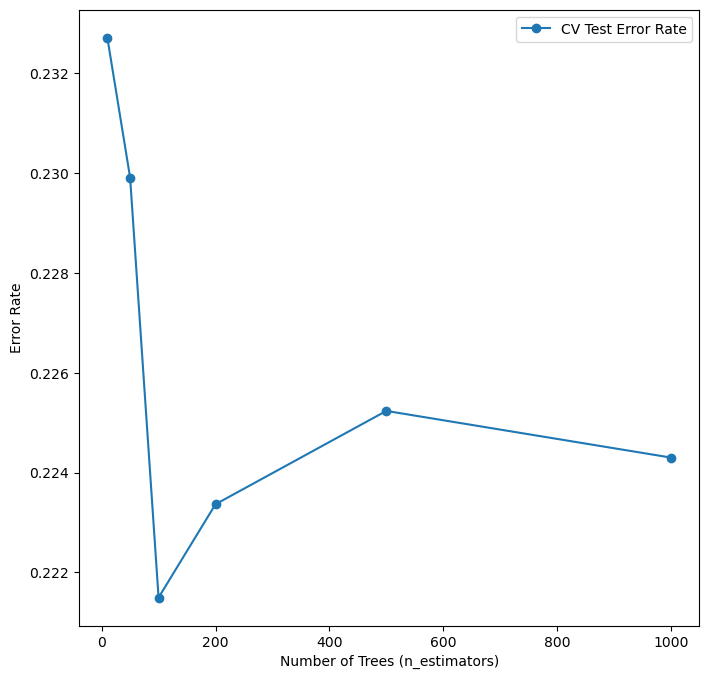

In [176]:
fig, ax = subplots(figsize=(8,8))

ax.plot(n_estimators_range, mean_test_error, marker='o', label='CV Test Error Rate')
ax.set_xlabel('Number of Trees (n_estimators)')
ax.set_ylabel('Error Rate')
ax.legend();


## Exercise 10<a name="8,10"></a>
Back to [ToC](#toc)

We now use boosting to predict Salary in the Hitters data set.  
(a) Remove the observations for whom the salary information is
unknown, and then log-transform the salaries.  
(b) Create a training set consisting of the first 200 observations, and a test set consisting of the remaining observations.  

(c) Perform boosting on the training set with 1,000 trees for a range of values of the shrinkage parameter λ.  
(d) Produce a plot with different shrinkage values on the x-axis and the corresponding test set MSE on the y-axis.  

(e) Compare the test MSE of boosting to the test MSE that results from applying two of the regression approaches seen in Chapters 3 and 6.  

(f) Which variables appear to be the most important predictors in the boosted model?  
(g) Now apply bagging to the training set. What is the test set MSE for this approach?  

In [193]:
Hitters = load_data('Hitters')
Hitters = Hitters.dropna(subset=['Salary'])

Hitters = pd.get_dummies(Hitters, columns=['League', 'Division', 'NewLeague'], drop_first=True)

X_train = Hitters.iloc[:200].drop('Salary', axis=1)
y_train = Hitters.iloc[:200]['Salary']

X_test = Hitters.iloc[200:].drop('Salary', axis=1)
y_test = Hitters.iloc[200:]['Salary']


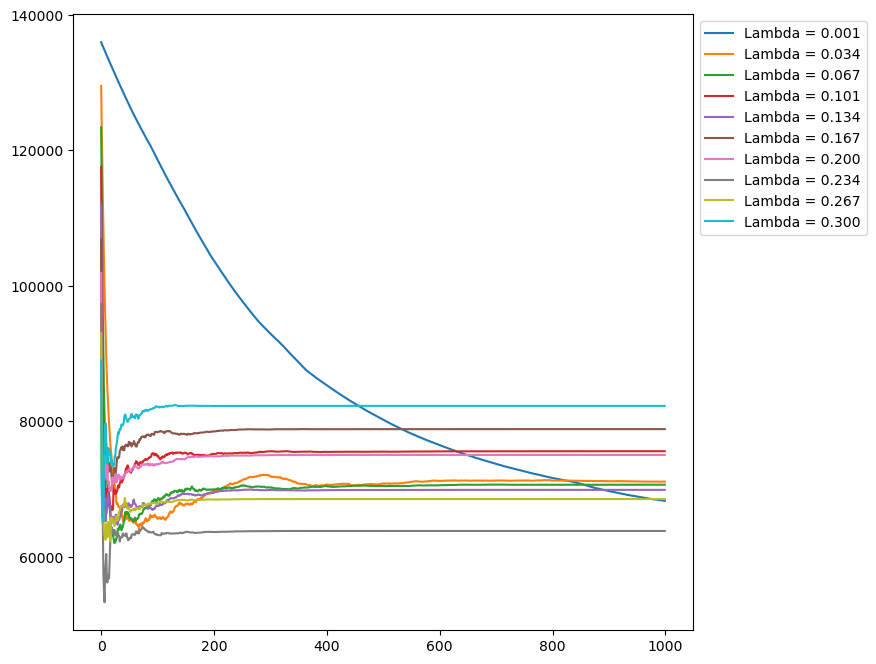

In [201]:
ax = subplots(figsize=(8,8))[1]
for lmda in np.linspace(0.001, 0.3, 10):
    boost_hitters = GBR(n_estimators=1000, learning_rate=lmda, random_state=0)
    boost_hitters.fit(X_train, y_train)
    
    test_error = np.zeros_like(boost_hitters.train_score_)
    for idx, y_ in enumerate(boost_hitters.staged_predict(X_test)):
       test_error[idx] = np.mean((y_test - y_)**2)
    ax.plot(np.arange(1000), test_error, label=f"Lambda = {lmda:.3f}")

ax.legend(loc='upper left', bbox_to_anchor=(1, 1));

In [202]:
bag_hitters = RF(max_features=X_train.shape[1], random_state=0)
bag_hitters.fit(X_train, y_train)
y_hat_bag = bag_hitters.predict(X_test)

np.mean((y_test - y_hat_bag)**2)

52166.727700930394

In [205]:
y_train_pred = sm.OLS(y_train, sm.add_constant(X_train)).fit().predict(sm.add_constant(X_train))
np.mean((y_train - y_train_pred) ** 2)

88579.83948352197

## Exercise 11<a name="8,11"></a>
Back to [ToC](#toc)

This question uses the Caravan data set.  
(a) Create a training set consisting of the first 1,000 observations,
and a test set consisting of the remaining observations.  
(b) Fit a boosting model to the training set with `Purchase` as the response and the other variables as predictors. Use 1,000 trees, and a shrinkage value of 0.01. Which predictors appear to be the most important?  
(c) Use the boosting model to predict the response on the test data. Predict that a person will make a purchase if the estimated prob- ability of purchase is greater than 20 %. Form a confusion ma- trix. What fraction of the people predicted to make a purchase do in fact make one? How does this compare with the results obtained from applying KNN or logistic regression to this data set?

In [17]:
Caravan = load_data('Caravan')

X_train = Caravan.iloc[:1000].drop('Purchase', axis=1)
y_train = Caravan.iloc[:1000]['Purchase']

X_test = Caravan.iloc[1000:].drop('Purchase', axis=1)
y_test = Caravan.iloc[1000:]['Purchase']


In [18]:
boost_caravan = GBC(n_estimators=1000, learning_rate=0.01, random_state=0)
boost_caravan.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000,
                           random_state=0)

In [219]:
feature_imp = pd.DataFrame(
    {'importance':boost_caravan.feature_importances_},
    index=Caravan.columns.drop('Purchase'))
feature_imp.sort_values(by='importance', ascending=False)

importance
PPERSAUT    0.074515
MOSTYPE     0.065189
ABRAND      0.057117
MGODGE      0.052929
MKOOPKLA    0.047575
...              ...
APERSONG    0.000000
PBESAUT     0.000000
PVRAAUT     0.000000
PWERKT      0.000000
PPERSONG    0.000000

[85 rows x 1 columns]

In [23]:
boost_caravan.classes_

array(['No', 'Yes'], dtype=object)

In [19]:
probabilities = boost_caravan.predict_proba(X_test)
predictions = np.where(probabilities[:, 1] > 0.2, "Yes", "No") # clever slicing!

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.4f}')

confusion = confusion_matrix(y_test, predictions)
print('Confusion Matrix:')
print(confusion)


Accuracy: 0.9071
Confusion Matrix:
[[4336  197]
 [ 251   38]]


In [241]:
log_reg = LogisticRegression(max_iter=1000, random_state=0)
log_reg.fit(X_train, y_train)

probabilities = log_reg.predict_proba(X_test)
predictions = np.where(probabilities[:, 1] > 0.2, "Yes", "No")

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.4f}')

confusion = confusion_matrix(y_test, predictions, labels=["No", "Yes"])
print('Confusion Matrix:')
print(confusion)

Accuracy: 0.9007
Confusion Matrix:
[[4293  240]
 [ 239   50]]


# Chapter 9 "Support Vector Machines"<a name="9"></a>
Back to [ToC](#toc)  
Skipping most exercises. Relatively uninteresting chapter.

In [15]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots, cm

from ISLP.svm import plot as plot_svm

from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
from sklearn.linear_model import LogisticRegression

## Exercise 5<a name="9,5"></a>
Back to [ToC](#toc)

We have seen that we can fit an SVM with a non-linear kernel in order to perform classification using a non-linear decision boundary. We will now see that we can also obtain a non-linear decision boundary by performing logistic regression using non-linear transformations of the features.  
(a) Generate a data set with n = 500 and p = 2, such that the obser- vations belong to two classes with a quadratic decision boundary between them. For instance, you can do this as follows:  
```Python
rng = np.random.default_rng(5)  
x1 = rng.uniform(size=500) - 0.5  
x2 = rng.uniform(size=500) - 0.5  
y = x1**2 - x2**2 > 0
```
(b) Plot the observations, colored according to their class labels. Your plot should display $X_1$ on the x-axis, and $X_2$ on the y-axis.  
(c) Fit a logistic regression model to the data, using $X_1$ and $X_2$ as predictors.  
(d) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the ob- servations, colored according to the predicted class labels. The decision boundary should be linear.  
(e) Now fit a logistic regression model to the data using non-linear functions of $X_1$ and $X_2$ as predictors (e.g. $X_1^2$, $X_1 \times X_2$, $\log(X_2)$, and so forth).  
(f) Apply this model to the training data in order to obtain a pre- dicted class label for each training observation. Plot the ob- servations, colored according to the predicted class labels. The decision boundary should be obviously non-linear. If it is not, then repeat (a)–(e) until you come up with an example in which the predicted class labels are obviously non-linear.  
(g) Fit a *support vector classifier* to the data with $X_1$ and $X_2$ as predictors. Obtain a class prediction for each training observa- tion. Plot the observations, colored according to the predicted class labels.  
(h) Fit a SVM using a *non-linear kernel* to the data. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.  
(i) Comment on your results.  

In [4]:
rng = np.random.default_rng(5)  
x1 = rng.uniform(size=500) - 0.5  
x2 = rng.uniform(size=500) - 0.5  
y = x1**2 - x2**2 > 0


In [28]:
#X = np.vstack((x1, x2)).T
X = np.column_stack((x1, x2))


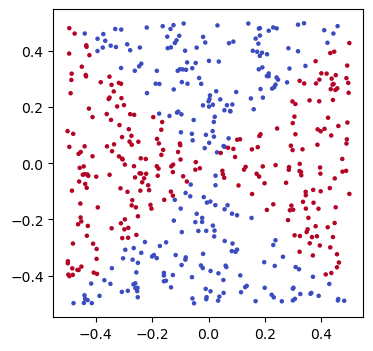

In [10]:
fig, ax = subplots(figsize=(4,4))
ax.scatter(x1, x2, c=y, cmap=cm.coolwarm, s=5);

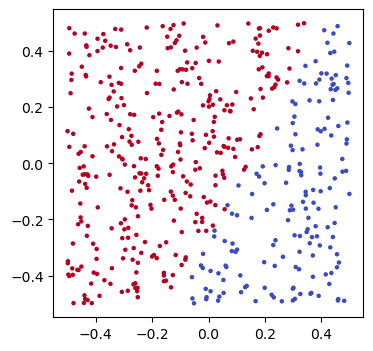

In [33]:
log_reg = LogisticRegression()
log_reg.fit(X, y)
y_pred = log_reg.predict(X)

fig, ax_logit = subplots(figsize=(4,4))
ax_logit.scatter(x1, x2, c=y_pred, cmap=cm.coolwarm, s=5);

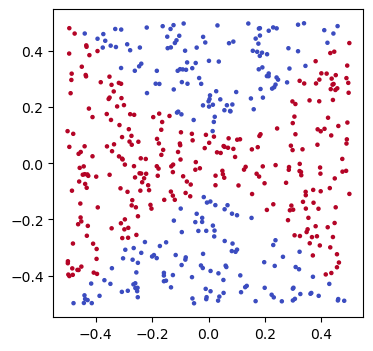

In [72]:
x1_sq = x1 ** 2
x2_sq = x2 ** 2
x1_x2 = x1 * x2

X_nonlin = np.column_stack((x1, x2, x1_sq, x2_sq, x1_x2))
log_reg.fit(X_nonlin, y)
y_pred_nonlin = log_reg.predict(X_nonlin)

fig, ax_logit_nonlin = subplots(figsize=(4,4))
ax_logit_nonlin.scatter(x1, x2, c=y_pred_nonlin, cmap=cm.coolwarm, s=5);


In [56]:
svc = SVC(C=1e5, kernel='linear')
svc.fit(X, y)

SVC(C=100000.0, kernel='linear')

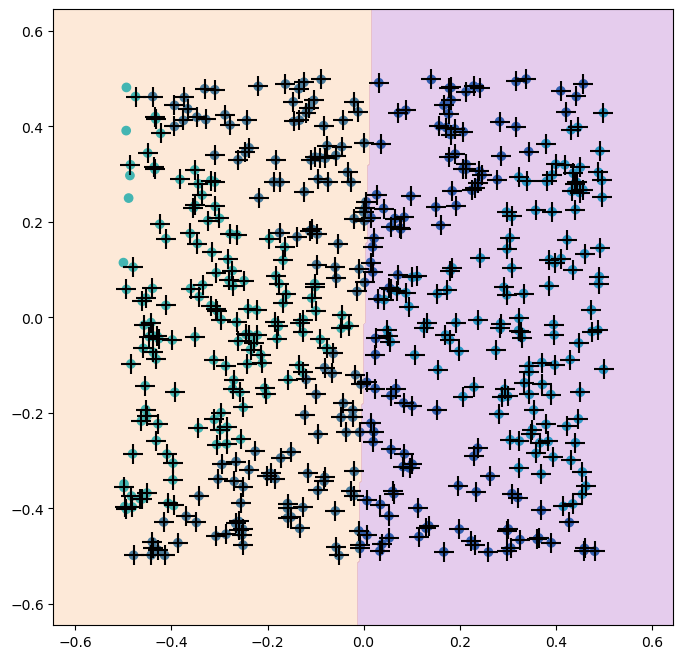

In [52]:
fig, ax_svc = subplots(figsize=(8,8))
plot_svm(X, y, svc, ax=ax_svc)

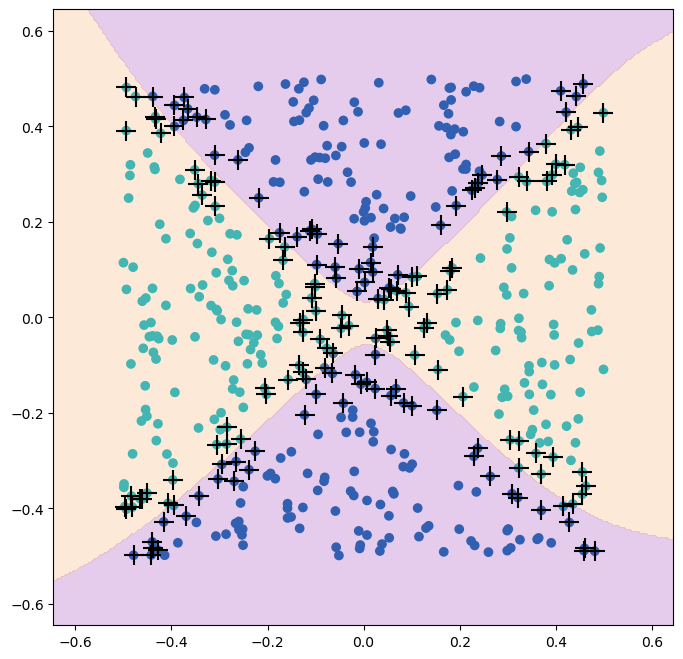

In [64]:
svm = SVC()
svm.fit(X, y)

fig, ax_svm = subplots(figsize=(8,8))
plot_svm(X, y, svm, ax=ax_svm)

So among these, the nonlinear SVM looks to be the best. But look at this ... what exactly is the point of support vector machines?

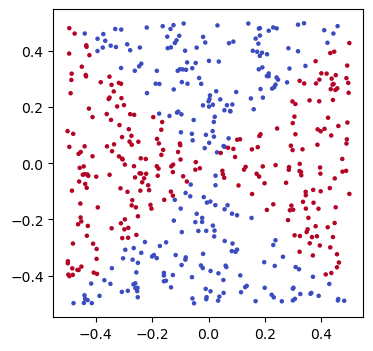

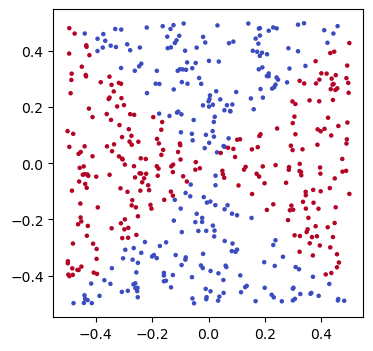

In [76]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import GradientBoostingClassifier as GBC

y_pred_RF = RFC().fit(X, y).predict(X)
y_pred_GB = GBC().fit(X, y).predict(X)

fig, ax_RF = subplots(figsize=(4,4))
ax_RF.scatter(x1, x2, c=y_pred_RF, cmap=cm.coolwarm, s=5);

fig, ax_GB = subplots(figsize=(4,4))
ax_GB.scatter(x1, x2, c=y_pred_GB, cmap=cm.coolwarm, s=5);

# Chapter 10 "Deep Learning"<a name="10"></a>
Back to [ToC](#toc)  

In [144]:
import numpy as np 
import pandas as pd
from ISLP import load_data
from matplotlib.pyplot import subplots

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

import torch
from torch import nn
from torch.optim import RMSprop
from torch.utils.data import TensorDataset, DataLoader
from torchmetrics import R2Score, Accuracy
from torchinfo import summary
from pytorch_lightning import Trainer

import pytorch_lightning as pl

from ISLP.torch import (SimpleDataModule,
                        SimpleModule,
                        rec_num_workers, ErrorTracker)

In [72]:
from pytorch_lightning import seed_everything
seed_everything(0, workers=True)
torch.use_deterministic_algorithms(True, warn_only=True)

max_num_workers = rec_num_workers()

Global seed set to 0


## Exercise 7<a name="10,7"></a>
Back to [ToC](#toc)

Fit a neural network to the `Default` data. Use a single hidden layer with 10 units, and dropout regularization.  
Have a look at Labs 10.9.1– 10.9.2 for guidance.  
Compare the classification performance of your model with that of linear logistic regression.

In [83]:
Default = load_data('Default')

X = Default[Default.columns.drop('default')]
X = pd.get_dummies(X, columns=['student'], drop_first=True).to_numpy()
y = pd.get_dummies(Default['default'], drop_first=True).to_numpy()

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=1/3, random_state=1)

In [84]:
X_train_t = torch.tensor(X_train.astype(np.float32))
y_train_t = torch.tensor(y_train.astype(np.float32))
X_test_t = torch.tensor(X_test.astype(np.float32))
y_test_t = torch.tensor(y_test.astype(np.float32))

y_train_t = torch.tensor(y_train.astype(np.float32)).squeeze(1)
y_test_t = torch.tensor(y_test.astype(np.float32)).squeeze(1) 

default_test = TensorDataset(X_test_t, y_test_t)
default_train = TensorDataset(X_train_t, y_train_t)

In [88]:
class DefaultModel(nn.Module):
    def __init__(self, input_size):
        super(DefaultModel, self).__init__()
        self.sequential = nn.Sequential(
            nn.Linear(input_size, 10),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(10, 1))  

    def forward(self, x):
        x = self.sequential(x)
        return torch.sigmoid(x).view(-1)  

class SimpleModule(pl.LightningModule):
    def __init__(self, model):
        super().__init__()
        self.model = model
        self.criterion = nn.BCELoss()
        self.accuracy = Accuracy(task='binary')

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        data, target = batch
        output = self(data)
        loss = self.criterion(output, target)
        return loss

    def validation_step(self, batch, batch_idx):
        data, target = batch
        output = self(data)
        loss = self.criterion(output, target)
        self.log('val_accuracy', self.accuracy(output, target))
        return loss

    def test_step(self, batch, batch_idx):
        data, target = batch
        output = self(data)
        loss = self.criterion(output, target)
        self.log('test_loss', loss)
        self.log('test_accuracy', self.accuracy(output, target))

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.001)

default_model = DefaultModel(X_train_t.shape[1])
default_module = SimpleModule(default_model)
trainer = Trainer(max_epochs=5)
trainer.fit(default_module, DataLoader(default_train, num_workers=max_num_workers))


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name      | Type           | Params
---------------------------------------------
0 | model     | DefaultModel   | 51    
1 | criterion | BCELoss        | 0     
2 | accuracy  | BinaryAccuracy | 0     
---------------------------------------------
51        Trainable params
0         Non-trainable params
51        Total params
0.000     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter serve

In [89]:
trainer.test(default_module, DataLoader(default_test, num_workers=max_num_workers))

Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃   Runningstage.testing    ┃                           ┃
┃          metric           ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │     0.970005989074707     │
│         test_loss         │    2.9994001388549805     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 2.9994001388549805, 'test_accuracy': 0.970005989074707}]

In [79]:
y_logit = pd.get_dummies(Default['default'], drop_first=True).to_numpy().ravel()

(X_train_logit, X_test_logit, 
 y_train_logit, y_test_logit) = train_test_split(X, y_logit, test_size=1/3, random_state=1)

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_logit, y_train_logit)

y_pred = logistic_regression_model.predict(X_test_logit)

test_accuracy = accuracy_score(y_test_logit, y_pred)
print(f'Test Accuracy: {test_accuracy}')

Test Accuracy: 0.97000599880024


I am going to become the Joker ... Getting that neural network right took probably 2 hours. The cell above took about 2 minutes and runs in a fraction of a second rather than minutes.

In [90]:
del(Default,
    default_model,
    X, y,
    X_test, X_train,
    y_test, y_train,
    X_test_t, y_test_t,
    X_train_t, y_train_t,
    trainer, default_module)


## Exercise 9<a name="10,9"></a>
Back to [ToC](#toc)

Fit a lag-5 autoregressive model to the `NYSE` data, as described in the text and Lab 10.9.6. Refit the model with a 12-level factor representing the month. Does this factor improve the performance of the model?

In [159]:
nyse = load_data('NYSE')

nyse.index = pd.to_datetime(nyse.index)
nyse['month'] = nyse.index.month
nyse['month'] = nyse['month'].astype('category')

cols = ['DJ_return', 'log_volume', 'log_volatility']
X = pd.DataFrame(StandardScaler(with_mean=True, with_std=True).fit_transform(nyse[cols]),
                 columns=nyse[cols].columns,
                 index=nyse.index)
X_rnn = X
X['month'] = nyse['month']
X = pd.get_dummies(X, columns=['month'], drop_first=True)

for lag in range(1, 6):
    for col in cols:
        newcol = np.zeros(X.shape[0]) * np.nan
        newcol[lag:] = X[col].values[:-lag]
        X.insert(len(X.columns), f"{col}_{lag}", newcol)
X.insert(len(X.columns), 'train', nyse['train'])
X = X.dropna()

Y, train = X['log_volume'], X['train']
X = X.drop(columns=['train'] + cols)

In [156]:
M = LinearRegression()
M.fit(X[train], Y[train])
M.score(X[~train], Y[~train])

0.4167123048568927

Miniscule improvement. Original without month was 0.41289...

## Exercise 10<a name="10,10"></a>
Back to [ToC](#toc)

In Section 10.9.6, we showed how to fit a linear AR model to the NYSE data using the `LinearRegression()` function. However, we also mentioned that we can “flatten” the short sequences produced for the RNN model in order to fit a linear AR model.  
Use this latter approach to fit a linear AR model to the `NYSE` data. Compare the test R2 of this linear AR model to that of the linear AR model that we fit in the lab. What are the advantages/disadvantages of each approach?

In [164]:
X = X_rnn.drop(columns=['month'])
for lag in range(1, 6):
    for col in cols:
        newcol = np.zeros(X.shape[0]) * np.nan
        newcol[lag:] = X[col].values[:-lag]
        X.insert(len(X.columns), f"{col}_{lag}", newcol)
X.insert(len(X.columns), 'train', nyse['train'])
X = X.dropna()

ordered_cols = []
for lag in range(5,0,-1):
    for col in cols:
        ordered_cols.append(f'{col}_{lag}')
X = X.reindex(columns=ordered_cols).to_numpy().reshape((-1,5,3))
X.shape

(6046, 5, 3)

In [169]:
class NYSEModel(nn.Module):
    def __init__(self):
        super(NYSEModel, self).__init__()
        self.linear = nn.Linear(5 * 3, 1)
    
    def forward(self, x):
        x = x.view(x.size(0), -1)
        return torch.flatten(self.linear(x))
nyse_model = NYSEModel()

In [170]:
datasets = []
for mask in [train, ~train]:
    X_rnn_t = torch.tensor(X[mask].astype(np.float32))
    Y_t = torch.tensor(Y[mask].astype(np.float32))
    datasets.append(TensorDataset(X_rnn_t, Y_t))
nyse_train, nyse_test = datasets

nyse_dm = SimpleDataModule(nyse_train,
                           nyse_test,
                           num_workers=min(4, max_num_workers),
                           validation=nyse_test,
                           batch_size=64)

nyse_optimizer = RMSprop(nyse_model.parameters(),
                         lr=0.001)
nyse_module = SimpleModule.regression(nyse_model,
                                      optimizer=nyse_optimizer,
                                      metrics={'r2':R2Score()})

In [171]:
nyse_trainer = Trainer(deterministic=True,
                       max_epochs=200,
                       callbacks=[ErrorTracker()])
nyse_trainer.fit(nyse_module,
                 datamodule=nyse_dm)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name  | Type      | Params
------------------------------------
0 | model | NYSEModel | 16    
1 | loss  | MSELoss   | 0     
------------------------------------
16        Trainable params
0         Non-trainable params
16        Total params
0.000     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=200` reached.


In [172]:
nyse_trainer.test(nyse_module,
                  datamodule=nyse_dm)

Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃   Runningstage.testing    ┃                           ┃
┃          metric           ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.6205941438674927     │
│          test_r2          │    0.4110259413719177     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.6205941438674927, 'test_r2': 0.4110259413719177}]

Slightly worse than the straight up linear regression version; also slower, but still runs in less than a minute.

In [173]:
del(nyse_model,
    nyse_trainer,
    nyse_optimizer,
   nyse_dm,
   nyse_module,
   nyse_train, 
    nyse_test,
   X)

# Chapter 11 "Survival Analysis and Censored Data"<a name="11"></a>
Back to [ToC](#toc)  
I liked this chapter so much that I will only skip one exercise!

In [11]:
from matplotlib.pyplot import subplots
import numpy as np
import pandas as pd
from ISLP import load_data

from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test, multivariate_logrank_test

from sklearn.utils import resample

## Exercise 10<a name="11,10"></a>
Back to [ToC](#toc)

This exercise focuses on the brain tumor data, which is included in the ISLP library.  
(a) Plot the Kaplan-Meier survival curve with ±1 standard error bands, using the `KaplanMeierFitter()` estimator in the lifelines package.  
(b) Draw a bootstrap sample of size $n = 88$ from the pairs $(y_i,δ_i)$, and compute the resulting Kaplan-Meier survival curve. Repeat this process $B = 200$ times. Use the results to obtain an estimate of the standard error of the Kaplan-Meier survival curve at each timepoint. Compare this to the standard errors obtained in (a).  
(c) Fit a Cox proportional hazards model that uses all of the pre- dictors to predict survival. Summarize the main findings.  
(d) Stratify the data by the value of `ki`. (Since only one observation has `ki==40`, you can group that observation together with the ob- servations that have `ki==60`.) Plot Kaplan-Meier survival curves for each of the five strata, adjusted for the other predictors.

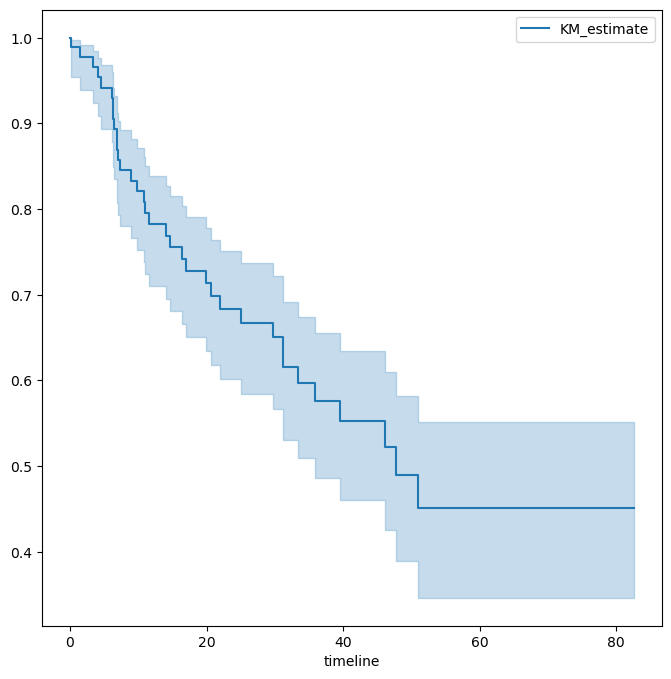

In [99]:
BrainCancer = load_data('BrainCancer')

fig, ax = subplots(figsize=(8,8))
km_brain = KaplanMeierFitter().fit(BrainCancer['time'], BrainCancer['status'], alpha=0.16)
km_brain.plot(ax=ax);

In [100]:
km_brain.survival_function_

KM_estimate
timeline             
0.00         1.000000
0.07         0.988636
1.18         0.988636
1.41         0.977141
1.54         0.977141
...               ...
65.02        0.451543
67.38        0.451543
73.74        0.451543
78.75        0.451543
82.56        0.451543

[87 rows x 1 columns]

In [118]:
kmf = KaplanMeierFitter()

B = 200
bootstrap_curves = pd.DataFrame()

for i in range(B):
    sample = resample(BrainCancer, n_samples=88, random_state=i)
    kmf.fit(sample['time'], sample['status'])
    
    if bootstrap_curves.empty:
        bootstrap_curves = pd.DataFrame({'time': kmf.survival_function_.index,
                                         f'survival_{i}': kmf.survival_function_['KM_estimate'].values})
    else:
        bootstrap_curves = pd.merge(bootstrap_curves, 
                                    pd.DataFrame({'time': kmf.survival_function_.index,
                                                  f'survival_{i}': kmf.survival_function_['KM_estimate'].values}),
                                    on='time', how='outer')

bootstrap_curves

time  survival_0  survival_1  survival_2  survival_3  survival_4  \
0    0.00         1.0    1.000000    1.000000    1.000000    1.000000   
1    1.18         1.0    0.988636    1.000000         NaN    1.000000   
2    1.54         1.0    0.988636    1.000000    0.954545    0.988506   
3    5.15         1.0    0.965374    0.926829    0.920044    0.928231   
4    5.51         1.0    0.965374    0.926829         NaN         NaN   
..    ...         ...         ...         ...         ...         ...   
82   1.41         NaN         NaN         NaN    0.954545    0.988506   
83  16.92         NaN         NaN         NaN    0.622649    0.733188   
84  17.57         NaN         NaN         NaN    0.622649    0.733188   
85  26.46         NaN         NaN         NaN    0.622649         NaN   
86  31.25         NaN         NaN         NaN         NaN    0.590994   

    survival_5  survival_6  survival_7  survival_8  ...  survival_190  \
0     1.000000    1.000000    1.000000    1.000000  ...      1.000000   
1     0.954545    1.000000         NaN    0.988636  ...      1.000000   
2          NaN    0.976744         NaN         NaN  ...      0.977011   
3          NaN         NaN         NaN    0.931158  ...           NaN   
4     0.919623         NaN    0.965909         NaN  ...      0.953469   
..         ...         ...         ...         ...  ...           ...   
82         NaN    0.976744    0.965909    0.965645  ...      0.977011   
83         NaN         NaN         NaN    0.757416  ...      0.794810   
84    0.705625         NaN         NaN    0.757416  ...      0.794810   
85    0.678485    0.613708    0.687033    0.741300  ...      0.723319   
86    0.634849         NaN         NaN    0.628908  ...           NaN   

    survival_191  survival_192  survival_193  survival_194  survival_195  \
0       1.000000      1.000000      1.000000      1.000000      1.000000   
1            NaN      0.965909           NaN      0.977273      0.988636   
2       0.977273           NaN           NaN      0.954004      0.965645   
3            NaN      0.894294           NaN           NaN      0.965645   
4            NaN      0.894294           NaN      0.878688           NaN   
..           ...           ...           ...           ...           ...   
82      0.977273      0.942634      0.965909      0.954004      0.965645   
83      0.621465      0.726724      0.634129           NaN      0.727450   
84      0.621465      0.726724           NaN           NaN      0.727450   
85           NaN           NaN      0.545351           NaN           NaN   
86           NaN           NaN           NaN      0.547736           NaN   

    survival_196  survival_197  survival_198  survival_199  
0       1.000000      1.000000      1.000000      1.000000  
1            NaN           NaN      1.000000      0.988636  
2            NaN      0.988636      0.988506           NaN  
3       0.919662      0.918019      0.953617           NaN  
4            NaN      0.918019           NaN           NaN  
..           ...           ...           ...           ...  
82           NaN           NaN      0.988506           NaN  
83           NaN           NaN      0.746074      0.737921  
84      0.738577      0.694538      0.746074           NaN  
85      0.682750      0.543213           NaN           NaN  
86      0.549168           NaN           NaN      0.578231  

[87 rows x 201 columns]

The time indices got out of order in the bootstrapping process. That's why we need the reindexing (which in turn requires indexing in the first place).  
I'm fitting the `km_SE` here and using the full name because the survival function output below gets shortened to 58 if I use the `kmf` shorthand from above that was used for the for-loop; the bootstrap NaN values probably mess it up.

In [119]:
km_SE = KaplanMeierFitter().fit(BrainCancer['time'], BrainCancer['status'])

standard_errors = bootstrap_curves.drop(columns='time').std(axis=1)
SE_per_time = pd.DataFrame({'time': bootstrap_curves['time'], 'standard_error': standard_errors})
aligned_SE = SE_per_time.set_index('time').reindex(km_SE.survival_function_.index)

In [120]:
len(km_SE.survival_function_.index)

87

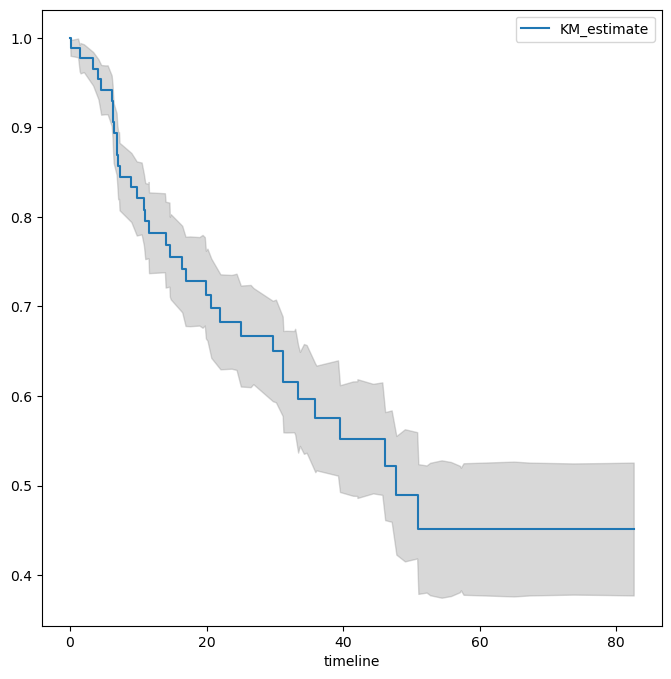

In [116]:
fig, ax_SE = subplots(figsize=(8,8))
km_SE.plot(ax=ax_SE, ci_show=False)

ax_SE.fill_between(km_SE.survival_function_.index, 
                 np.array(km_SE.survival_function_['KM_estimate']) - np.array(aligned_SE['standard_error']),
                 np.array(km_SE.survival_function_['KM_estimate']) + np.array(aligned_SE['standard_error']),
                 color='grey', alpha=0.3);

# Chapter 12 "Unsupervised Learning"<a name="12"></a>
Back to [ToC](#toc)  

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.datasets import get_rdataset

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering as AC

from scipy.cluster.hierarchy import dendrogram 
from scipy.cluster.hierarchy import cut_tree

from ISLP.cluster import compute_linkage
from ISLP import load_data

## Exercise 8<a name="12,8"></a>
Back to [ToC](#toc)

In Section 12.2.3, a formula for calculating PVE was given in Equa- tion 12.10. We also saw that the PVE can be obtained using the explained_variance_ratio_ attribute of a fitted PCA() estimator.
On the USArrests data, calculate PVE in two ways:  
(a) Using the explained_variance_ratio_ output of the fitted PCA()
estimator, as was done in Section 12.2.3.  
(b) By applying Equation 12.10 directly. The loadings are stored as the components_ attribute of the fitted PCA() estimator. Use those loadings in Equation 12.10 to obtain the PVE.  
These two approaches should give the same results.  
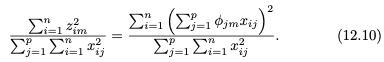

In [38]:
USArrests = get_rdataset('USArrests').data

pcaUS = PCA()
scaler = StandardScaler(with_std=True, with_mean=True)

USArrests_scaled = scaler.fit_transform(USArrests)
pcaUS.fit(USArrests_scaled)
pcaUS.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [39]:
phi = pcaUS.components_
phi

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

In [40]:
USArrests.iloc[0,0], phi[0,0]

(13.2, 0.5358994749381552)

In [41]:
USArrests = scaler.fit_transform(USArrests)


In [42]:
import time

phi = pcaUS.components_

PVE = []
denominator = 0

start_time = time.time()
for j in range(USArrests.shape[1]):
    for i in range(USArrests.shape[0]):
        denominator += USArrests[i,j]**2

for m in range(4):    
    numerator = 0
    for i in range(USArrests.shape[0]):
        inner_sum = 0
        for j in range(USArrests.shape[1]):
            inner_sum += USArrests[i,j] * phi[m,j] # the m  and j need to be reversed from the equation above!
        numerator += inner_sum**2
    PVE.append(numerator / denominator)
loop_time = time.time() - start_time

PVE

[0.6200603947873737,
 0.2474412881349604,
 0.08914079514520748,
 0.04335752193245883]

In [43]:
start_time = time.time()
denominator_fast = np.sum(USArrests**2)
projected_data = np.dot(USArrests, phi.T)
numerator_fast = np.sum(projected_data ** 2, axis=0)
PVE_fast = numerator_fast / denominator_fast
matrix_time = time.time() - start_time

PVE_fast

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [44]:
print(f"{loop_time:.5f}")
print(f"{matrix_time:.5f}")

0.00179
0.00155


## Exercise 9<a name="12,9"></a>
Back to [ToC](#toc)

Consider the USArrests data. We will now perform hierarchical clus- tering on the states.  
(a) Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states.  
(b) Cut the dendrogram at a height that results in three distinct clusters. Which states belong to which clusters?  
(c) Hierarchically cluster the states using complete linkage and Eu- clidean distance, after scaling the variables to have standard de- viation one.  
(d) What effect does scaling the variables have on the hierarchical clustering obtained? In your opinion, should the variables be scaled before the inter-observation dissimilarities are computed? Provide a justification for your answer.  

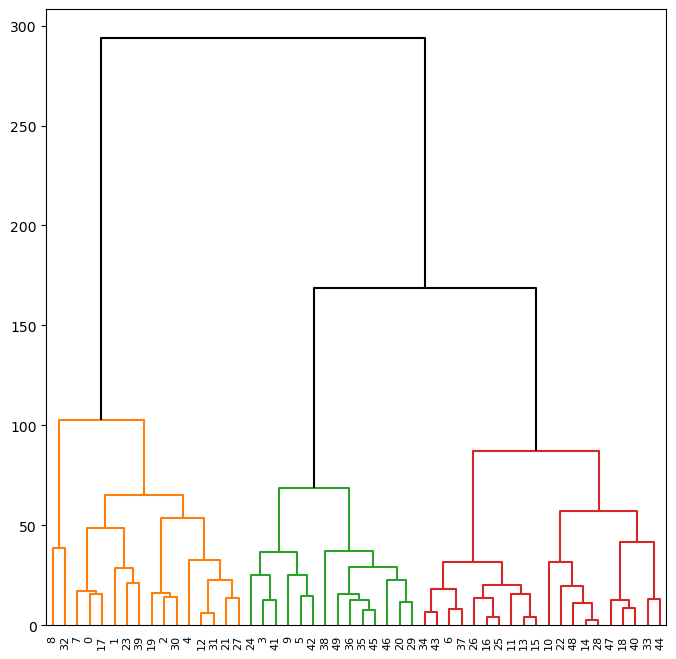

In [15]:
USArrests = get_rdataset('USArrests').data
hc_complete = AC(distance_threshold=0, n_clusters=None, linkage='complete')
hc_complete.fit(USArrests)

cargs = {'color_threshold':150, 'above_threshold_color':'black'}
linkage_comp = compute_linkage(hc_complete)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp, ax=ax, **cargs);

In [29]:
cluster_index = cut_tree(linkage_comp, n_clusters=3).T
cluster_index

array([[0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0,
        2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2,
        2, 1, 1, 2, 2, 1]])

In [32]:
for i, state in enumerate(USArrests.index):
    print(f"{state}: {cluster_index[0,i]+1}")

Alabama: 1
Alaska: 1
Arizona: 1
Arkansas: 2
California: 1
Colorado: 2
Connecticut: 3
Delaware: 1
Florida: 1
Georgia: 2
Hawaii: 3
Idaho: 3
Illinois: 1
Indiana: 3
Iowa: 3
Kansas: 3
Kentucky: 3
Louisiana: 1
Maine: 3
Maryland: 1
Massachusetts: 2
Michigan: 1
Minnesota: 3
Mississippi: 1
Missouri: 2
Montana: 3
Nebraska: 3
Nevada: 1
New Hampshire: 3
New Jersey: 2
New Mexico: 1
New York: 1
North Carolina: 1
North Dakota: 3
Ohio: 3
Oklahoma: 2
Oregon: 2
Pennsylvania: 3
Rhode Island: 2
South Carolina: 1
South Dakota: 3
Tennessee: 2
Texas: 2
Utah: 3
Vermont: 3
Virginia: 2
Washington: 2
West Virginia: 3
Wisconsin: 3
Wyoming: 2


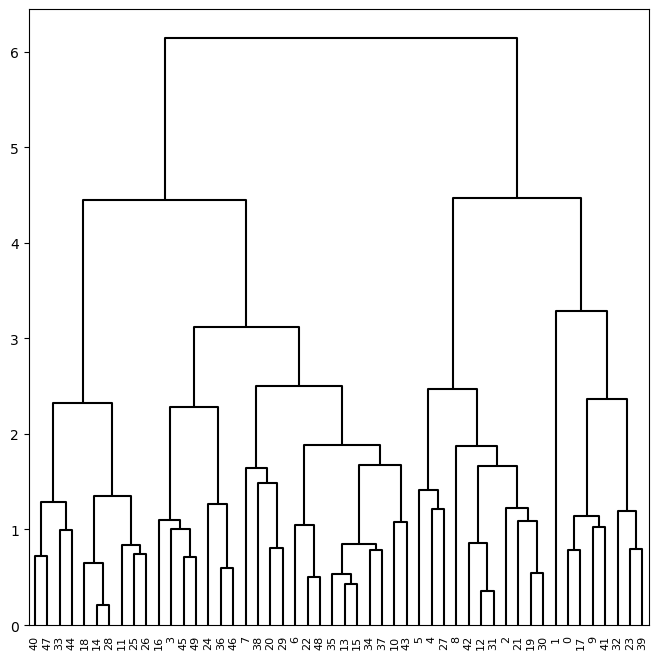

In [46]:
scaler = StandardScaler(with_std=True, with_mean=False)
USArrests_scaled = scaler.fit_transform(USArrests)

hc_complete_scaled = AC(distance_threshold=0, n_clusters=None, linkage='complete')
hc_complete_scaled.fit(USArrests_scaled)

cargs = {'color_threshold':-np.inf, 'above_threshold_color':'black'}
linkage_comp_scaled = compute_linkage(hc_complete_scaled)
cluster_index_scaled = cut_tree(linkage_comp_scaled, n_clusters=3).T

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp_scaled, ax=ax, **cargs);

In [41]:
for i, state in enumerate(USArrests.index):
    print(f"{state}: {cluster_index_scaled[0,i]+1}. {cluster_index[0,i]+1}")

Alabama: 1. 1
Alaska: 1. 1
Arizona: 2. 1
Arkansas: 3. 2
California: 2. 1
Colorado: 2. 2
Connecticut: 3. 3
Delaware: 3. 1
Florida: 2. 1
Georgia: 1. 2
Hawaii: 3. 3
Idaho: 3. 3
Illinois: 2. 1
Indiana: 3. 3
Iowa: 3. 3
Kansas: 3. 3
Kentucky: 3. 3
Louisiana: 1. 1
Maine: 3. 3
Maryland: 2. 1
Massachusetts: 3. 2
Michigan: 2. 1
Minnesota: 3. 3
Mississippi: 1. 1
Missouri: 3. 2
Montana: 3. 3
Nebraska: 3. 3
Nevada: 2. 1
New Hampshire: 3. 3
New Jersey: 3. 2
New Mexico: 2. 1
New York: 2. 1
North Carolina: 1. 1
North Dakota: 3. 3
Ohio: 3. 3
Oklahoma: 3. 2
Oregon: 3. 2
Pennsylvania: 3. 3
Rhode Island: 3. 2
South Carolina: 1. 1
South Dakota: 3. 3
Tennessee: 1. 2
Texas: 2. 2
Utah: 3. 3
Vermont: 3. 3
Virginia: 3. 2
Washington: 3. 2
West Virginia: 3. 3
Wisconsin: 3. 3
Wyoming: 3. 2


In [45]:
np.sum(cluster_index_scaled == cluster_index), np.sum(cluster_index_scaled != cluster_index)

(28, 22)

In [47]:
USArrests.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

They should probably be scaled as Urbanicity is measured on a completely different scale and Assault has a much larger variance than the other variables.  
Unless we care about Assault more, that does not make much sense.

## Exercise 13<a name="12,13"></a>
Back to [ToC](#toc)

On the book website, www.statlearning.com, there is a gene expres- sion data set (Ch12Ex13.csv) that consists of 40 tissue samples with measurements on 1,000 genes.  
The first 20 samples are from healthy patients, while the second 20 are from a diseased group.  
(a) Load in the data using pd.read_csv(). You will need to select header = None.  
(b) Apply hierarchical clustering to the samples using correlation- based distance, and plot the dendrogram. Do the genes separate the samples into the two groups? Do your results depend on the type of linkage used?  
(c) Your collaborator wants to know which genes differ the most across the two groups. Suggest a way to answer this question, and apply it here. (Huh??)  

In [65]:
gene_data = pd.read_csv('Ch12Ex13.csv', header=None)
cor_genes = 1 - np.corrcoef(gene_data)


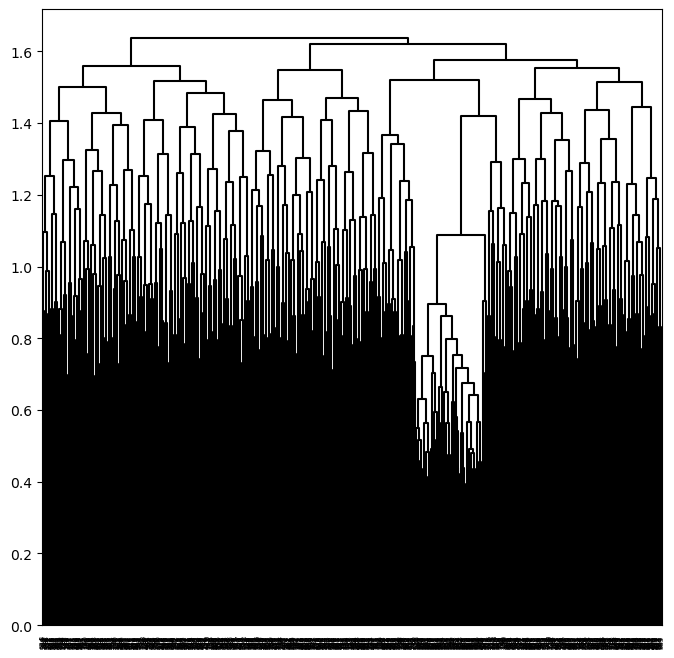

In [73]:
hc_cor_genes = AC(linkage='complete', distance_threshold=0, n_clusters=None, metric='precomputed')
hc_cor_genes.fit(cor_genes)
linkage_cor_genes = compute_linkage(hc_cor_genes)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_cor_genes, ax=ax, color_threshold=-np.inf, above_threshold_color='black');


In [74]:
cut_tree(linkage_cor_genes, n_clusters=2).T

array([[0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
        1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
        0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
        1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
        0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
        1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
        0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 

# Chapter 13 "Multiple Testing"<a name="13"></a>
Back to [ToC](#toc)  
There are only 2 applied exercises in this chapter.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from ISLP import load_data

from scipy.stats import ttest_1samp as t_test

from statsmodels.stats.multitest import multipletests

## Exercise 7<a name="13,7"></a>
Back to [ToC](#toc)

This problem makes use of the `Carseats` dataset in the `ISLP` package.  
(a) For each quantitative variable in the dataset besides `Sales`, fit a linear model to predict `Sales` using that quantitative variable. Report the $p$-values associated with the coefficients for the vari- ables. That is, for each model of the form $Y = β_0 +β_1X +ε$, report the $p$-value associated with the coefficient $β_1$. Here, $Y$ represents `Sales` and $X$ represents one of the other quantitative variables.  
(b) Suppose we control the Type I error at level $α = 0.05$ for the $p$-values obtained in (a). Which null hypotheses do we reject?  
(c) Now suppose we control the FWER at level 0.05 for the $p$-values. Which null hypotheses do we reject?  
(d) Finally, suppose we control the FDR at level 0.2 for the $p$-values. Which null hypotheses do we reject?

In [5]:
Carseats = load_data('Carseats')
y = Carseats['Sales']
quant_variables = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']

In [30]:
pvalues = []

for var in quant_variables:
    X = sm.add_constant(Carseats[var])
    pvalue = sm.OLS(y, X).fit().pvalues[1]
    pvalues.append(pvalue)
    status = "True" if pvalue < 0.05 else "False"
    print(f"{var}:{pvalue:.3f}. {status}")

CompPrice:0.201. False
Income:0.002. True
Advertising:0.000. True
Population:0.314. False
Price:0.000. True
Age:0.000. True
Education:0.300. False


In [37]:
multipletests(pvalues, method="bonferroni")[0]

array([False,  True,  True, False,  True,  True, False])

In [36]:
q_values = multipletests(pvalues, method="fdr_bh")[1]
(q_values <= 0.2)

array([False,  True,  True, False,  True,  True, False])

Extremely insightful exercise. The point is probably that there are simply too few hypotheses.

## Exercise 8<a name="13,8"></a>
Back to [ToC](#toc)

In this problem, we will simulate data from m = 100 fund managers.  
These data [below] represent each fund manager’s percentage returns for each of $n = 20$ months. We wish to test the null hypothesis that each fund manager’s percentage returns have population mean equal to zero. Notice that we simulated the data in such a way that each fund manager’s percentage returns do have population mean zero; in other words, all $m$ null hypotheses are true.  
(a) Conduct a one-sample $t$-test for each fund manager, and plot a histogram of the $p$-values obtained.  
(b) If we control Type I error for each null hypothesis at level $α = 0.05$, then how many null hypotheses do we reject?  
(c) If we control the FWER at level 0.05, then how many null hy- potheses do we reject?  
(d) If we control the FDR at level 0.05, then how many null hy- potheses do we reject?  

(e) Now suppose we “cherry-pick” the 10 fund managers who per- form the best in our data. If we control the FWER for just these 10 fund managers at level 0.05, then how many null hypothe- ses do we reject? If we control the FDR for just these 10 fund managers at level 0.05, then how many null hypotheses do we reject?  
(f) Explain why the analysis in (e) is misleading.  
Hint: The standard approaches for controlling the FWER and FDR assume that all tested null hypotheses are adjusted for mul- tiplicity, and that no “cherry-picking” of the smallest p-values has occurred. What goes wrong if we cherry-pick?

In [45]:
rng = np.random.default_rng(1) 
n, m = 20, 100
X = rng.normal(size=(n, m))


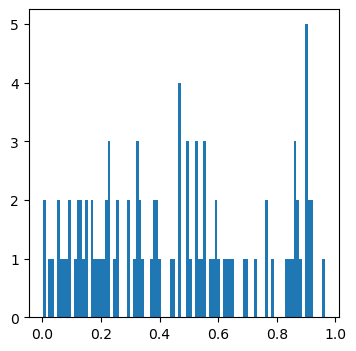

In [48]:
p_values = np.empty(100)
for i in range(100):
   p_values[i] = t_test(X[:,i], 0).pvalue

fig, ax = plt.subplots(figsize=(4,4))
ax.hist(p_values, bins=100);

In [51]:
print(f"alpha = 0.05: {(p_values < 0.05).sum()}")

FWER = (multipletests(p_values, method="bonferroni")[0]).sum()
print(f"FWER = 0.05: {FWER}")

q_values = multipletests(p_values, method="fdr_bh")[1]
FDR = (q_values <= 0.05).sum()
print(f"FDR = 0.05: {FDR}")

alpha = 0.05: 4
FWER = 0.05: 0
FDR = 0.05: 0


Expected value in the first row is 5.

In [49]:
X_ = pd.DataFrame(X)
top_10_indices = X_.mean().nlargest(10).index # .mean() defaults to axis=0 in Pandas

X_top10 = X_.iloc[:, top_10_indices]
X_top10.columns = range(X_top10.shape[1])


In [70]:
p_values_top10 = np.empty(X_top10.shape[1])
for i in range(X_top10.shape[1]):
   p_values_top10[i] = t_test(X_top10.iloc[:,i], 0).pvalue

p_values_top10

array([0.03553948, 0.00955121, 0.1380251 , 0.07550063, 0.1187536 ,
       0.07795962, 0.24448163, 0.20804809, 0.15347263, 0.16875485])

In [71]:
print(f"alpha = 0.05: {(p_values_top10 < 0.05).sum()}")

FWER_top10 = (multipletests(p_values_top10, method="bonferroni")[0]).sum()
print(f"FWER = 0.05: {FWER_top10}")

q_values_top10 = multipletests(p_values_top10, method="fdr_bh")[1]
print(f"FDR = 0.05: {(q_values_top10 <= 0.05).sum()}")

alpha = 0.05: 2
FWER = 0.05: 0
FDR = 0.05: 0


But maybe the exercise meant "perform the best" as lowest $p$-value?  
In any case, the below is meaningless becasue we tested 100 hypotheses, not 10, so the $\alpha/m$ in Bonferroni (and equivalently $qj/m$ in Benjamini–Hochberg) will be inflated and many more $p$-values fall under that threshold. This is only relevant because those procedures order the $p$-values and we pick one end of that ordering (meaning we will get all $p$-values below the threshold); if we randomly selected 10 values, it would be fine.

In [76]:
lowest_10_pvalues = np.sort(p_values)[:10]

print(f"alpha = 0.05: {(lowest_10_pvalues < 0.05).sum()}")

FWER_lowest10 = (multipletests(lowest_10_pvalues, method="bonferroni")[0]).sum()
print(f"FWER = 0.05: {FWER_lowest10}")

q_values_lowest10 = multipletests(lowest_10_pvalues, method="fdr_bh")[1]
print(f"FDR = 0.05: {(q_values_lowest10 <= 0.05).sum()}")

alpha = 0.05: 4
FWER = 0.05: 1
FDR = 0.05: 2
